#### Loading the data into different dataframes

In [1]:
#Import pandas and numpy library
import pandas as pd
import numpy as np

In [2]:
# Specify that column 23 should be read as a string
dtype_spec = {23: str}  

# # Load the dataset with the specified dtype
df_amazon = pd.read_csv('Amazon-Sale-Report.csv', dtype=dtype_spec)

In [3]:
# Check that the dataset was uploaded correctly
df_amazon.head(5)

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI   TAMIL NADU   

  ship-postal-code  ship-country  \
0         400081.0            IN   
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   

                                       promotion-ids    B2B  fulfilled-by  \
0                                                NaN  False     Easy Ship   
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

In [4]:
# Check shape
df_amazon.shape

(128975, 24)

#### Correcting Data Types

In [5]:
# Checking the type of data
df_amazon.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [6]:
# Replace non-numeric values with NaN (or some default numeric value)
# Assuming 'Nill' or other placeholders are used, replace them accordingly
df_amazon.replace('Nill', np.nan, inplace=True)

# Convert columns to the correct data types
df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')
df_amazon['ship-postal-code'] = df_amazon['ship-postal-code'].astype('Int64')

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\2114624445.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')


In [7]:
# Checking the type of data
df_amazon.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               Int64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
Unnamed: 22                   object
dtype: object

#### Dropping columns

In [8]:
# Analysing the number of unique values in the C03935V04687 column
df_amazon['Unnamed: 22'].unique()

array([nan, 'False'], dtype=object)

In [9]:
# Drop the 'unnamed' column as it seems to be irrelevant
df_amazon.drop(columns=['Unnamed: 22'], inplace=True)

#### Correcting column names

In [10]:
# Renaming the columns to lowercase, no spaces or hyphens, and using underscores
df_amazon.columns = df_amazon.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

In [11]:
# Rename the specific column by removing the trailing underscore
df_amazon.rename(columns={'sales_channel_': 'sales_channel'}, inplace=True)

#### Check unique values and number of unique values

In [12]:
# Count the number of unique values in each column 
nunique_values = df_amazon.nunique()
print(nunique_values)

index                 128975
order_id              120378
date                      91
status                    13
fulfilment                 2
sales_channel              2
ship_service_level         2
style                   1377
sku                     7195
category                   9
size                      11
asin                    7190
courier_status             3
qty                       10
currency                   1
amount                  1410
ship_city               8955
ship_state                69
ship_postal_code        9459
ship_country               1
promotion_ids           5787
b2b                        2
fulfilled_by               1
dtype: int64


In [13]:
# Get the unique values for each column in df_amazon
unique_values = {col: df_amazon[col].unique() for col in df_amazon.columns}
print(unique_values)

{'index': array([     0,      1,      2, ..., 128972, 128973, 128974], dtype=int64), 'order_id': array(['405-8078784-5731545', '171-9198151-1101146',
       '404-0687676-7273146', ..., '407-9547469-3152358',
       '402-6184140-0545956', '408-7436540-8728312'], dtype=object), 'date': <DatetimeArray>
['2022-04-30 00:00:00', '2022-04-29 00:00:00', '2022-04-28 00:00:00',
 '2022-04-27 00:00:00', '2022-04-26 00:00:00', '2022-04-25 00:00:00',
 '2022-04-24 00:00:00', '2022-04-23 00:00:00', '2022-04-22 00:00:00',
 '2022-04-21 00:00:00', '2022-04-20 00:00:00', '2022-04-19 00:00:00',
 '2022-04-18 00:00:00', '2022-04-17 00:00:00', '2022-04-16 00:00:00',
 '2022-04-15 00:00:00', '2022-04-14 00:00:00', '2022-04-13 00:00:00',
 '2022-04-12 00:00:00', '2022-04-11 00:00:00', '2022-04-10 00:00:00',
 '2022-04-09 00:00:00', '2022-04-08 00:00:00', '2022-04-07 00:00:00',
 '2022-04-06 00:00:00', '2022-04-05 00:00:00', '2022-04-04 00:00:00',
 '2022-04-03 00:00:00', '2022-04-02 00:00:00', '2022-04-01 00:00:00',

#### Data Description of Amazon Sale Report Dataset (df_amazon)

| Column name          | Description                                                            | Type               | N. of Unique Values | Unique Values |
|----------------------|------------------------------------------------------------------------|--------------------|---------------------|---------------|
| index                | Index.                                                                 | Integer            | 128975              | [0, 1, 2, ..., 128972, 128973, 128974] |
| order_id             | Unique identifier for each order.                                      | Object             | 120378              | ['405-8078784-5731545', '171-9198151-1101146', ..., '408-7436540-8728312'] |
| date                 | Date of the sale.                                                      | DateTime           | 91                  | ['2022-04-01', '2022-06-29'] |
| status               | Status of the sale.                                                    | Object             | 13                  | ['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped', 'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Lost in Transit', 'Shipped - Out for Delivery', 'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending', 'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'] |
| fulfilment           | Method of fulfilment.                                                  | Object             | 2                   | ['Merchant', 'Amazon'] |
| sales_channel        | Sales channel where the transaction occurred.                          | Object             | 2                   | ['Amazon.in', 'Non-Amazon'] |
| ship_service_level   | Service level used for shipping.                                       | Object             | 2                   | ['Standard', 'Expedited'] |
| style                | Style or type of the product.                                          | Object             | 1377                | ['SET389', 'JNE3781', 'JNE3371', ..., 'SET066', 'J0286', 'SET045'] |
| sku                  | Stock Keeping Unit (SKU) identifier for each product.                  | Object             | 7195                | ['SET389-KR-NP-S', 'JNE3781-KR-XXXL', ..., 'SET045-KR-NP-M'] |
| category             | Product category.                                                      | Object             | 9                   | ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom', 'Saree', 'Blouse', 'Dupatta'] |
| size                 | Size of the product.                                                   | Object             | 11                  | ['S', '3XL', 'XL', ..., 'Free'] |
| asin                 | Amazon Standard Identification Number.                                 | Object             | 7190                | ['B09KXVBD7Z', 'B09K3WFS32', ..., 'B07N81TFNY'] |
| courier_status       | Status of the courier for the order.                                   | Object             | 3                   | ['Shipped', 'Cancelled', 'Unshipped'] |
| qty                  | Quantity of the product sold.                                          | Integer            | 10                  | [0, 1, 2, 15, 3, 9, 13, 5, 4, 8] |
| currency             | Currency used for the transaction.                                     | Object             | 1                   | ['INR'] |
| amount               | Amount of the sale.                                                    | Float              | 1410                | [647.62, 406.0, 329.0, ..., 1244.0, 639.0] |
| ship_city            | City where the product is shipped.                                     | Object             | 8955                | ['MUMBAI', 'BENGALURU', ..., 'Halol'] |
| ship_state           | State where the product is shipped.                                    | Object             | 69                  | ['MAHARASHTRA', 'KARNATAKA', ..., 'Meghalaya'] |
| ship_postal_code     | Postal code of the shipping address.                                   | Integer (nullable) | 9459                | [400081, 560085, ..., 311021] |
| ship_country         | Country where the product is shipped.                                  | Object             | 1                   | ['IN'] |
| promotion_ids        | Promotion IDs applied to the sale, if any.                             | Object             | 5787                | ['Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC', ..., 'Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4'] |
| b2b                  | Boolean indicating whether it was a business-to-business (B2B) sale.   | Boolean            | 2                   | [False, True] |
| fulfilled_by         | Method used to fulfill the order (e.g., Amazon or another method).      | Object             | 1                   | ['Easy Ship'] |


------------------------------------

#### Dropping the duplicate rows

In [14]:
#Check if there are any duplicated rows
duplicate_rows_df_amazon = df_amazon[df_amazon.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df_amazon.shape)

number of duplicate rows:  (0, 23)


#### Dropping the missing or null values

In [15]:
# Finding the null values
print(df_amazon.isnull().sum())

index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
dtype: int64


In [16]:
# Calculate Unit Price where qty is not zero
df_amazon['unit_price'] = df_amazon.apply(lambda x: x['amount'] / x['qty'] if x['qty'] != 0 else None, axis=1)

# Set amount and unit_price to 0 where qty is 0
df_amazon.loc[df_amazon['qty'] == 0, ['amount', 'unit_price']] = 0

In [17]:
# Finding the null values
print(df_amazon.isnull().sum())

index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                  124
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
unit_price              124
dtype: int64


In [18]:
# Check for all rows where 'amount' is missing and display 'unit_price', 'qty', 'status', and 'sales_channel'
missing_amount_rows = df_amazon[df_amazon['amount'].isnull()][['unit_price', 'qty', 'status', 'sales_channel']]
print(missing_amount_rows)

        unit_price  qty   status sales_channel
937            NaN   15  Shipped    Non-Amazon
1057           NaN    2  Shipped    Non-Amazon
3631           NaN    9  Shipped    Non-Amazon
3632           NaN    1  Shipped    Non-Amazon
3634           NaN    1  Shipped    Non-Amazon
...            ...  ...      ...           ...
118099         NaN    1  Shipped    Non-Amazon
124616         NaN    1  Shipped    Non-Amazon
124617         NaN    2  Shipped    Non-Amazon
124619         NaN    1  Shipped    Non-Amazon
124621         NaN    1  Shipped    Non-Amazon

[124 rows x 4 columns]


In [19]:
# Count the number of 'Non-Amazon' entries in 'sales_channel'
non_amazon_count = df_amazon[df_amazon['sales_channel'] == 'Non-Amazon'].shape[0]
print(f"Number of Non-Amazon entries: {non_amazon_count}")

Number of Non-Amazon entries: 124


In [20]:
# Replace null values in 'courier_status' column with 'Pending'
df_amazon['courier_status'] = df_amazon['courier_status'].fillna('Unknown')

# Drop rows where 'ship_city' is null
df_amazon = df_amazon.dropna(subset=['ship_city'])

# Drop rows where 'amount' is null
df_amazon = df_amazon.dropna(subset=['amount'])

In [21]:
# Replace NaN values in the 'fulfilled_by' column with 'Unknown'
df_amazon['fulfilled_by'].fillna('Unknown', inplace=True)

# Replace NaN values in the 'fulfilled_by' column with 'Unknown'
df_amazon['promotion_ids'].fillna('None', inplace=True)

# Replace NaN values in the 'currency' column with 'INR'
df_amazon['currency'].fillna('INR', inplace=True)

In [22]:
# Finding the null values
print(df_amazon.isnull().sum())

index                 0
order_id              0
date                  0
status                0
fulfilment            0
sales_channel         0
ship_service_level    0
style                 0
sku                   0
category              0
size                  0
asin                  0
courier_status        0
qty                   0
currency              0
amount                0
ship_city             0
ship_state            0
ship_postal_code      0
ship_country          0
promotion_ids         0
b2b                   0
fulfilled_by          0
unit_price            0
dtype: int64


#### Correcting Column ship_state, as there are only 28 states in India + Union Territories

In [23]:
# First, convert all values in 'ship_state' to uppercase to ensure consistency
df_amazon['ship_state'] = df_amazon['ship_state'].str.upper()

In [24]:
# Check the number of unique values in the specified column
df_amazon['ship_state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'GOA', 'MEGHALAYA', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'ANDAMAN & NICOBAR ',
       'RAJSHTHAN', 'NL', 'MIZORAM', 'NEW DELHI',
       'PUNJAB/MOHALI/ZIRAKPUR', 'RJ', 'ORISSA', 'LAKSHADWEEP', 'PB',
       'APO', 'AR', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

In [25]:
# Check the number of unique values in the specified column
df_amazon['ship_state'].nunique()

47

In [26]:
# Create a dictionary to map incorrect/duplicate values to standardized values
state_mapping = {
    # Correct spelling and casing issues
    'RAJSTHAN': 'RAJASTHAN',
    'RAJSTHAN': 'RAJASTHAN',
    'RAJASTHAN': 'RAJASTHAN',
    'RJ': 'RAJASTHAN',
    'ORISSA': 'ODISHA',
    'PUNJAB/MOHALI/ZIRAKPUR': 'PUNJAB',
    'NEW DELHI': 'DELHI',
    'PONDICHERRY': 'PUDUCHERRY',
    'PB': 'PUNJAB',
    'APO': 'ANDHRA PRADESH',
    'AR': 'ARUNACHAL PRADESH',
    'NL': 'NAGALAND',
    
    # Union Territories
    'ANDAMAN & NICOBAR': 'ANDAMAN & NICOBAR ISLANDS',
    'DADRA AND NAGAR': 'DADRA AND NAGAR HAVELI',
    'LAKSHADWEEP': 'LAKSHADWEEP',
    'LADAKH': 'LADAKH',
    'JAMMU & KASHMIR': 'JAMMU & KASHMIR',
    'CHANDIGARH': 'CHANDIGARH'
}

# Apply the mapping to the 'ship_state' column
df_amazon['ship_state'] = df_amazon['ship_state'].replace(state_mapping)

In [27]:
# Check the number of unique values in the specified column
df_amazon['ship_state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'GOA', 'MEGHALAYA', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR HAVELI', 'SIKKIM', 'ANDAMAN & NICOBAR ',
       'RAJSHTHAN', 'MIZORAM', 'LAKSHADWEEP'], dtype=object)

In [28]:
# Check the number of unique values in the specified column
df_amazon['ship_state'].nunique()

37

#### Create a column called region

In [29]:
# Dictionary to map states/UTs to cultural regions
region_mapping = {
    # Northern India
    'DELHI': 'North',
    'HARYANA': 'North',
    'HIMACHAL PRADESH': 'North',
    'JAMMU & KASHMIR': 'North',
    'LADAKH': 'North',
    'PUNJAB': 'North',
    'RAJASTHAN': 'North',
    'UTTARAKHAND': 'North',
    'UTTAR PRADESH': 'North',
    'CHANDIGARH': 'North',
    
    # Western India
    'GOA': 'West',
    'GUJARAT': 'West',
    'MAHARASHTRA': 'West',
    'DADRA AND NAGAR HAVELI': 'West',
    
    # Central India
    'CHHATTISGARH': 'Central',
    'MADHYA PRADESH': 'Central',
    
    # Eastern India
    'BIHAR': 'East',
    'JHARKHAND': 'East',
    'ODISHA': 'East',
    'WEST BENGAL': 'East',
    'ANDAMAN & NICOBAR ISLANDS': 'East',
    
    # Southern India
    'ANDHRA PRADESH': 'South',
    'KARNATAKA': 'South',
    'KERALA': 'South',
    'TAMIL NADU': 'South',
    'TELANGANA': 'South',
    'PUDUCHERRY': 'South',
    'LAKSHADWEEP': 'South',
    
    # North-Eastern India
    'ARUNACHAL PRADESH': 'Northeast',
    'ASSAM': 'Northeast',
    'MANIPUR': 'Northeast',
    'MEGHALAYA': 'Northeast',
    'MIZORAM': 'Northeast',
    'NAGALAND': 'Northeast',
    'SIKKIM': 'Northeast',
    'TRIPURA': 'Northeast'
}

# Apply the mapping to create a new column in the DataFrame
df_amazon['ship_region'] = df_amazon['ship_state'].replace(region_mapping)

# Checking the first few rows to ensure the new column is added
df_amazon[['ship_state', 'ship_region']].head()

ship_state ship_region
0  MAHARASHTRA        West
1    KARNATAKA       South
2  MAHARASHTRA        West
3   PUDUCHERRY       South
4   TAMIL NADU       South

In [30]:
# Check the number of unique values in the specified column
df_amazon['ship_region'].nunique()

8

#### Creating short_promotions_ids

In [31]:
# Function to shorten the promotion names based on specific keywords
def shorten_promotion_name(name):
    if "Amazon PLCC Free-Financing Universal Merchant" in name:
        return "APLCC Financing"
    elif "IN Core Free Shipping" in name:
        return "IN Core Free Shipping"
    elif "Unknown" in name:
        return ""  # Return empty string for "Unknown"
    elif "Duplicated" in name:
        return "Duplicated"
    elif "Coupon" in name:
        return "Coupon"
    else:
        return "None"

# Apply the shortening function to create a new column with shorter names
df_amazon['short_promotion_ids'] = df_amazon['promotion_ids'].apply(shorten_promotion_name)

# Check the first few rows to see the results
print(df_amazon[['promotion_ids', 'short_promotion_ids']].head(3))

                                       promotion_ids    short_promotion_ids
0                                               None                   None
1  Amazon PLCC Free-Financing Universal Merchant ...        APLCC Financing
2       IN Core Free Shipping 2015/04/08 23-48-5-108  IN Core Free Shipping


#### Feature Engineering

In [32]:
# Lag Features for Historical Prices: Create lag features to capture how past prices impact current demand.
df_amazon['unit_price_lag_1'] = df_amazon.groupby('style')['unit_price'].shift(1)
df_amazon['unit_price_lag_7'] = df_amazon.groupby('style')['unit_price'].shift(7)  # Weekly lag

# Time-Based Features: Extract features from the date column to capture seasonality and daily/weekly effects.
df_amazon['day_of_week'] = df_amazon['date'].dt.dayofweek  # Monday=0, Sunday=6
df_amazon['month'] = df_amazon['date'].dt.month
df_amazon['is_weekend'] = df_amazon['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Cumulative Sales for Each Product: Track the cumulative quantity sold over time, 
# as this could indicate trends in demand for specific products.
df_amazon['cumulative_sales'] = df_amazon.groupby('style')['qty'].cumsum()

# Promotions: If there are promotional features, include them as binary flags (or numerical features)
# to understand the impact of promotions on pricing and demand.
df_amazon['promotion_active'] = df_amazon['short_promotion_ids'].apply(lambda x: 0 if x == 'None' else 1)

# Sales-to-Price Ratio: Total sales (qty * unit_price) divided by unit_price
df_amazon['sales_to_price_ratio'] = df_amazon['qty'] * df_amazon['unit_price'] / df_amazon['unit_price']

In [33]:
# Finding the null values
print(df_amazon.isnull().sum())

index                       0
order_id                    0
date                        0
status                      0
fulfilment                  0
sales_channel               0
ship_service_level          0
style                       0
sku                         0
category                    0
size                        0
asin                        0
courier_status              0
qty                         0
currency                    0
amount                      0
ship_city                   0
ship_state                  0
ship_postal_code            0
ship_country                0
promotion_ids               0
b2b                         0
fulfilled_by                0
unit_price                  0
ship_region                 0
short_promotion_ids         0
unit_price_lag_1         1376
unit_price_lag_7         8295
day_of_week                 0
month                       0
is_weekend                  0
cumulative_sales            0
promotion_active            0
sales_to_p

In [34]:
df_amazon['unit_price_lag_1'] = df_amazon.groupby('style')['unit_price_lag_1'].ffill()
df_amazon['unit_price_lag_7'] = df_amazon.groupby('style')['unit_price_lag_7'].ffill()
df_amazon['sales_to_price_ratio'] = df_amazon['sales_to_price_ratio'].fillna(0)

#### General info about dataset to create table

In [35]:
# Check that the dataset was uploaded correctly
df_amazon.head(10)

index             order_id       date                        status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   
5      5  404-1490984-4578765 2022-04-30                       Shipped   
6      6  408-5748499-6859555 2022-04-30                       Shipped   
7      7  406-7807733-3785945 2022-04-30  Shipped - Delivered to Buyer   
8      8  407-5443024-5233168 2022-04-30                     Cancelled   
9      9  402-4393761-0311520 2022-04-30                       Shipped   

  fulfilment sales_channel ship_service_level    style                  sku  \
0   Merchant     Amazon.in           Standard   SET389       SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE3781      JNE3781-KR-XXXL   
2     Amazon     Amazon.in          Expedited  JNE3371        JNE3371-KR-XL   
3   Merchant     Amazon.in           Standard    J0341           J0341-DR-L   
4     Amazon     Amazon.in          Expedited  JNE3671      JNE3671-TU-XXXL   
5     Amazon     Amazon.in          Expedited   SET264      SET264-KR-NP-XL   
6     Amazon     Amazon.in          Expedited    J0095          J0095-SET-L   
7   Merchant     Amazon.in           Standard  JNE3405         JNE3405-KR-S   
8     Amazon     Amazon.in          Expedited   SET200  SET200-KR-NP-A-XXXL   
9     Amazon     Amazon.in          Expedited  JNE3461       JNE3461-KR-XXL   

        category  ... ship_region    short_promotion_ids unit_price_lag_1  \
0            Set  ...        West                   None              NaN   
1          kurta  ...       South        APLCC Financing              NaN   
2          kurta  ...        West  IN Core Free Shipping              NaN   
3  Western Dress  ...       South                   None              NaN   
4            Top  ...       South                   None              NaN   
5            Set  ...       North  IN Core Free Shipping              NaN   
6            Set  ...       North  IN Core Free Shipping              NaN   
7          kurta  ...       South        APLCC Financing              NaN   
8            Set  ...       South  IN Core Free Shipping              NaN   
9          kurta  ...       South                   None              NaN   

   unit_price_lag_7 day_of_week  month is_weekend cumulative_sales  \
0               NaN           5      4          1                0   
1               NaN           5      4          1                1   
2               NaN           5      4          1                1   
3               NaN           5      4          1                0   
4               NaN           5      4          1                1   
5               NaN           5      4          1                1   
6               NaN           5      4          1                1   
7               NaN           5      4          1                1   
8               NaN           5      4          1                0   
9               NaN           5      4          1                1   

   promotion_active sales_to_price_ratio  
0                 0                  0.0  
1                 1                  1.0  
2                 1                  1.0  
3                 0                  0.0  
4                 0                  1.0  
5                 1                  1.0  
6                 1                  1.0  
7                 1                  1.0  
8                 1                  0.0  
9                 0                  1.0  

[10 rows x 34 columns]

In [36]:
#Check shape
df_amazon.shape

(128818, 34)

In [37]:
# Checking the type of data
df_amazon.dtypes

index                            int64
order_id                        object
date                    datetime64[ns]
status                          object
fulfilment                      object
sales_channel                   object
ship_service_level              object
style                           object
sku                             object
category                        object
size                            object
asin                            object
courier_status                  object
qty                              int64
currency                        object
amount                         float64
ship_city                       object
ship_state                      object
ship_postal_code                 Int64
ship_country                    object
promotion_ids                   object
b2b                               bool
fulfilled_by                    object
unit_price                     float64
ship_region                     object
short_promotion_ids      

In [38]:
# Check number of unique values
nunique_values = df_amazon.nunique()
print(nunique_values)

index                   128818
order_id                120226
date                        91
status                      12
fulfilment                   2
sales_channel                1
ship_service_level           2
style                     1376
sku                       7185
category                     9
size                        11
asin                      7181
courier_status               4
qty                          7
currency                     1
amount                     867
ship_city                 8955
ship_state                  37
ship_postal_code          9459
ship_country                 1
promotion_ids             5788
b2b                          2
fulfilled_by                 2
unit_price                 747
ship_region                  8
short_promotion_ids          5
unit_price_lag_1           729
unit_price_lag_7           681
day_of_week                  7
month                        4
is_weekend                   2
cumulative_sales          3690
promotio

In [39]:
# Check unique values
unique_values = {col: df_amazon[col].unique() for col in df_amazon.columns}
print(unique_values)

{'index': array([     0,      1,      2, ..., 128972, 128973, 128974], dtype=int64), 'order_id': array(['405-8078784-5731545', '171-9198151-1101146',
       '404-0687676-7273146', ..., '407-9547469-3152358',
       '402-6184140-0545956', '408-7436540-8728312'], dtype=object), 'date': <DatetimeArray>
['2022-04-30 00:00:00', '2022-04-29 00:00:00', '2022-04-28 00:00:00',
 '2022-04-27 00:00:00', '2022-04-26 00:00:00', '2022-04-25 00:00:00',
 '2022-04-24 00:00:00', '2022-04-23 00:00:00', '2022-04-22 00:00:00',
 '2022-04-21 00:00:00', '2022-04-20 00:00:00', '2022-04-19 00:00:00',
 '2022-04-18 00:00:00', '2022-04-17 00:00:00', '2022-04-16 00:00:00',
 '2022-04-15 00:00:00', '2022-04-14 00:00:00', '2022-04-13 00:00:00',
 '2022-04-12 00:00:00', '2022-04-11 00:00:00', '2022-04-10 00:00:00',
 '2022-04-09 00:00:00', '2022-04-08 00:00:00', '2022-04-07 00:00:00',
 '2022-04-06 00:00:00', '2022-04-05 00:00:00', '2022-04-04 00:00:00',
 '2022-04-03 00:00:00', '2022-04-02 00:00:00', '2022-04-01 00:00:00',

#### Data Description of df_amazon after Preprocessing (Part 1)

| Column name          | Description                                                            | Type               | N. of Unique Values | Unique Values |
|----------------------|------------------------------------------------------------------------|--------------------|---------------------|---------------|
| index                | Index.                                                                 | Integer            | 128818              | [0, 1, 2, ..., 128972, 128973, 128974] |
| order_id             | Unique identifier for each order.                                      | Object             | 120226              | ['405-8078784-5731545', '171-9198151-1101146', ..., '408-7436540-8728312'] |
| date                 | Date of the sale.                                                      | DateTime           | 91                  | ['2022-04-30', '2022-04-29', ..., '2022-06-01'] |
| status               | Status of the sale.                                                    | Object             | 12                  | ['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped', 'Pending', 'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Lost in Transit', 'Shipped - Out for Delivery', 'Shipped - Returning to Seller', 'Shipped - Picked Up'] |
| fulfilment           | Method of fulfilment.                                                  | Object             | 2                   | ['Merchant', 'Amazon'] |
| sales_channel        | Sales channel where the transaction occurred.                          | Object             | 1                   | ['Amazon.in'] |
| ship_service_level   | Service level used for shipping.                                       | Object             | 2                   | ['Standard', 'Expedited'] |
| style                | Style or type of the product.                                          | Object             | 1376                | ['SET389', 'JNE3781', 'JNE3371', ..., 'SET066', 'J0286', 'SET045'] |
| sku                  | Stock Keeping Unit (SKU) identifier for each product.                  | Object             | 7185                | ['SET389-KR-NP-S', 'JNE3781-KR-XXXL', ..., 'SET045-KR-NP-M'] |
| category             | Product category.                                                      | Object             | 9                   | ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom', 'Saree', 'Blouse', 'Dupatta'] |
| size                 | Size of the product.                                                   | Object             | 11                  | ['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL', 'Free'] |
| asin                 | Amazon Standard Identification Number.                                 | Object             | 7181                | ['B09KXVBD7Z', 'B09K3WFS32', 'B07WV4JV4D', ..., 'B07N81TFNY'] |
| courier_status       | Status of the courier for the order.                                   | Object             | 4                   | ['Unknown', 'Shipped', 'Cancelled', 'Unshipped'] |
| qty                  | Quantity of the product sold.                                          | Integer            | 7                   | [0, 1, 2, 3, 5, 4, 8] |
| currency             | Currency used for the transaction.                                     | Object             | 1                   | ['INR'] |
| amount               | Amount of the sale.                                                    | Float              | 867                 | [0.0, 406.0, 329.0, 574.0, ..., 1244.0, 639.0] |

#### Data Description of df_amazon after Preprocessing (Part 2)

| Column name          | Description                                                            | Type               | N. of Unique Values | Unique Values |
|----------------------|------------------------------------------------------------------------|--------------------|---------------------|---------------|
| ship_city            | City where the product is shipped.                                     | Object             | 8955                | ['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ..., 'Halol'] |
| ship_state           | State where the product is shipped.                                    | Object             | 37                  | ['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', ..., 'LAKSHADWEEP'] |
| ship_postal_code     | Postal code of the shipping address.                                   | Integer (nullable) | 9459                | [400081, 560085, 410210, ..., 311021] |
| ship_country         | Country where the product is shipped.                                  | Object             | 1                   | ['IN'] |
| promotion_ids        | Promotion IDs applied to the sale, if any.                             | Object             | 5788                | ['None', 'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC', ..., 'Amazon PLCC Free-Financing Universal Merchant AAT-NT3ZJJGQ3JK3Q'] |
| b2b                  | Boolean indicating whether it was a business-to-business (B2B) sale.   | Boolean            | 2                   | [False, True] |
| fulfilled_by         | Method used to fulfill the order (e.g., Amazon or another method).      | Object             | 2                   | ['Easy Ship', 'Unknown'] |
| unit_price           | Price of the unit sold.                                                | Float              | 747                 | [0.0, 406.0, 329.0, 574.0, ..., 1244.0, 639.0] |
| ship_region          | Geographic region where the product is shipped.                        | Object             | 8                   | ['West', 'South', 'North', 'Northeast', 'East', 'Central', 'ANDAMAN & NICOBAR', 'RAJSHTHAN'] |
| short_promotion_ids  | Shortened names of promotion IDs based on specific keywords.            | Object             | 5                   | ['None', 'APLCC Financing', 'IN Core Free Shipping', 'Coupon', 'Duplicated'] |
| unit_price_lag_1     | Unit price of the product from the previous day (1-day lag).            | Float              | 729                 | [nan, 399.0, 376.0, ..., 1248.0, 639.0] |
| unit_price_lag_7     | Unit price of the product from 7 days prior (7-day lag).                | Float              | 681                 | [nan, 399.0, 597.0, ..., 1244.0, 639.0] |
| day_of_week          | Day of the week, where Monday = 0 and Sunday = 6.                      | Integer            | 7                   | [5, 4, 3, 2, 1, 0, 6] |
| month                | Month of the sale.                                                     | Integer            | 4                   | [4, 3, 5, 6]  |
| is_weekend           | Boolean indicating whether the sale occurred on a weekend (Sat/Sun).   | Integer            | 2                   | [1, 0] |
| cumulative_sales     | Cumulative quantity sold for each product over time.                   | Integer            | 3690                | [0, 1, 2, ..., 3689, 3690, 3691] |
| promotion_active     | Binary flag indicating whether a promotion was active (1) or not (0).  | Integer            | 2                   | [1, 0] |
| sales_to_price_ratio | Ratio of total sales (quantity * price) divided by the unit price.      | Float              | 7                   | [0.0, 1.0, 2.0, ..., 8.0] |


------------------------------------

#### Creating df_amazon_sku

In [40]:
# Dataset 1: Aggregate by 'style' and 'date'
df_amazon_sku = df_amazon.groupby(['sku', 'date']).agg({
    'qty': 'sum',
    'amount': 'sum',
    'unit_price': 'mean',
    'style': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'status': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'fulfilment': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'sales_channel': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_service_level': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'category': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'size': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'currency': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_state': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_region': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_country': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'b2b': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'fulfilled_by': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'short_promotion_ids': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'promotion_active': 'sum'
}).reset_index()

#### Creating df_amazon_style - Dataset for Each Style Aggregated by Date

In [41]:
# Dataset 2: Aggregate by 'style' and 'date'
df_amazon_style = df_amazon.groupby(['style', 'date']).agg({
    'qty': 'sum',
    'amount': 'sum',
    'unit_price': 'mean',
    'status': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'fulfilment': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'sales_channel': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_service_level': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'category': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'size': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'currency': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_city': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_state': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_postal_code': 'first',
    'ship_country': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'b2b': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'fulfilled_by': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'short_promotion_ids': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'promotion_active': 'sum'
}).reset_index()

#### Creating df_amazon_category - Dataset for Each Category Aggregated by Date

In [42]:
# Dataset 3: Aggregate by 'category' and 'date'
df_amazon_category = df_amazon.groupby(['category', 'date']).agg({
    'qty': 'sum',
    'amount': 'sum',
    'unit_price': 'mean',
    'status': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'fulfilment': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'sales_channel': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_service_level': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'size': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'currency': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_city': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_state': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ship_postal_code': 'first',
    'ship_country': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'b2b': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'fulfilled_by': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'short_promotion_ids': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'promotion_active': 'sum'
}).reset_index()

#### Creating df_amazon_all - Dataset for All Products Aggregated by Date

In [43]:
# Dataset 4: Aggregate by 'date' for all products
df_amazon_all = df_amazon.groupby('date').agg({
    'qty': 'sum',  # Sum of qty
    'amount': 'sum',  # Sum of amount
    'unit_price': 'mean',  # Average price across all products
    'status': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for status
    'fulfilment': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for fulfilment
    'sales_channel': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for sales channel
    'ship_service_level': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for ship service
    'category': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for category
    'size': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for size
    'currency': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for currency
    'ship_city': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for ship city
    'ship_state': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for ship state
    'ship_postal_code': 'first',  # First postal code
    'ship_country': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for ship country
    'b2b': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for b2b
    'fulfilled_by': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for fulfilled by
    'short_promotion_ids': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Mode for promotions
    'promotion_active': 'sum'  # Sum of promotion flags (if binary 0/1)
}).reset_index()

#### Saving dataframes

------------------------------------

 #### Visualizations – Sales Quantity and Amount Over Time with Dual Y-Axis (Line Plot)

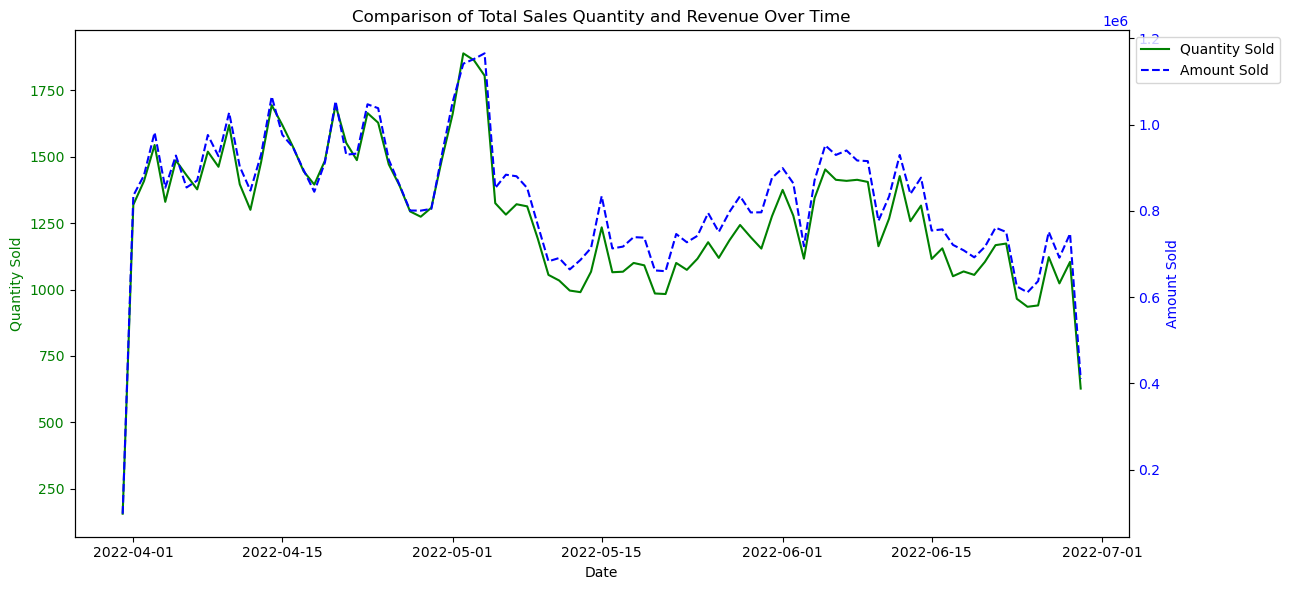

In [44]:
import matplotlib.pyplot as plt

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot quantity sold on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity Sold', color='green')
ax1.plot(df_amazon_all['date'], df_amazon_all['qty'], color='green', label='Quantity Sold')
ax1.tick_params(axis='y', labelcolor='green')

# Create a secondary y-axis for amount
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Amount Sold', color='blue')
ax2.plot(df_amazon_all['date'], df_amazon_all['amount'], color='blue', linestyle='--', label='Amount Sold')
ax2.tick_params(axis='y', labelcolor='blue')

# Add titles and labels
plt.title('Comparison of Total Sales Quantity and Revenue Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend for both y-axes
fig.legend(loc="upper left", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

#### Visualizations – Sales Quantity Over Time (Line Plot)

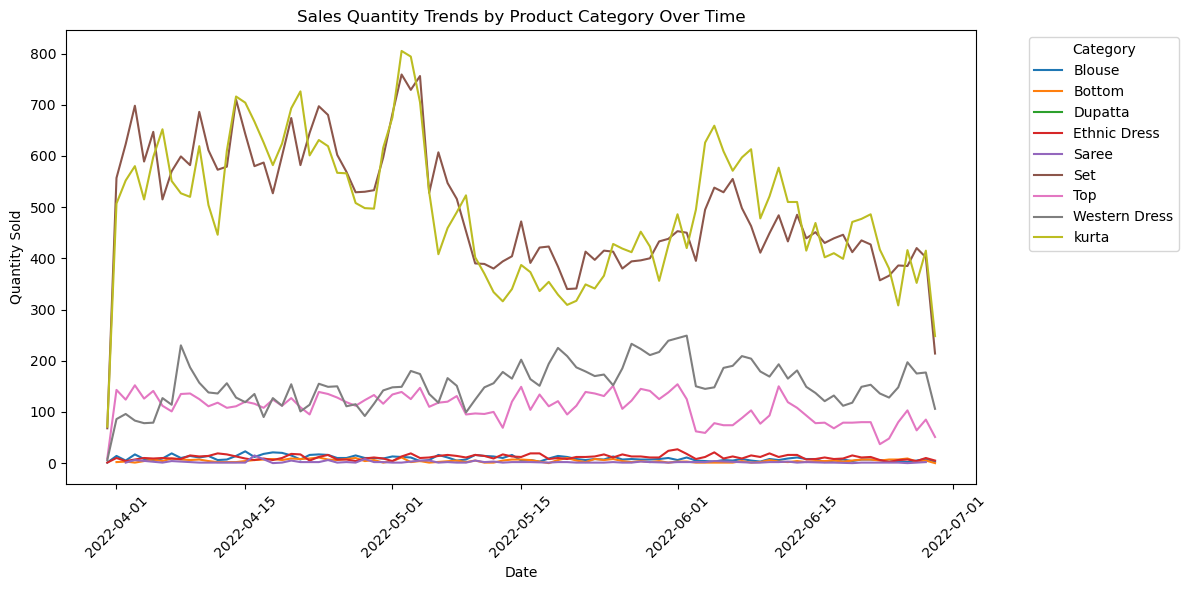

In [45]:
# Line plot of sales quantity over time for each category
plt.figure(figsize=(12,6))

# Plot each category separately and label them
categories = df_amazon_category['category'].unique()

for category in categories:
    subset = df_amazon_category[df_amazon_category['category'] == category]
    plt.plot(subset['date'], subset['qty'], label=category)  # Plot each category with a label

# Add titles and labels
plt.title('Sales Quantity Trends by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend to indicate which line corresponds to which category
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

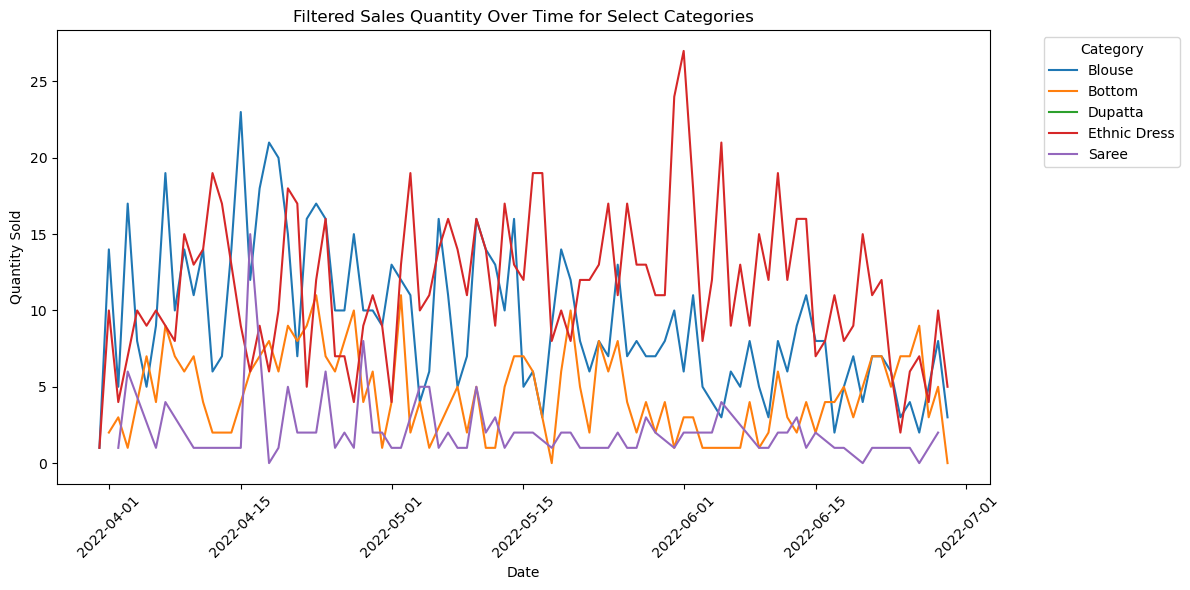

In [46]:
# Line plot of sales quantity over time for each category (excluding specific categories)
plt.figure(figsize=(12,6))

# Filter out the categories to be removed
categories_to_remove = ['kurta', 'Set', 'Top', 'Western Dress']
df_amazon_category_filtered = df_amazon_category[~df_amazon_category['category'].isin(categories_to_remove)]

# Plot each remaining category separately and label them
categories_filtered = df_amazon_category_filtered['category'].unique()

for category in categories_filtered:
    subset = df_amazon_category_filtered[df_amazon_category_filtered['category'] == category]
    plt.plot(subset['date'], subset['qty'], label=category)  # Plot each category with a label

# Add titles and labels
plt.title('Filtered Sales Quantity Over Time for Select Categories')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend to indicate which line corresponds to which category
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

#### Visualizations – Sales Amount Over Time  (Line Plot)

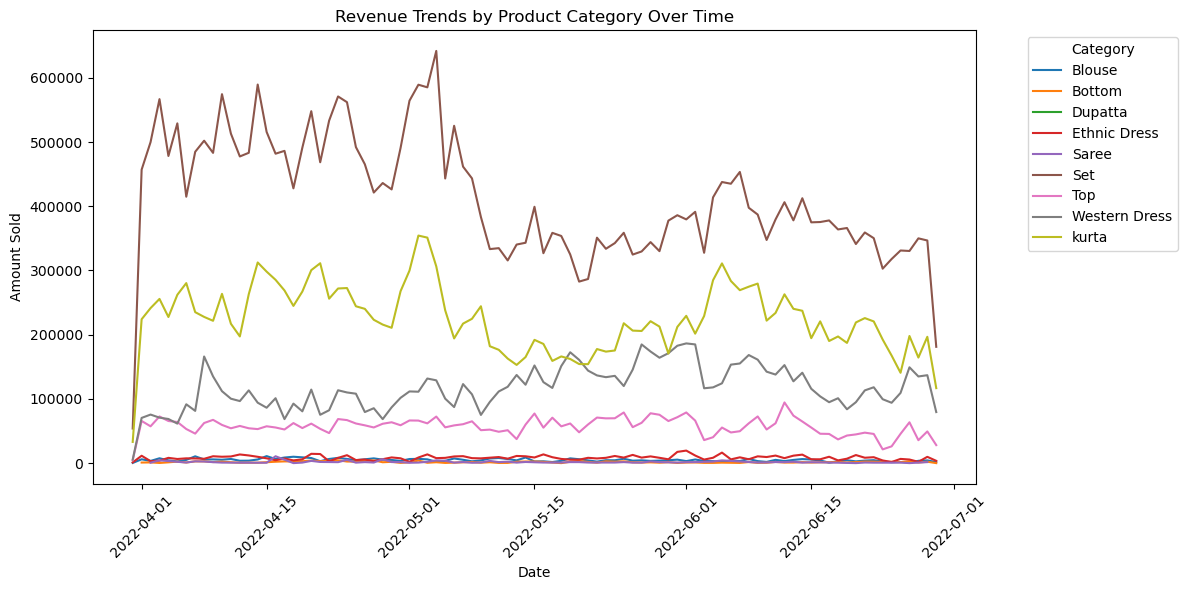

In [47]:
# Line plot of sales amount over time for each category
plt.figure(figsize=(12,6))

# Plot each category separately and label them
categories = df_amazon_category['category'].unique()

for category in categories:
    subset = df_amazon_category[df_amazon_category['category'] == category]
    plt.plot(subset['date'], subset['amount'], label=category)  # Plot each category with a label

# Add titles and labels
plt.title('Revenue Trends by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend to indicate which line corresponds to which category
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

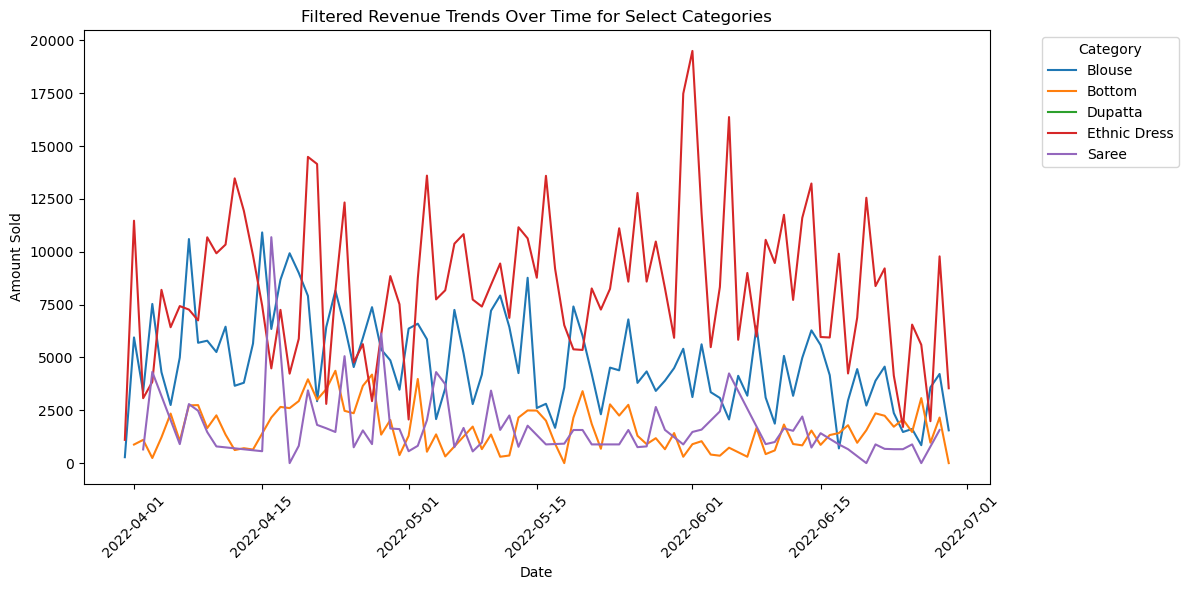

In [48]:
# Line plot of sales amount over time for each category (excluding specific categories)
plt.figure(figsize=(12,6))

# Filter out the categories to be removed
categories_to_remove = ['kurta', 'Set', 'Top', 'Western Dress']
df_amazon_category_filtered = df_amazon_category[~df_amazon_category['category'].isin(categories_to_remove)]

# Plot each remaining category separately and label them
categories_filtered = df_amazon_category_filtered['category'].unique()

for category in categories_filtered:
    subset = df_amazon_category_filtered[df_amazon_category_filtered['category'] == category]
    plt.plot(subset['date'], subset['amount'], label=category)  # Plot each category with a label

# Add titles and labels
plt.title('Filtered Revenue Trends Over Time for Select Categories')
plt.xlabel('Date')
plt.ylabel('Amount Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend to indicate which line corresponds to which category
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

#### Visualizations – Sales Quantity Distribution (Histogram)

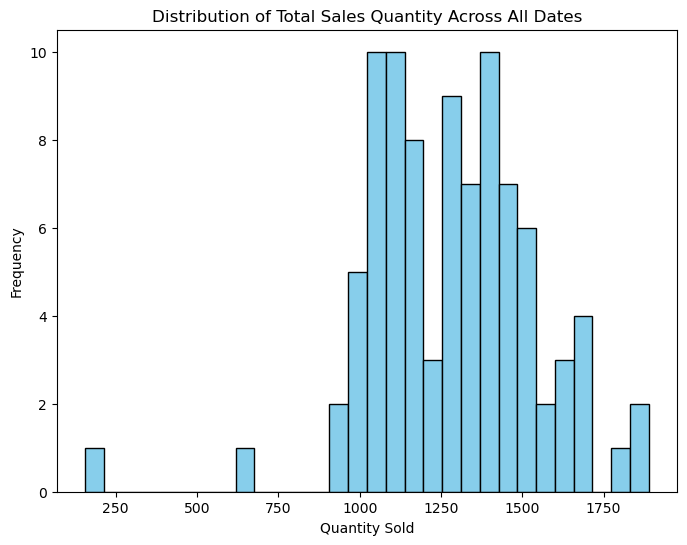

In [49]:
import matplotlib.pyplot as plt

# Histogram of Sales Quantity
plt.figure(figsize=(8,6))
plt.hist(df_amazon_all['qty'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales Quantity Across All Dates')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

#### Visualizations – Average Price by Category (Bar Chart)

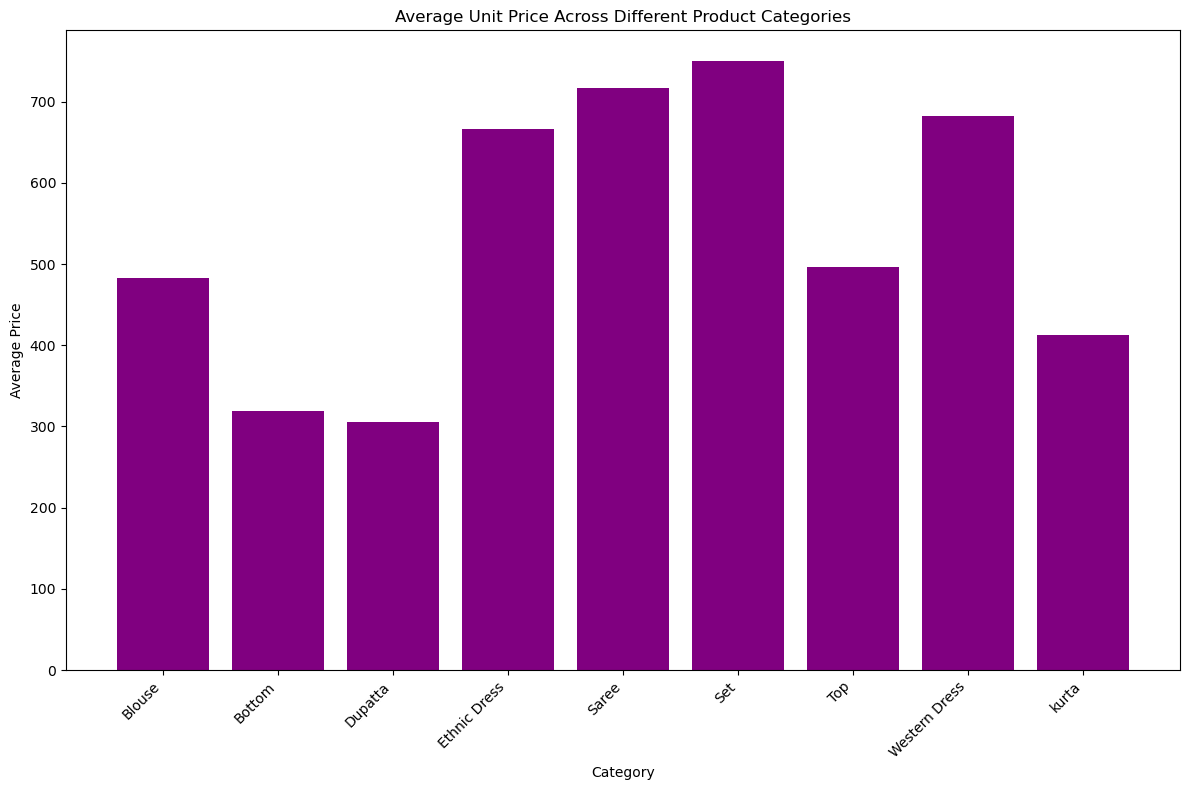

In [50]:
# Group by category and calculate average unit price
avg_price_by_category = df_amazon_category.groupby('category')['unit_price'].mean()

# Bar chart of average price by category
plt.figure(figsize=(12,8))
plt.bar(avg_price_by_category.index, avg_price_by_category.values, color='purple')
plt.title('Average Unit Price Across Different Product Categories')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Visualizations – Sales Quantity vs. Unit Price (Scatter Plot)

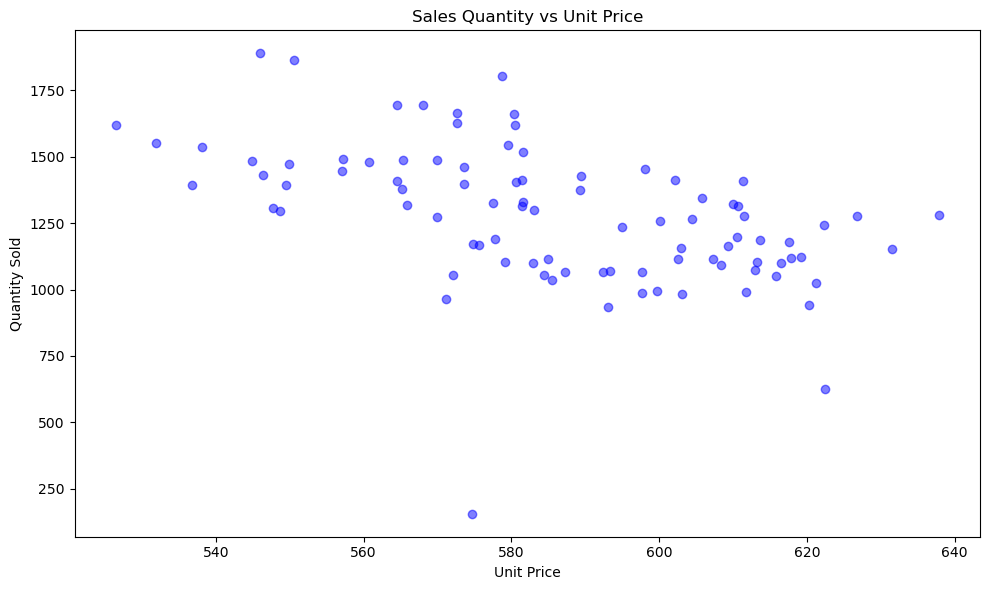

In [51]:
# Scatter plot of unit price vs sales quantity
plt.figure(figsize=(10,6))
plt.scatter(df_amazon_all['unit_price'], df_amazon_all['qty'], alpha=0.5, color='blue')
plt.title('Sales Quantity vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

#### Visualizations – Sales Velocity Over Time (7-day Rolling Sum)

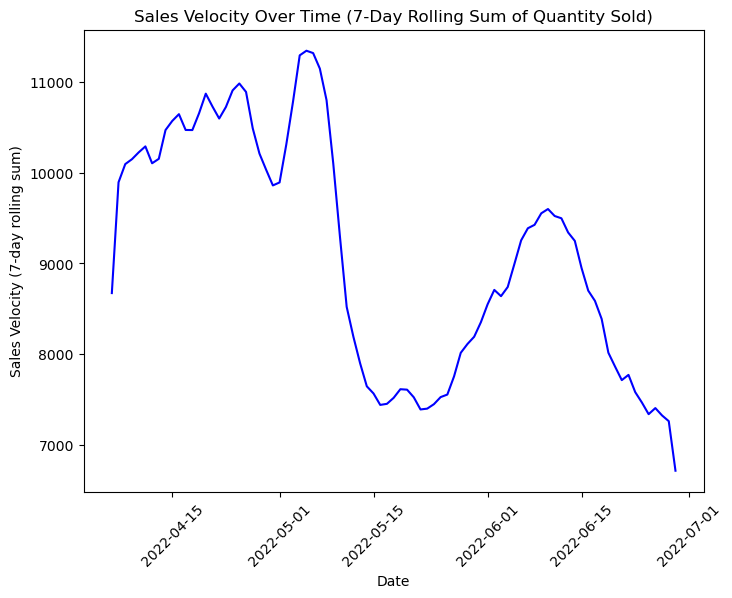

In [52]:
import matplotlib.pyplot as plt

# Assuming 'date' column is already in datetime format
df_amazon_all['sales_velocity'] = df_amazon_all['qty'].rolling(window=7).sum()

# Line plot of Sales Velocity over time
plt.figure(figsize=(8,6))
plt.plot(df_amazon_all['date'], df_amazon_all['sales_velocity'], color='blue')
plt.title('Sales Velocity Over Time (7-Day Rolling Sum of Quantity Sold)')
plt.xlabel('Date')
plt.ylabel('Sales Velocity (7-day rolling sum)')
plt.xticks(rotation=45)
plt.show()

#### Visualizations – Unit Price Distribution (Box Plot)

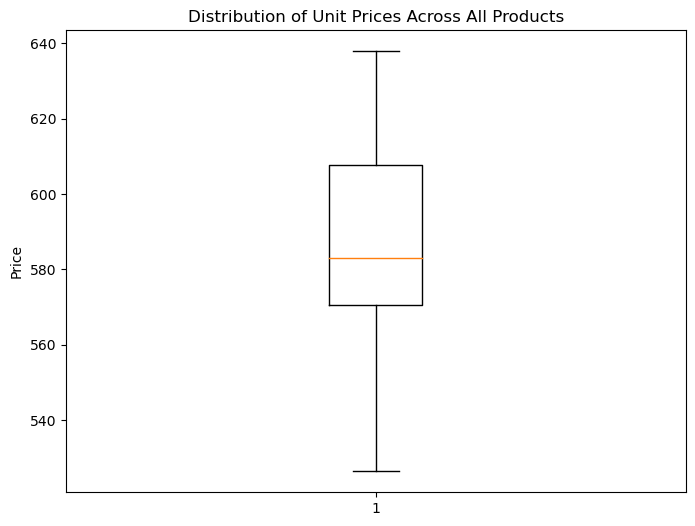

In [53]:
import matplotlib.pyplot as plt

# Boxplot of Unit Price
plt.figure(figsize=(8,6))
plt.boxplot(df_amazon_all['unit_price'].dropna())
plt.title('Distribution of Unit Prices Across All Products')
plt.ylabel('Price')
plt.show()


#### Visualizations – Promotion Impact on Sales (Bar Chart)

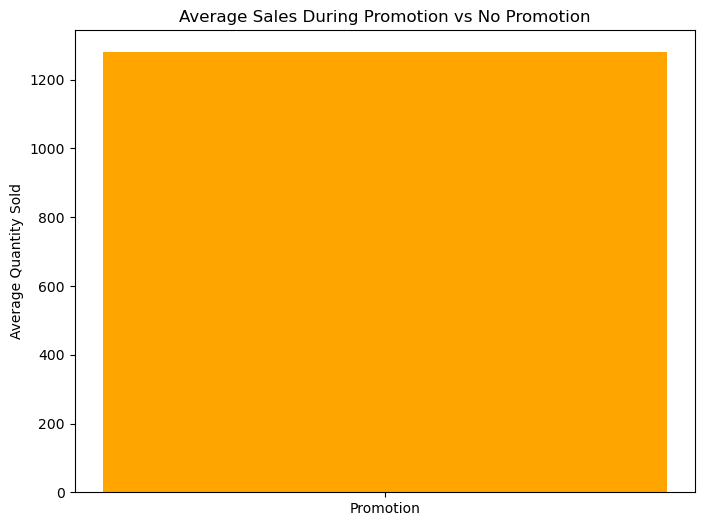

In [54]:
import matplotlib.pyplot as plt

# Calculating average sales during promotion and non-promotion periods
promo_sales = df_amazon_all[df_amazon_all['promotion_active'] > 0]['qty'].mean()
non_promo_sales = df_amazon_all[df_amazon_all['promotion_active'] == 0]['qty'].mean()

# Bar chart comparing average sales during promotion vs. non-promotion
plt.figure(figsize=(8,6))
plt.bar(['Promotion', 'No Promotion'], [promo_sales, non_promo_sales], color=['orange', 'blue'])
plt.title('Average Sales During Promotion vs No Promotion')
plt.ylabel('Average Quantity Sold')
plt.show()

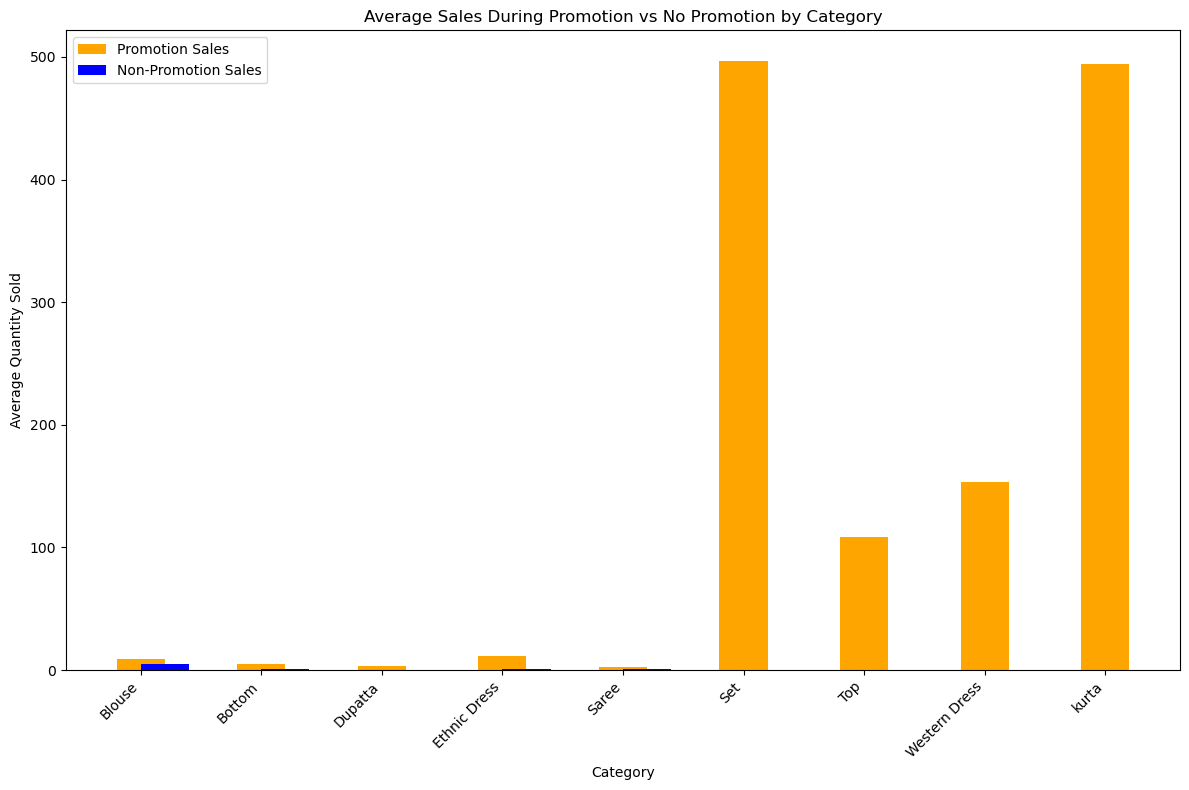

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_amazon_category is already loaded
# Group by category and calculate average sales during promotion and non-promotion periods
promo_sales_by_category = df_amazon_category[df_amazon_category['promotion_active'] > 0].groupby('category')['qty'].mean()
non_promo_sales_by_category = df_amazon_category[df_amazon_category['promotion_active'] == 0].groupby('category')['qty'].mean()

# Align both series (fill missing categories with NaN)
categories = promo_sales_by_category.index.union(non_promo_sales_by_category.index)

promo_sales_by_category = promo_sales_by_category.reindex(categories)
non_promo_sales_by_category = non_promo_sales_by_category.reindex(categories)

# Create a bar chart comparing promotion vs. non-promotion sales for each category
plt.figure(figsize=(12,8))
plt.bar(categories, promo_sales_by_category, width=0.4, label='Promotion Sales', color='orange', align='center')
plt.bar(categories, non_promo_sales_by_category, width=0.4, label='Non-Promotion Sales', color='blue', align='edge')

plt.title('Average Sales During Promotion vs No Promotion by Category')
plt.ylabel('Average Quantity Sold')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

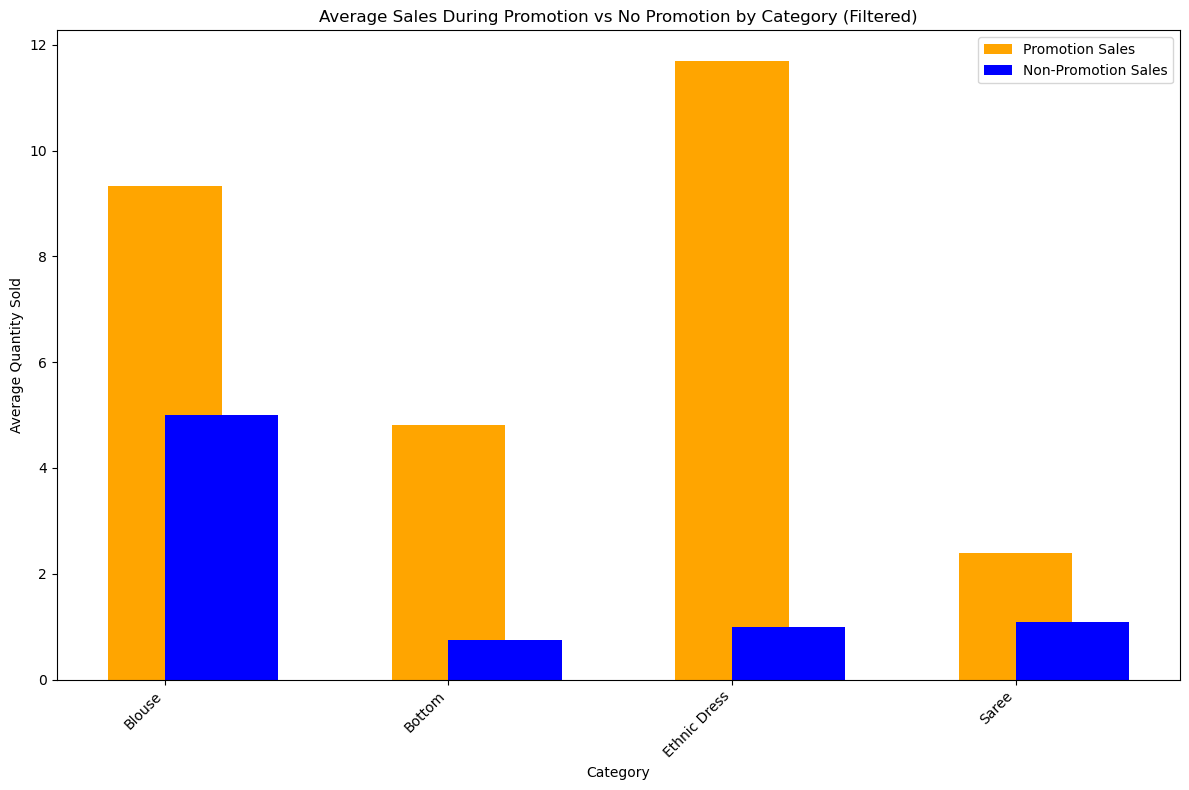

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_amazon_category is already loaded
# Group by category and calculate average sales during promotion and non-promotion periods
promo_sales_by_category = df_amazon_category[df_amazon_category['promotion_active'] > 0].groupby('category')['qty'].mean()
non_promo_sales_by_category = df_amazon_category[df_amazon_category['promotion_active'] == 0].groupby('category')['qty'].mean()

# Align both series (fill missing categories with NaN)
categories = promo_sales_by_category.index.union(non_promo_sales_by_category.index)

promo_sales_by_category = promo_sales_by_category.reindex(categories)
non_promo_sales_by_category = non_promo_sales_by_category.reindex(categories)

# Filter out specific categories
categories_to_remove = ['Set', 'Top', 'Western Dress', 'kurta', 'Dupatta']
promo_sales_by_category = promo_sales_by_category.drop(categories_to_remove, errors='ignore')
non_promo_sales_by_category = non_promo_sales_by_category.drop(categories_to_remove, errors='ignore')
categories = promo_sales_by_category.index  # Get updated categories

# Create a bar chart comparing promotion vs. non-promotion sales for each category
plt.figure(figsize=(12,8))
plt.bar(categories, promo_sales_by_category, width=0.4, label='Promotion Sales', color='orange', align='center')
plt.bar(categories, non_promo_sales_by_category, width=0.4, label='Non-Promotion Sales', color='blue', align='edge')

plt.title('Average Sales During Promotion vs No Promotion by Category (Filtered)')
plt.ylabel('Average Quantity Sold')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

------------------------------------

#### Creating df_amazon_correlation_matrix

In [57]:
import pandas as pd

# Select the relevant columns for the correlation matrix
df_amazon_correlation_matrix = df_amazon_sku[['qty', 'amount', 'unit_price', 
                                              'promotion_active', 'fulfilment', 'size', 
                                              'ship_service_level', 'b2b', 
                                              'ship_region', 'category']].copy()

# Encode categorical columns
# Use pd.get_dummies() for non-ordinal categories like fulfilment, size, sales channel, etc.
df_amazon_correlation_matrix_encoded = pd.get_dummies(df_amazon_correlation_matrix, 
                                                      columns=['fulfilment', 'size', 
                                                               'ship_service_level', 'b2b', 'ship_region', 'category'], 
                                                      drop_first=True)

In [58]:
# Print or save the df for further use
df_amazon_correlation_matrix_encoded.head(10)

qty  amount  unit_price  promotion_active  fulfilment_Merchant  size_4XL  \
0    1   229.0       229.0                 1                False     False   
1    1   229.0       229.0                 1                 True     False   
2    1   301.0       301.0                 1                False     False   
3    1   301.0       301.0                 0                False     False   
4    1   229.0       229.0                 1                 True     False   
5    1   229.0       229.0                 1                 True     False   
6    1   301.0       301.0                 1                 True     False   
7    1   229.0       229.0                 0                False     False   
8    1   310.0       310.0                 0                False     False   
9    1   301.0       301.0                 1                False     False   

   size_5XL  size_6XL  size_Free  size_L  ...  ship_region_South  \
0     False     False      False   False  ...               True   
1     False     False      False   False  ...              False   
2     False     False      False   False  ...               True   
3     False     False      False   False  ...               True   
4     False     False      False   False  ...              False   
5     False     False      False   False  ...               True   
6     False     False      False   False  ...              False   
7     False     False      False   False  ...               True   
8     False     False      False   False  ...               True   
9     False     False      False   False  ...               True   

   ship_region_West  category_Bottom  category_Dupatta  category_Ethnic Dress  \
0             False             True             False                  False   
1             False             True             False                  False   
2             False             True             False                  False   
3             False             True             False                  False   
4             False             True             False                  False   
5             False             True             False                  False   
6             False             True             False                  False   
7             False             True             False                  False   
8             False             True             False                  False   
9             False             True             False                  False   

   category_Saree  category_Set  category_Top  category_Western Dress  \
0           False         False         False                   False   
1           False         False         False                   False   
2           False         False         False                   False   
3           False         False         False                   False   
4           False         False         False                   False   
5           False         False         False                   False   
6           False         False         False                   False   
7           False         False         False                   False   
8           False         False         False                   False   
9           False         False         False                   False   

   category_kurta  
0           False  
1           False  
2           False  
3           False  
4           False  
5           False  
6           False  
7           False  
8           False  
9           False  

[10 rows x 32 columns]

In [59]:
# Print or save the df for further use
df_amazon_correlation_matrix_encoded.dtypes

qty                              int64
amount                         float64
unit_price                     float64
promotion_active                 int64
fulfilment_Merchant               bool
size_4XL                          bool
size_5XL                          bool
size_6XL                          bool
size_Free                         bool
size_L                            bool
size_M                            bool
size_S                            bool
size_XL                           bool
size_XS                           bool
size_XXL                          bool
ship_service_level_Standard       bool
b2b_True                          bool
ship_region_Central               bool
ship_region_East                  bool
ship_region_North                 bool
ship_region_Northeast             bool
ship_region_RAJSHTHAN             bool
ship_region_South                 bool
ship_region_West                  bool
category_Bottom                   bool
category_Dupatta         

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\2784067251.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=correlation_matrix.applymap(annot_filter),


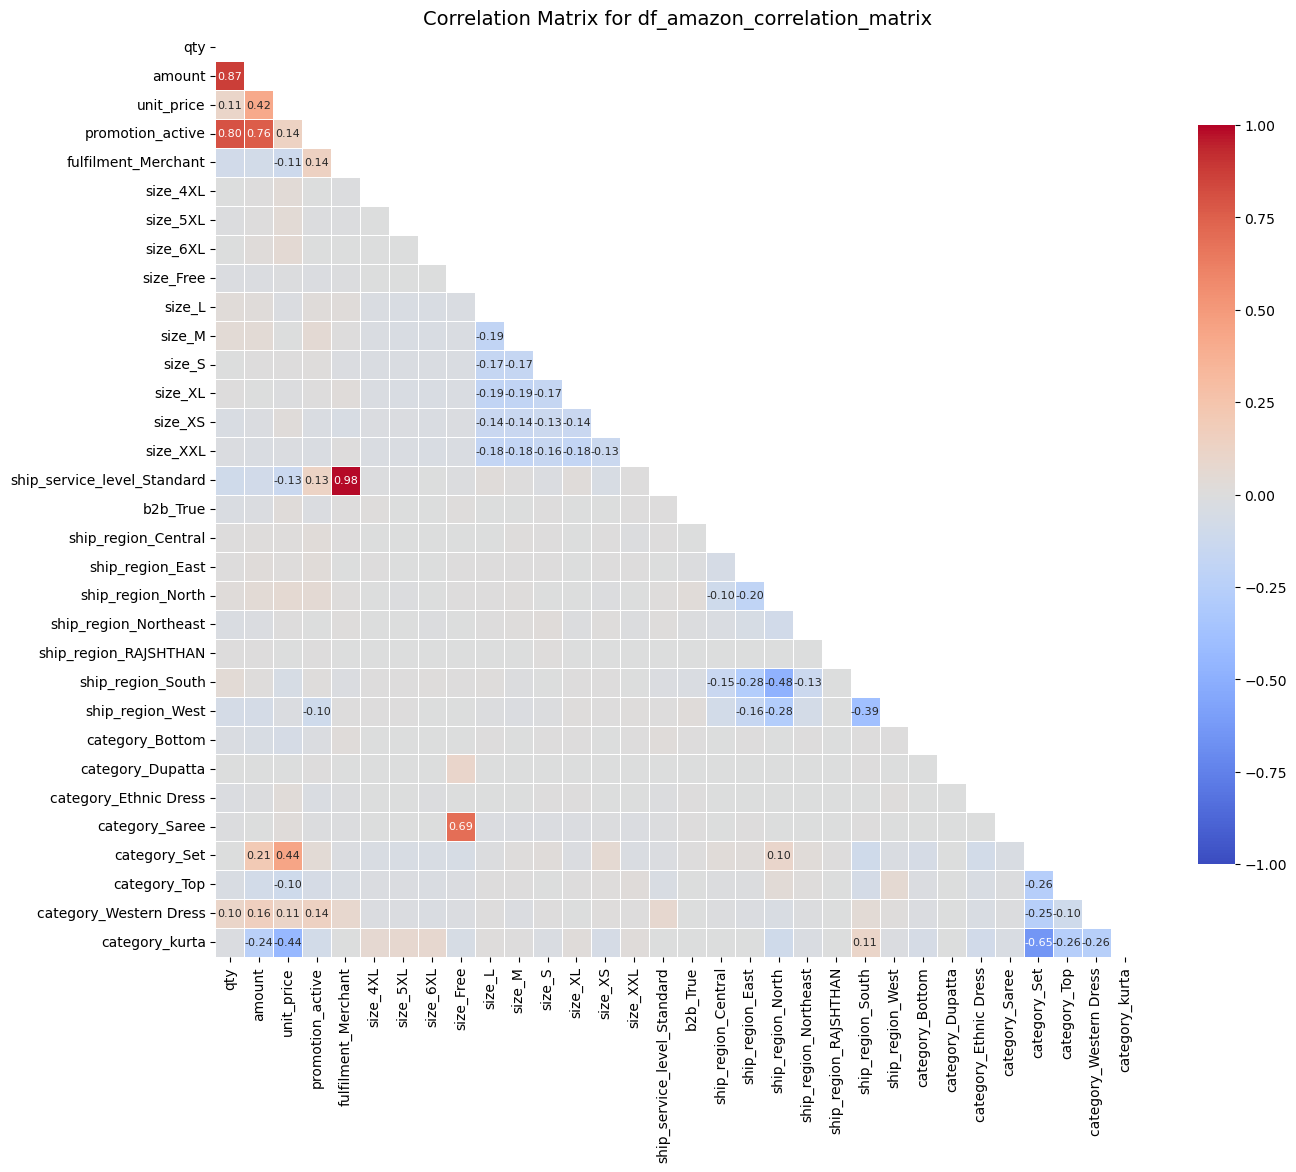

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import TwoSlopeNorm

# Create the correlation matrix for the encoded DataFrame
correlation_matrix = df_amazon_correlation_matrix_encoded.corr()

# Create a mask for the upper triangle (optional, if you want to hide duplicate info)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a function to display only values above 0.1
def annot_filter(val):
    return f"{val:.2f}" if abs(val) > 0.1 else ""

# Set up the figure and axis
plt.figure(figsize=(15, 12))

# Use the previous color palette (coolwarm is a good one)
cmap = sns.color_palette("coolwarm", as_cmap=True)


# Create a normalization that centers 0 at gray
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Draw the heatmap with the mask, using annot_filter to show values > 0.1
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=correlation_matrix.applymap(annot_filter),
            fmt="", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .8}, square=True, norm=norm)

# Adjust X and Y label font sizes for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Title
plt.title("Correlation Matrix for df_amazon_correlation_matrix", fontsize=14)

# Display the heatmap
plt.show()

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\1294283126.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(correlation_matrix_categories_regions, mask=mask, cmap=cmap, annot=correlation_matrix_categories_regions.applymap(annot_filter),


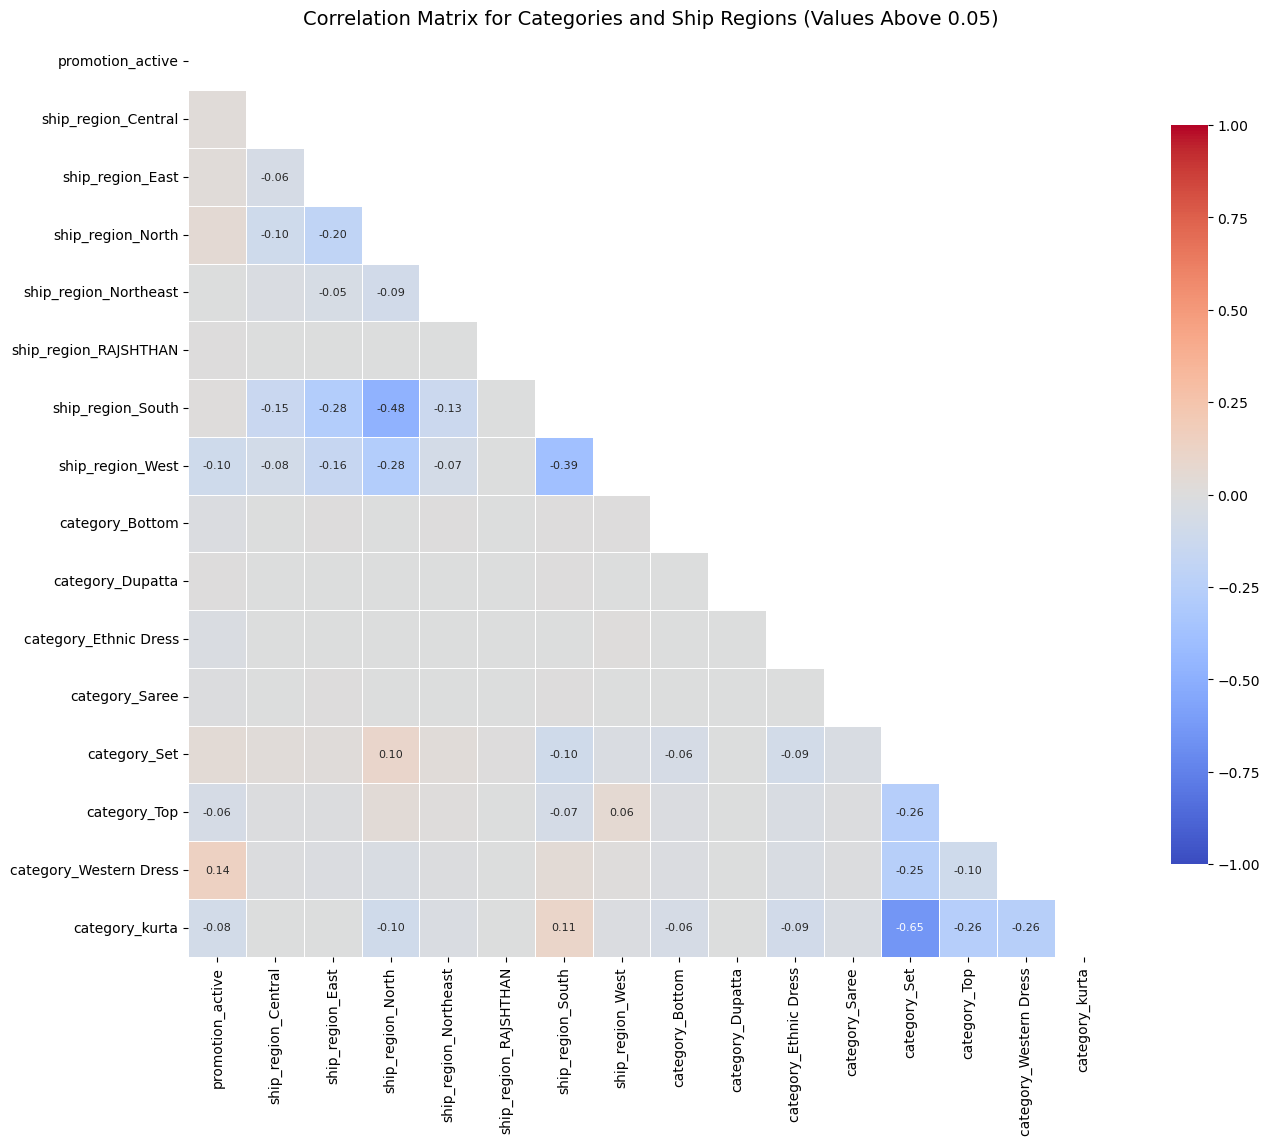

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop all columns that are not related to categories or ship regions
columns_to_drop = ['qty', 'amount', 'unit_price', 'fulfilment_Merchant',
                   'size_4XL', 'size_5XL', 'size_6XL', 'size_Free', 'size_L', 'size_M',
                   'size_S', 'size_XL', 'size_XS', 'size_XXL',
                   'ship_service_level_Standard', 'b2b_True']

df_amazon_correlation_matrix_categories_regions = df_amazon_correlation_matrix_encoded.drop(columns=columns_to_drop)

# Create the correlation matrix for the categories and ship regions
correlation_matrix_categories_regions = df_amazon_correlation_matrix_categories_regions.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_categories_regions, dtype=bool))

# Create a function to display only values above 0.2
def annot_filter(val):
    return f"{val:.2f}" if abs(val) >= 0.05 else ""

# Set up the figure and axis
plt.figure(figsize=(15, 12))

# Use the previous color palette (coolwarm)
cmap = sns.color_palette("coolwarm", as_cmap=True)


# Create a normalization that centers 0 at gray
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Draw the heatmap with the mask, using annot_filter to show values > 0.2
sns.heatmap(correlation_matrix_categories_regions, mask=mask, cmap=cmap, annot=correlation_matrix_categories_regions.applymap(annot_filter),
            fmt="", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .8}, square=True, norm=norm)

# Adjust X and Y label font sizes for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Title
plt.title("Correlation Matrix for Categories and Ship Regions (Values Above 0.05)", fontsize=14)

# Display the heatmap
plt.show()

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\2591933048.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(correlation_matrix_categories_sizes, mask=mask, cmap=cmap, annot=correlation_matrix_categories_sizes.applymap(annot_filter),


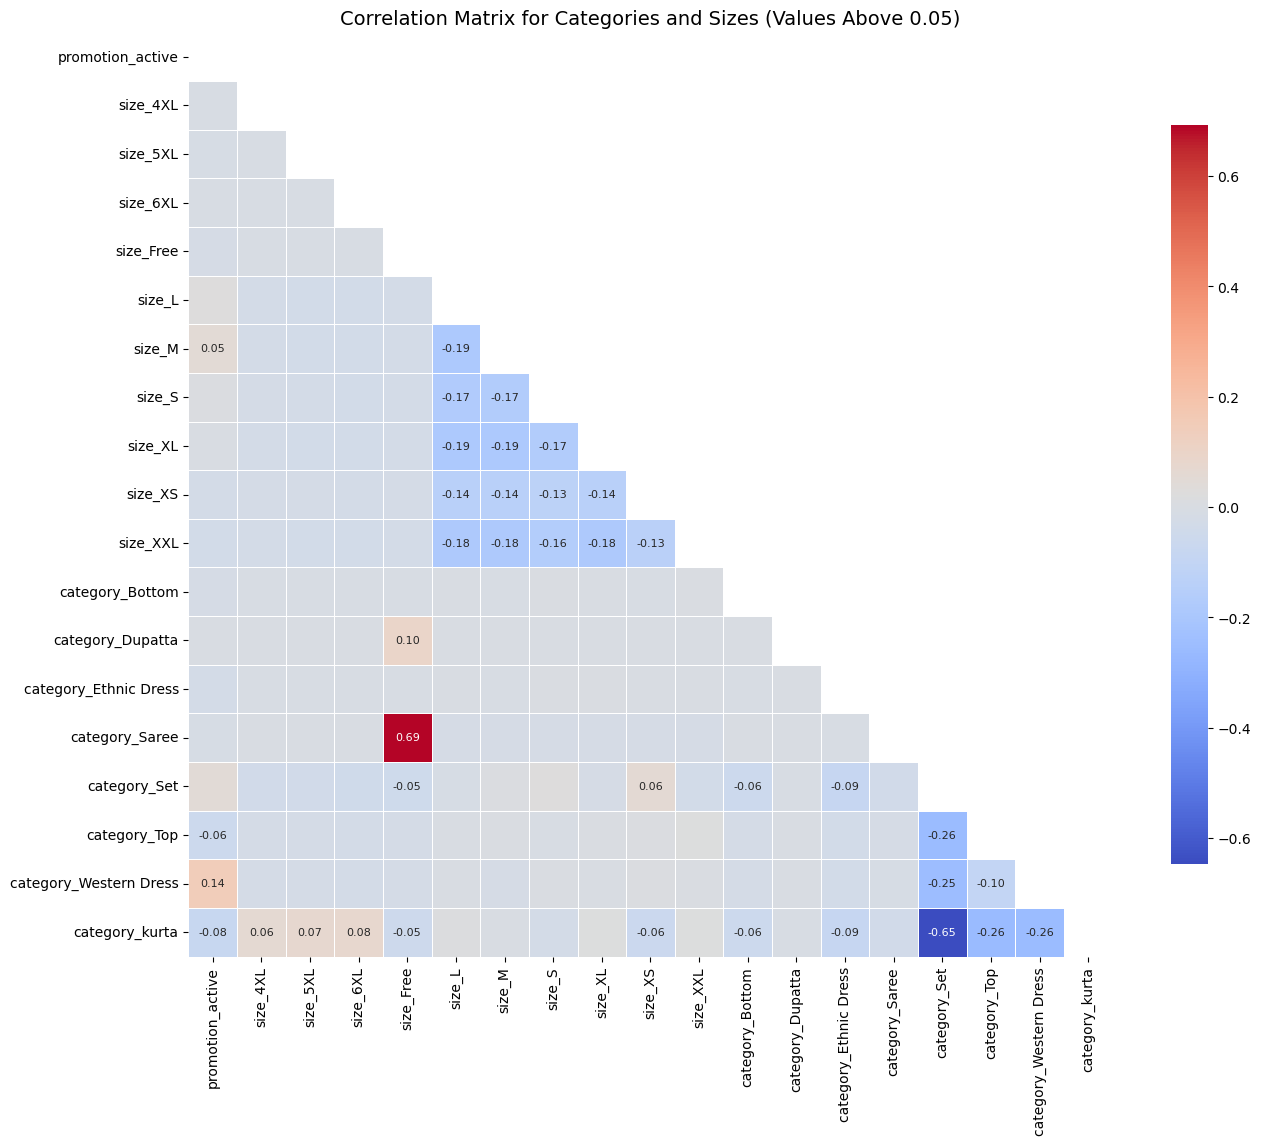

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop all columns that are not related to categories or sizes
columns_to_drop = ['qty', 'amount', 'unit_price', 'fulfilment_Merchant',
                   'ship_region_Central', 'ship_region_East', 'ship_region_North',
                   'ship_region_Northeast', 'ship_region_RAJSHTHAN', 'ship_region_South',
                   'ship_region_West', 'ship_service_level_Standard', 'b2b_True']

df_amazon_correlation_matrix_categories_sizes = df_amazon_correlation_matrix_encoded.drop(columns=columns_to_drop)

# Create the correlation matrix for the categories and sizes
correlation_matrix_categories_sizes = df_amazon_correlation_matrix_categories_sizes.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_categories_sizes, dtype=bool))

# Create a function to display only values above 0.2
def annot_filter(val):
    return f"{val:.2f}" if abs(val) >= 0.05 else ""

# Set up the figure and axis
plt.figure(figsize=(15, 12))

# Use the previous color palette (coolwarm)
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask, using annot_filter to show values > 0.2
sns.heatmap(correlation_matrix_categories_sizes, mask=mask, cmap=cmap, annot=correlation_matrix_categories_sizes.applymap(annot_filter),
            fmt="", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .8}, square=True)

# Adjust X and Y label font sizes for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Title
plt.title("Correlation Matrix for Categories and Sizes (Values Above 0.05)", fontsize=14)

# Display the heatmap
plt.show()



C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\3207613319.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(correlation_matrix_no_categories_sizes_regions, mask=mask, cmap=cmap, annot=correlation_matrix_no_categories_sizes_regions.applymap(annot_filter),


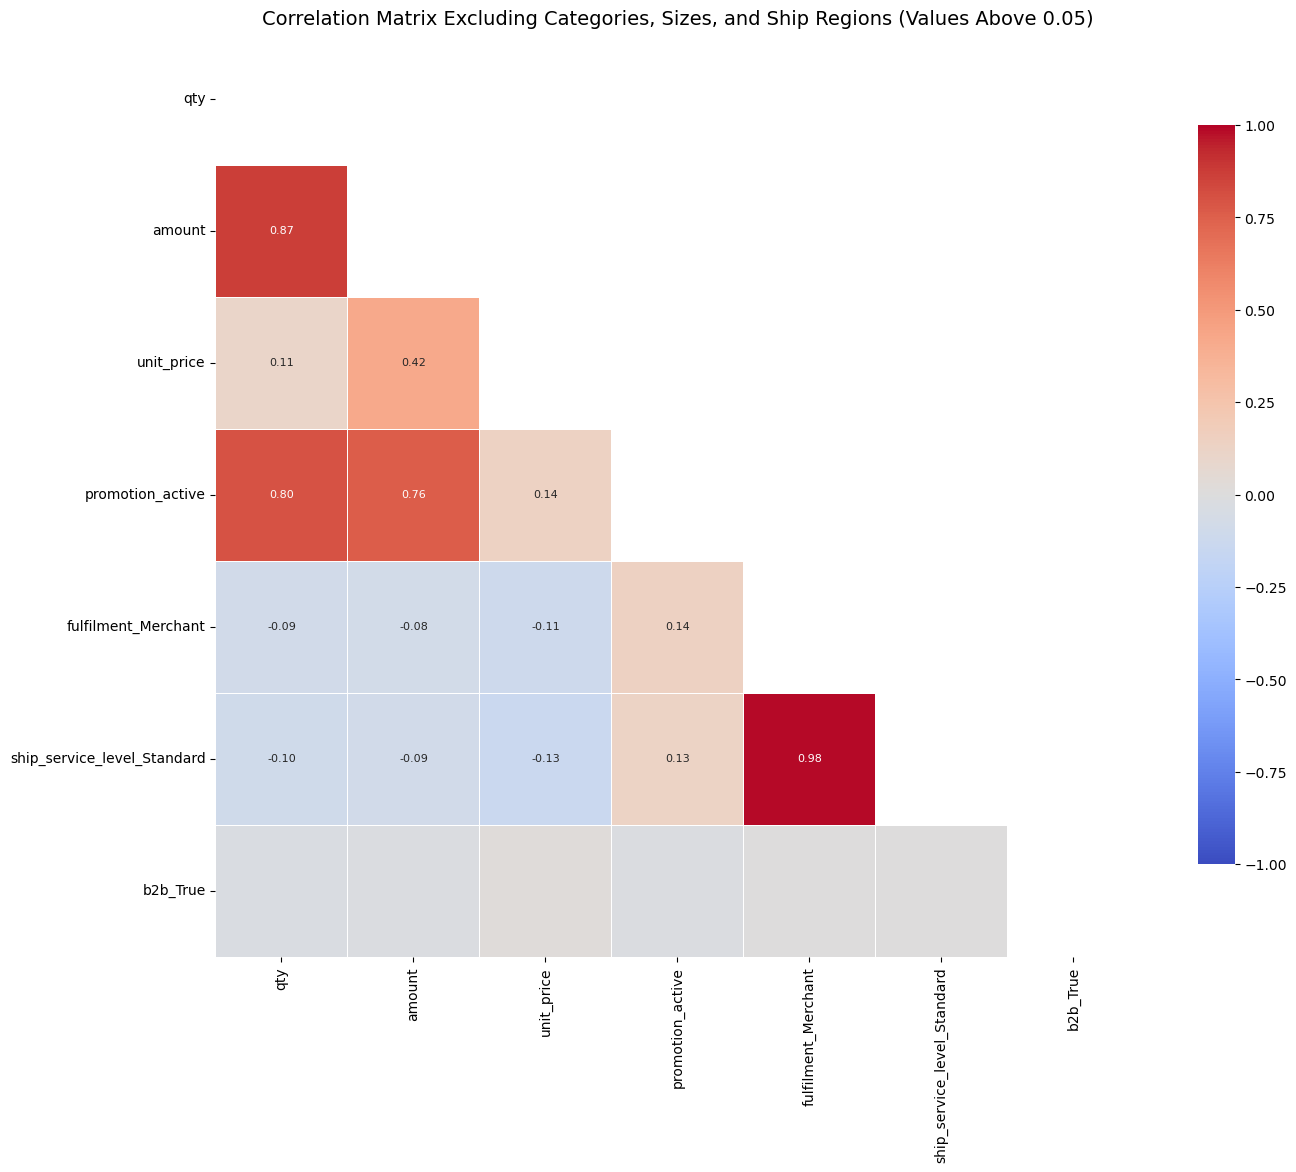

In [63]:
# Define the columns to drop (categories, sizes, and ship regions)
columns_to_drop = ['ship_region_Central', 'ship_region_East', 'ship_region_North', 'ship_region_Northeast', 
                   'ship_region_RAJSHTHAN', 'ship_region_South', 'ship_region_West',
                   'category_Bottom', 'category_Dupatta', 'category_Ethnic Dress', 'category_Saree', 
                   'category_Set', 'category_Top', 'category_Western Dress', 'category_kurta',
                   'size_4XL', 'size_5XL', 'size_6XL', 'size_Free', 'size_L', 'size_M', 'size_S', 
                   'size_XL', 'size_XS', 'size_XXL']

# Create a new DataFrame without these columns
df_amazon_correlation_matrix_no_categories_sizes_regions = df_amazon_correlation_matrix_encoded.drop(columns=columns_to_drop)

# Create the correlation matrix
correlation_matrix_no_categories_sizes_regions = df_amazon_correlation_matrix_no_categories_sizes_regions.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_no_categories_sizes_regions, dtype=bool))

# Define a function to display numbers only for values above 0.2
def annot_filter(val):
    return f"{val:.2f}" if abs(val) > 0.05 else ""

# Set up the figure and axis
plt.figure(figsize=(15, 12))

# Use the previous color palette (coolwarm)
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a normalization that centers 0 at gray
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Draw the heatmap, showing colors for all values and numbers only for those > 0.2
sns.heatmap(correlation_matrix_no_categories_sizes_regions, mask=mask, cmap=cmap, annot=correlation_matrix_no_categories_sizes_regions.applymap(annot_filter),
            fmt="", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .8}, square=True, norm=norm)

# Adjust X and Y label font sizes for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Title
plt.title("Correlation Matrix Excluding Categories, Sizes, and Ship Regions (Values Above 0.05)", fontsize=14)

# Display the heatmap
plt.show()

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\1097909444.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(correlation_matrix_categories_qty, mask=mask, cmap=cmap, annot=correlation_matrix_categories_qty.applymap(annot_filter),


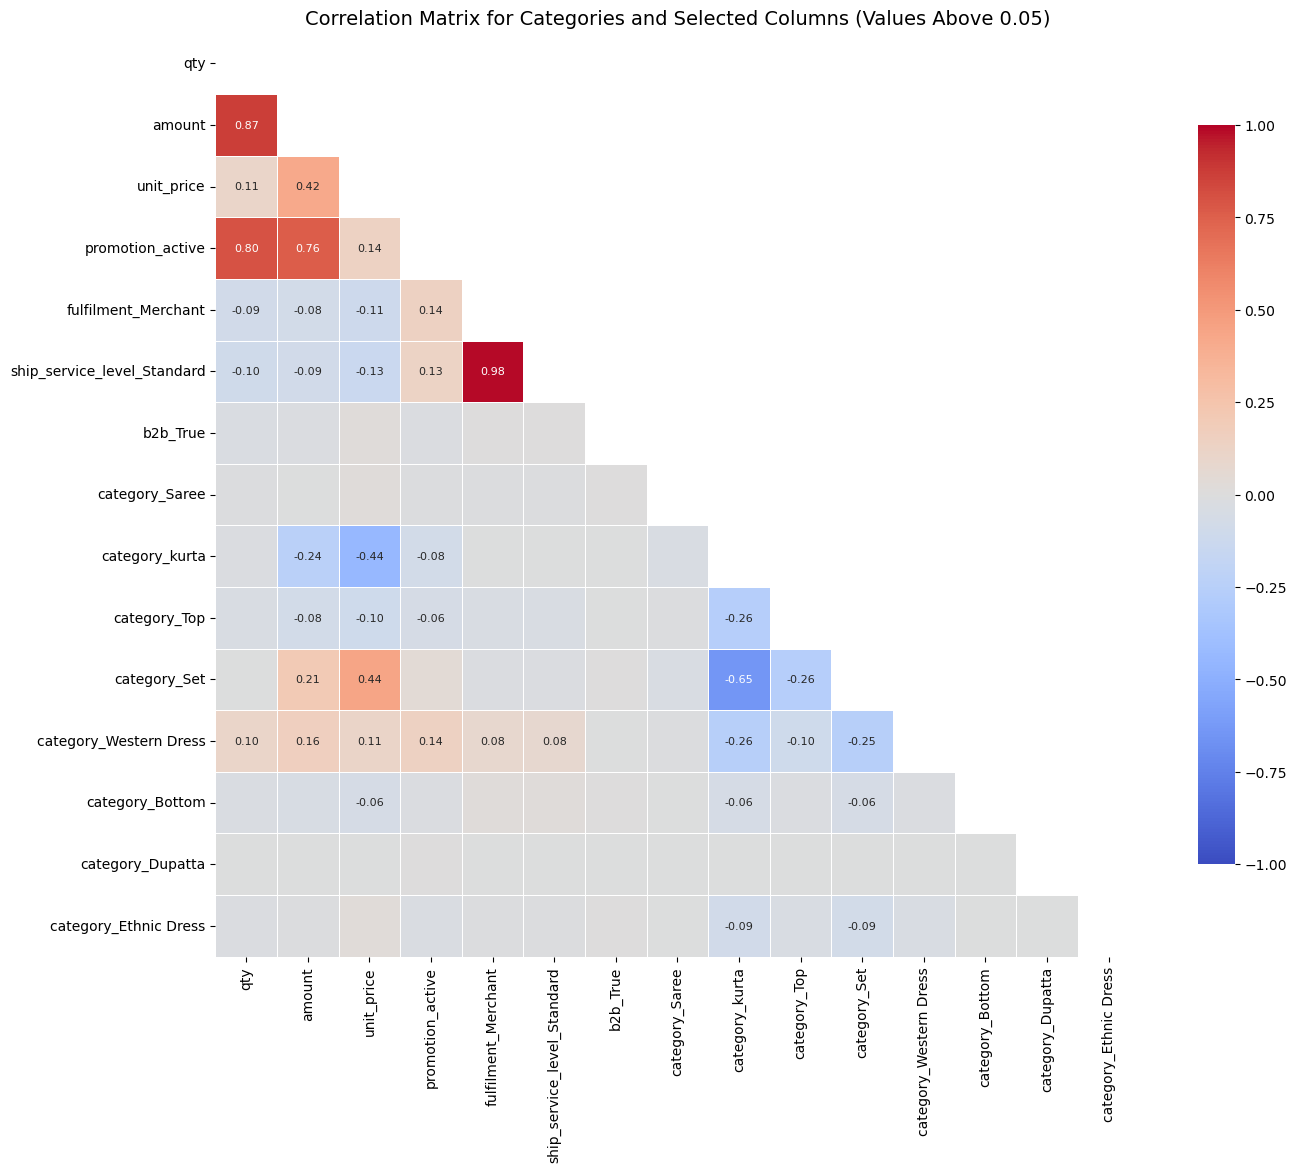

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the relevant columns for the correlation matrix
columns_to_keep = [
    'qty', 'amount', 'unit_price', 'promotion_active', 'fulfilment_Merchant',
    'ship_service_level_Standard', 'b2b_True',
    'category_Saree', 'category_kurta', 'category_Top', 'category_Set',
    'category_Western Dress', 'category_Bottom', 'category_Dupatta',
    'category_Ethnic Dress'
]

# Create a new DataFrame with only the selected columns
df_amazon_correlation_matrix_categories_qty = df_amazon_correlation_matrix_encoded[columns_to_keep]

# Create the correlation matrix
correlation_matrix_categories_qty = df_amazon_correlation_matrix_categories_qty.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_categories_qty, dtype=bool))

# Set up the figure and axis
plt.figure(figsize=(15, 12))

# Use the 'coolwarm' color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)


# Create a normalization that centers 0 at gray
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Create a function to display only values above 0.2
def annot_filter(val):
    return f"{val:.2f}" if abs(val) > 0.05 else ""

# Draw the heatmap with the mask and display values > 0.2
sns.heatmap(correlation_matrix_categories_qty, mask=mask, cmap=cmap, annot=correlation_matrix_categories_qty.applymap(annot_filter),
            fmt="", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .8}, square=True, norm=norm)

# Adjust X and Y label font sizes for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Title
plt.title("Correlation Matrix for Categories and Selected Columns (Values Above 0.05)", fontsize=14)

# Display the heatmap
plt.show()

#### Checking all dataframes

In [65]:
df_amazon.shape, df_amazon_sku.shape, df_amazon_style.shape, df_amazon_category.shape, df_amazon_all.shape

((128818, 34), (82557, 20), (43171, 20), (703, 19), (91, 20))

------------------------------------

### 1. **Price Elasticity of Demand**

- **Objective**: Measure how changes in price impact demand (sales quantity) to identify the optimal pricing point that maximizes revenue without losing customers.
- **Relevant Columns**:
    - `qty`: Quantity sold (target variable for demand).
    - `unit_price`: Price of the product.
    - `promotion_active`: To check if promotions affect price sensitivity.
    - `sales_velocity`: Rolling sum of sales (can give a sense of sales trend).
- **Model**:
    - **Linear Regression** or **Log-Log Regression** (Lasso or Ridge maybe)(simple yet effective for elasticity).
- **Why**: These models capture the relationship between price and demand, giving a clear elasticity coefficient.

#### Data Preparation

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [67]:
# Create a copy of df_amazon_sku
df_amazon_sku_1 = df_amazon_sku.copy()

# Ensure there are no 0 or negative values for qty and unit_price
df_amazon_sku_1 = df_amazon_sku[df_amazon_sku['qty'] > 0]
df_amazon_sku_1 = df_amazon_sku[df_amazon_sku['unit_price'] > 0]

In [68]:
# Ensure 'qty', 'unit_price', 'promotion_active', and 'sales_velocity' are available
df_amazon_sku_1['sales_velocity'] = df_amazon_sku['qty'].rolling(window=7).sum().fillna(0)

# Log-log transformation (if using log-log regression)
df_amazon_sku_1['log_qty'] = np.log(df_amazon_sku['qty'] + 1)  # Add 1 to avoid log(0)
df_amazon_sku_1['log_unit_price'] = np.log(df_amazon_sku['unit_price'] + 1)
df_amazon_sku_1['log_sales_velocity'] = np.log(df_amazon_sku_1['sales_velocity'] + 1)

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\3015640874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_sku_1['sales_velocity'] = df_amazon_sku['qty'].rolling(window=7).sum().fillna(0)
C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\3015640874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_sku_1['log_qty'] = np.log(df_amazon_sku['qty'] + 1)  # Add 1 to avoid log(0)
C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\3015640874.py:6: SettingWithCopyWarning: 
A value is tryin

In [69]:
df_amazon_sku_1 = df_amazon_sku_1.dropna(subset=['qty', 'unit_price', 'promotion_active', 'sales_velocity'])

#### Linear Regression Model

In [70]:
# Define features and target variable for Linear Regression
X = df_amazon_sku_1[['unit_price', 'promotion_active', 'sales_velocity']]
y = df_amazon_sku_1['qty']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression MAE:", mae_linear)
print("Coefficients:", linear_model.coef_)

Linear Regression MSE: 0.486757848916374
Linear Regression MAE: 0.4627677907298503
Coefficients: [-1.66147437e-04  6.88652214e-01  7.29336259e-02]


#### Log-Log Regression Model

In [71]:
# Define features and target variable for Log-Log Regression
X_log = df_amazon_sku_1[['log_unit_price', 'promotion_active', 'log_sales_velocity']]
y_log = df_amazon_sku_1['log_qty']

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create and train a Log-Log Linear Regression model
log_log_model = LinearRegression()
log_log_model.fit(X_train_log, y_train_log)

# Predict on the test set
y_pred_log_log = log_log_model.predict(X_test_log)

# Evaluate the model
mse_log_log = mean_squared_error(y_test_log, y_pred_log_log)
mae_log_log = mean_absolute_error(y_test_log, y_pred_log_log)

print("Log-Log Regression MSE:", mse_log_log)
print("Log-Log Regression MAE:", mae_log_log)
print("Elasticity Coefficients:", log_log_model.coef_)


Log-Log Regression MSE: 0.036005681793052115
Log-Log Regression MAE: 0.13826499657495672
Elasticity Coefficients: [-0.02838487  0.14942598  0.33304383]


#### Lasso Rregression Model

In [72]:
# Create and train a Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression MAE:", mae_lasso)
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Regression MSE: 0.49740170438204384
Lasso Regression MAE: 0.4447001196112629
Lasso Coefficients: [-1.49759697e-04  5.79899145e-01  8.09012332e-02]


#### Hyperparameter Tuning for Lasso

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the range of alpha values to test
alpha_range = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Lasso Tuning
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_range, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

# Get the best alpha
best_lasso_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha for Lasso: {best_lasso_alpha}")

# Train Lasso with the best alpha
lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train, y_train)

# Evaluate performance
y_pred_lasso_best = lasso_best.predict(X_test)

mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
mae_lasso_best = mean_absolute_error(y_test, y_pred_lasso_best)

print(f"Best Lasso MSE: {mse_lasso_best}")
print("Lasso Regression MAE:", mae_lasso_best)
print("Lasso Coefficients:", lasso_best.coef_)


Best alpha for Lasso: 0.001
Best Lasso MSE: 0.4867633657778666
Lasso Regression MAE: 0.46253762170268625
Lasso Coefficients: [-1.65990291e-04  6.87579935e-01  7.30119051e-02]


#### Ridge Regression Model

In [74]:
# Create and train a Ridge model
ridge_model = Ridge(alpha=0.1)  # Adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression MAE:", mae_ridge)
print("Ridge Coefficients:", ridge_model.coef_)

Ridge Regression MSE: 0.48675786293904394
Ridge Regression MAE: 0.4627674997211581
Ridge Coefficients: [-1.66147239e-04  6.88650881e-01  7.29337454e-02]


#### Hyperparameter Tuning for Ridge

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the range of alpha values to test
alpha_range = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Tuning
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alpha_range, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get the best alpha
best_ridge_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha for Ridge: {best_ridge_alpha}")

# Train Ridge with the best alpha
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, y_train)

# Evaluate performance
y_pred_ridge_best = ridge_best.predict(X_test)

mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
mae_ridge_best = mean_absolute_error(y_test, y_pred_ridge_best)

print(f"Best Ridge MSE: {mse_ridge_best}")
print("Ridge Regression MAE:", mae_ridge_best)
print("Ridge Coefficients:", ridge_best.coef_)

Best alpha for Ridge: 0.001
Best Ridge MSE: 0.486757849056586
Ridge Regression MAE: 0.4627677878197591
Ridge Coefficients: [-1.66147435e-04  6.88652201e-01  7.29336271e-02]


#### Model comparison

In [76]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared for all models
r2_linear = r2_score(y_test, y_pred_linear)
r2_log_log = r2_score(y_test_log, y_pred_log_log)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# R-squared for best Lasso and Ridge models
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

# Display results
print(f"Linear Regression MSE: {mse_linear}, MAE: {mae_linear}, R-squared: {r2_linear}")
print(f"Log-Log Regression MSE: {mse_log_log}, MAE: {mae_log_log}, R-squared: {r2_log_log}")
print(f"Lasso Regression MSE: {mse_lasso}, MAE: {mae_lasso}, R-squared: {r2_lasso}")
print(f"Ridge Regression MSE: {mse_ridge}, MAE: {mae_ridge}, R-squared: {r2_ridge}")
print(f"Best Lasso MSE: {mse_lasso_best}, MAE: {mae_lasso_best}, R-squared: {r2_lasso_best}")
print(f"Best Ridge MSE: {mse_ridge_best}, MAE: {mae_ridge_best}, R-squared: {r2_ridge_best}")


Linear Regression MSE: 0.486757848916374, MAE: 0.4627677907298503, R-squared: 0.7140732788795734
Log-Log Regression MSE: 0.036005681793052115, MAE: 0.13826499657495672, R-squared: 0.6328716336387294
Lasso Regression MSE: 0.49740170438204384, MAE: 0.4447001196112629, R-squared: 0.7078209653315661
Ridge Regression MSE: 0.48675786293904394, MAE: 0.4627674997211581, R-squared: 0.7140732706425084
Best Lasso MSE: 0.4867633657778666, MAE: 0.46253762170268625, R-squared: 0.7140700382166422
Best Ridge MSE: 0.486757849056586, MAE: 0.4627677878197591, R-squared: 0.7140732787972114


#### Comparison MSE, MAE and R2

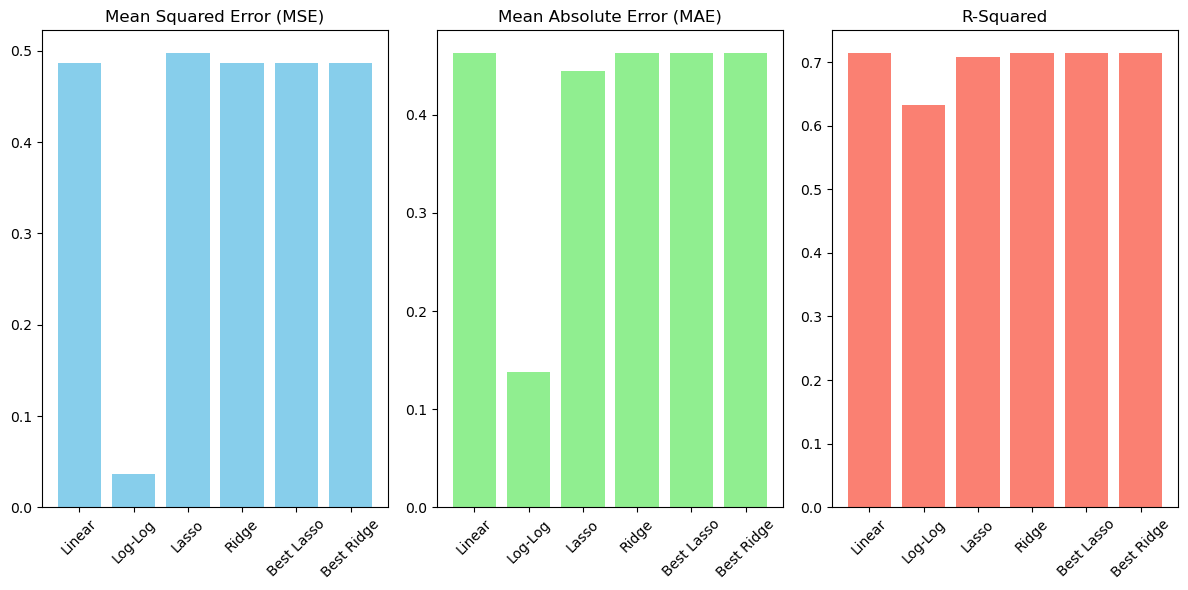

In [77]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear', 'Log-Log', 'Lasso', 'Ridge', 'Best Lasso', 'Best Ridge']
mse_values = [mse_linear, mse_log_log, mse_lasso, mse_ridge, mse_lasso_best, mse_ridge_best]
mae_values = [mae_linear, mae_log_log, mae_lasso, mae_ridge, mae_lasso_best, mae_ridge_best]
r2_values = [r2_linear, r2_log_log, r2_lasso, r2_ridge, r2_lasso_best, r2_ridge_best]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

# Plotting MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

# Plotting R-Squared
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='salmon')
plt.title('R-Squared')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- MSE: Mean Squared Error, which shows how far off predictions are on average (lower is better).
- MAE: Mean Absolute Error, another indicator of prediction accuracy (lower is better).
- R-squared: Proportion of variance explained by the model (closer to 1 is better).

#### Elasticity Coefficients:

Bar plot of Elasticity Coefficients: For both the linear regression and log-log regression models, it’s important to visualize the estimated coefficients (elasticities) for unit_price, promotion_active, and sales_velocity. This plot will allow to easily interpret how price changes affect demand (sales quantity) and assess the influence of promotions and sales trends.

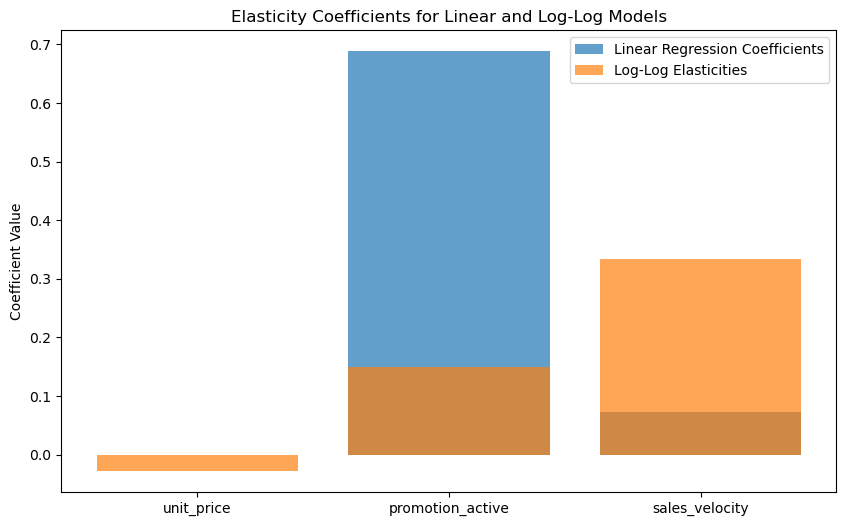

In [78]:
coefficients = linear_model.coef_
log_log_coefficients = log_log_model.coef_

features = ['unit_price', 'promotion_active', 'sales_velocity']

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, label='Linear Regression Coefficients', alpha=0.7)
plt.bar(features, log_log_coefficients, label='Log-Log Elasticities', alpha=0.7)
plt.title('Elasticity Coefficients for Linear and Log-Log Models')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

#### Predict vs Actual Plot

Scatter plot of actual vs predicted values: This plot is essential for each model, comparing the predicted sales quantity to the actual sales quantity. This helps visually assess how well the model is predicting demand based on the input variables.

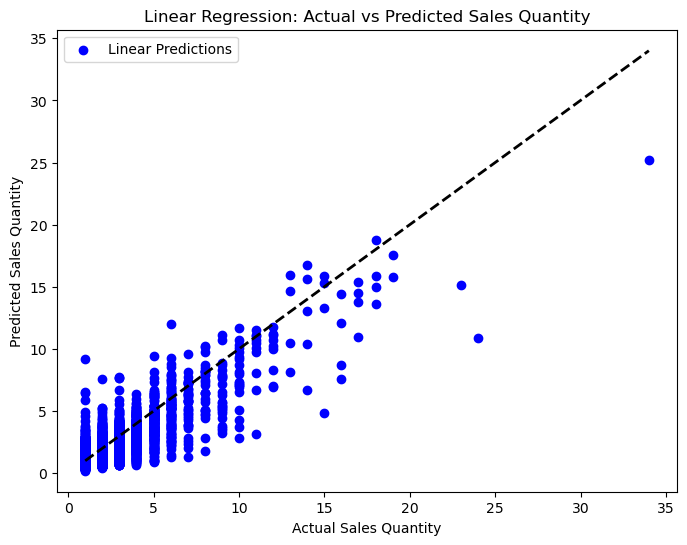

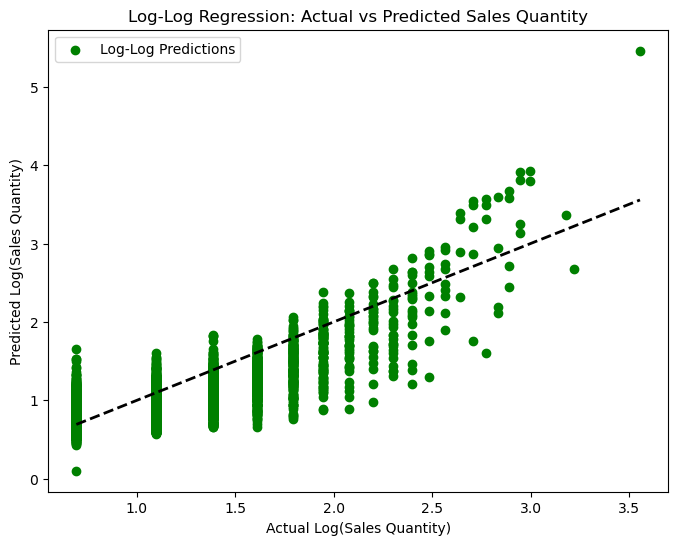

In [79]:
# Plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('Linear Regression: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

# Plot for Log-Log Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_pred_log_log, color='green', label='Log-Log Predictions')
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=2)
plt.xlabel('Actual Log(Sales Quantity)')
plt.ylabel('Predicted Log(Sales Quantity)')
plt.title('Log-Log Regression: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

Residual Plots:

Plot residuals (errors) for each model to assess the fit. Residual plots show the difference between actual and predicted values. For well-fitting models, the residuals should be randomly scattered without patterns.

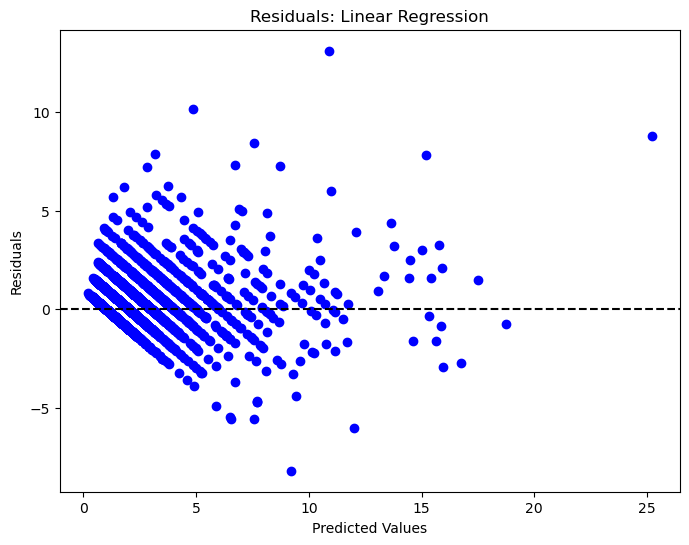

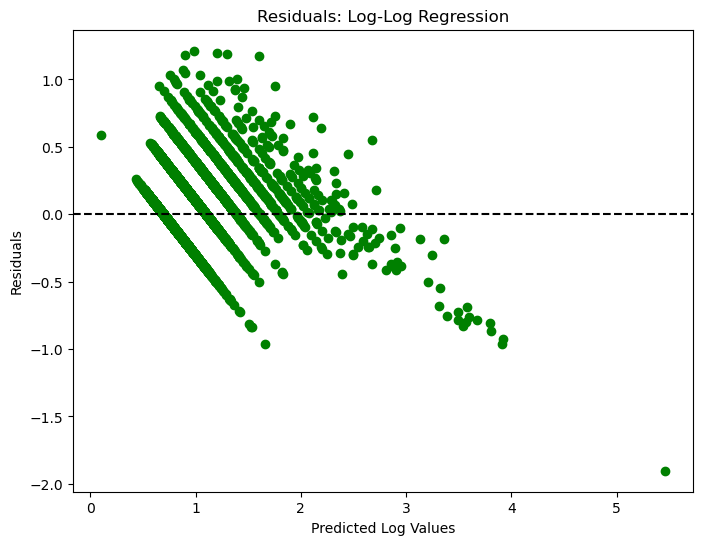

In [80]:
# Residual plot for Linear Regression
residuals_linear = y_test - y_pred_linear
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, residuals_linear, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals: Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot for Log-Log Regression
residuals_log_log = y_test_log - y_pred_log_log
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_log_log, residuals_log_log, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals: Log-Log Regression')
plt.xlabel('Predicted Log Values')
plt.ylabel('Residuals')
plt.show()

------------------------------------

### 2. **Sales Volume / Units Sold Prediction**

- **Objective**: Predict how changes in price, promotions, and other factors affect the number of units sold to optimize pricing and promotions.
- **Relevant Columns**:
    - `qty`: Quantity sold (target variable for prediction).
    - `unit_price`, `unit_price_lag_1`, `unit_price_lag_7`: Current and past product prices.
    - `promotion_active`: To capture promotional effects.
    - `category`, `style`: To segment predictions by product type.
    - `day_of_week`, `month`, `is_weekend`: Time-related features (to capture temporal demand patterns).
    - `sales_velocity`: Rolling sum of sales.
- **Model**:
    - **XGBoost** or **LightGBM**.
- **Why**: These ensemble models are powerful for handling structured data, accounting for non-linear interactions between price, time, and other features.

#### Data Preparation

In [81]:
# Make a copy for sales volume prediction
df_sales_volume = df_amazon_sku.copy()

# Create lagged price features
df_sales_volume['unit_price_lag_1'] = df_sales_volume.groupby('sku')['unit_price'].shift(1)
df_sales_volume['unit_price_lag_7'] = df_sales_volume.groupby('sku')['unit_price'].shift(7)

# Create time-based features
df_sales_volume['day_of_week'] = pd.to_datetime(df_sales_volume['date']).dt.dayofweek
df_sales_volume['month'] = pd.to_datetime(df_sales_volume['date']).dt.month
df_sales_volume['is_weekend'] = df_sales_volume['day_of_week'].isin([5, 6]).astype(int)

# Fill missing values in lagged prices
df_sales_volume.fillna(method='bfill', inplace=True)

# Calculate sales velocity as a 7-day rolling sum of 'qty'
df_sales_volume['sales_velocity'] = df_sales_volume.groupby('sku')['qty'].rolling(window=7, min_periods=1).sum().reset_index(level=0, drop=True)

# View the first few rows of the prepared dataset
df_sales_volume.head()

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\2828151285.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sales_volume.fillna(method='bfill', inplace=True)


sku       date  qty  amount  unit_price  style  \
0    AN201-RED-M 2022-04-07    1   229.0       229.0  AN201   
1    AN201-RED-M 2022-05-01    1   229.0       229.0  AN201   
2   AN201-RED-XL 2022-06-24    1   301.0       301.0  AN201   
3   AN201-RED-XL 2022-06-26    1   301.0       301.0  AN201   
4  AN201-RED-XXL 2022-05-03    1   229.0       229.0  AN201   

                         status fulfilment sales_channel ship_service_level  \
0                       Shipped     Amazon     Amazon.in          Expedited   
1  Shipped - Delivered to Buyer   Merchant     Amazon.in           Standard   
2                       Shipped     Amazon     Amazon.in          Expedited   
3                       Shipped     Amazon     Amazon.in          Expedited   
4  Shipped - Delivered to Buyer   Merchant     Amazon.in           Standard   

   ...    b2b fulfilled_by    short_promotion_ids promotion_active  \
0  ...  False      Unknown  IN Core Free Shipping                1   
1  ...  False    Easy Ship        APLCC Financing                1   
2  ...  False      Unknown  IN Core Free Shipping                1   
3  ...  False      Unknown                   None                0   
4  ...  False    Easy Ship        APLCC Financing                1   

  unit_price_lag_1 unit_price_lag_7  day_of_week month is_weekend  \
0            229.0            229.0            3     4          0   
1            229.0            229.0            6     5          1   
2            301.0            229.0            4     6          0   
3            301.0            229.0            6     6          1   
4            229.0            229.0            1     5          0   

   sales_velocity  
0             1.0  
1             2.0  
2             1.0  
3             2.0  
4             1.0  

[5 rows x 26 columns]

In [82]:
# Convert categorical columns to category dtype and then use numerical codes
df_sales_volume['category'] = df_sales_volume['category'].astype('category')
df_sales_volume['style'] = df_sales_volume['style'].astype('category')

# Convert to numerical codes for XGBoost
df_sales_volume['category'] = df_sales_volume['category'].cat.codes
df_sales_volume['style'] = df_sales_volume['style'].cat.codes

#### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_sales_volume[['unit_price', 'unit_price_lag_1', 'unit_price_lag_7', 'promotion_active', 'category', 'style', 
                     'day_of_week', 'month', 'is_weekend', 'sales_velocity']]
y = df_sales_volume['qty']

# Split the data for training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### XGBoost Model

In [84]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")

XGBoost MSE: 0.3292723742187966
XGBoost MAE: 0.2877212121157902


#### LightGBM Model

In [85]:
!pip install lightgbm

In [86]:
import lightgbm as lgb

# Initialize the LightGBM regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM MAE: {mae_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 66045, number of used features: 10
[LightGBM] [Info] Start training from score 1.410599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

#### Model Comparison

In [87]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# XGBoost Metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# LightGBM Metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print results
print("XGBoost Performance:")
print(f" - MSE: {mse_xgb}")
print(f" - MAE: {mae_xgb}")
print(f" - R-squared: {r2_xgb}")

print("\nLightGBM Performance:")
print(f" - MSE: {mse_lgb}")
print(f" - MAE: {mae_lgb}")
print(f" - R-squared: {r2_lgb}")

# Compare models
print("\nModel Comparison:")
print(f"XGBoost MSE: {mse_xgb} vs LightGBM MSE: {mse_lgb}")
print(f"XGBoost MAE: {mae_xgb} vs LightGBM MAE: {mae_lgb}")
print(f"XGBoost R-squared: {r2_xgb} vs LightGBM R-squared: {r2_lgb}")

XGBoost Performance:
 - MSE: 0.3292723742187966
 - MAE: 0.2877212121157902
 - R-squared: 0.8110064062414535

LightGBM Performance:
 - MSE: 0.3410103127725141
 - MAE: 0.2910313416469568
 - R-squared: 0.804269141398488

Model Comparison:
XGBoost MSE: 0.3292723742187966 vs LightGBM MSE: 0.3410103127725141
XGBoost MAE: 0.2877212121157902 vs LightGBM MAE: 0.2910313416469568
XGBoost R-squared: 0.8110064062414535 vs LightGBM R-squared: 0.804269141398488


Model Performance Comparison:

Bar Chart for MSE and MAE: Create a bar chart to compare the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the XGBoost and LightGBM models. This visual representation will highlight which model provides better predictions in terms of accuracy.

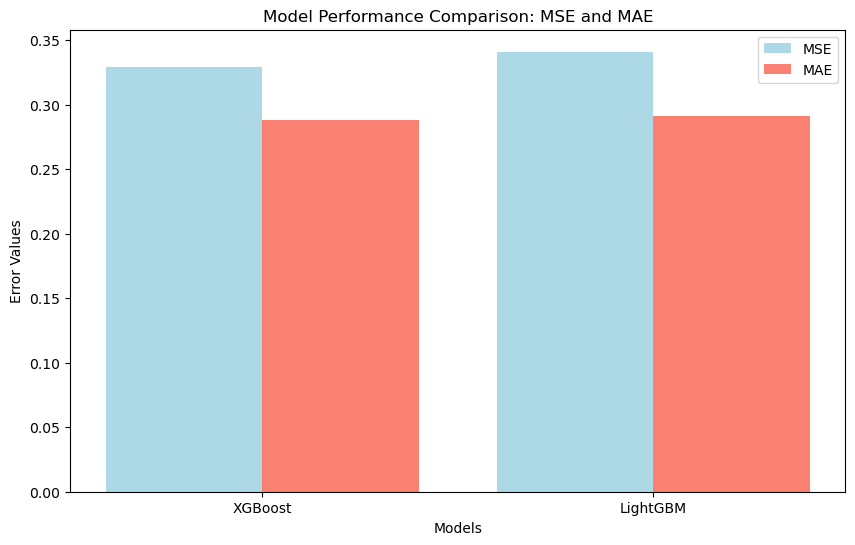

In [88]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'LightGBM']
mse_values = [mse_xgb, mse_lgb]
mae_values = [mae_xgb, mae_lgb]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, width=0.4, label='MSE', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], mae_values, width=0.4, label='MAE', color='salmon', align='center')

plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Model Performance Comparison: MSE and MAE')
plt.xticks([p + 0.2 for p in x], models)
plt.legend()
plt.show()

### Metrics Explained:

1. **MSE (Mean Squared Error)**: Measures the average squared difference between actual and predicted values. A lower MSE means better accuracy.
2. **MAE (Mean Absolute Error)**: Measures the average of absolute differences between actual and predicted values. Lower is better.
3. **R-squared (R²)**: Measures the proportion of variance in the dependent variable that the model explains. Closer to 1 is better.

### Interpretation:

- **Lower MSE and MAE**: The model with the lower values has better performance in terms of error.
- **Higher R-squared**: The model with the higher R-squared explains more variance in the sales data.

Prediction vs Actual Plot:

Scatter Plot for Actual vs Predicted Values: For both models, plot actual sales quantity against predicted sales quantity. This scatter plot will provide insights into how well each model predicts the demand based on the input features.

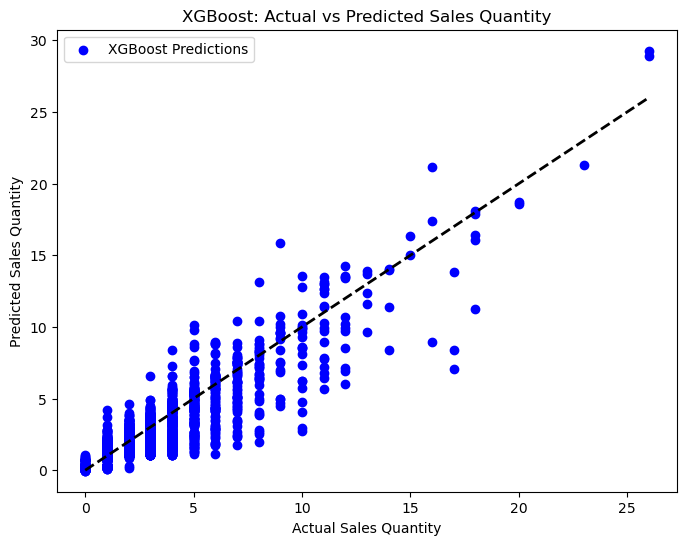

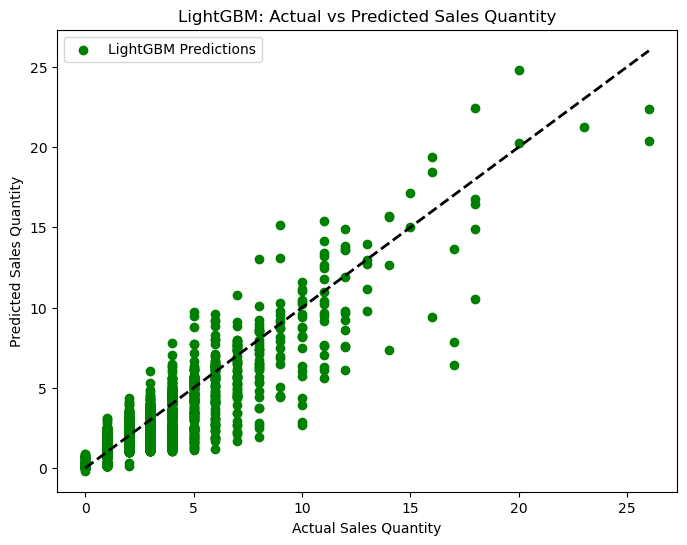

In [89]:
# For XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('XGBoost: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

# For LightGBM
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb, color='green', label='LightGBM Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('LightGBM: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

Feature Importance Plot:

Bar Plot for Feature Importance: Both XGBoost and LightGBM provide a way to assess feature importance. Creating a bar plot for the top features will help understand which variables have the most significant impact on predicting sales volume.

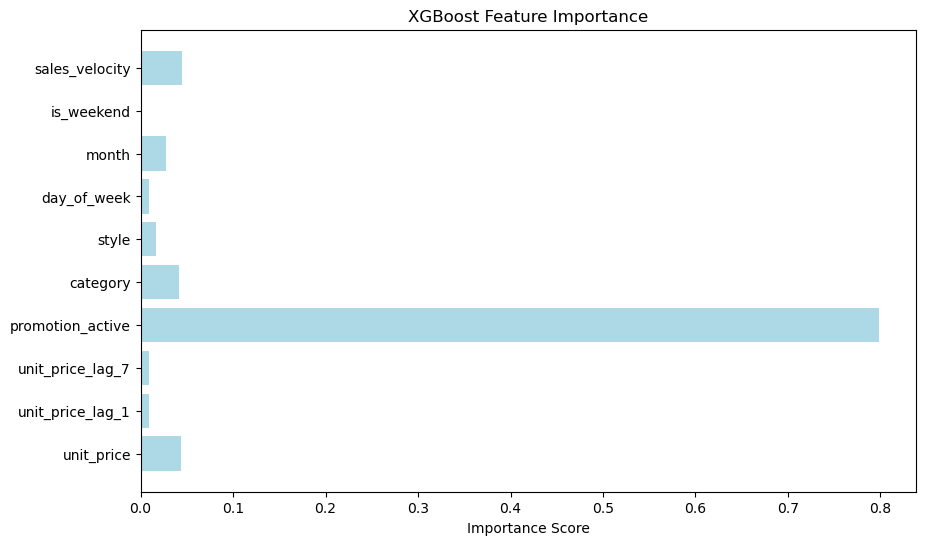

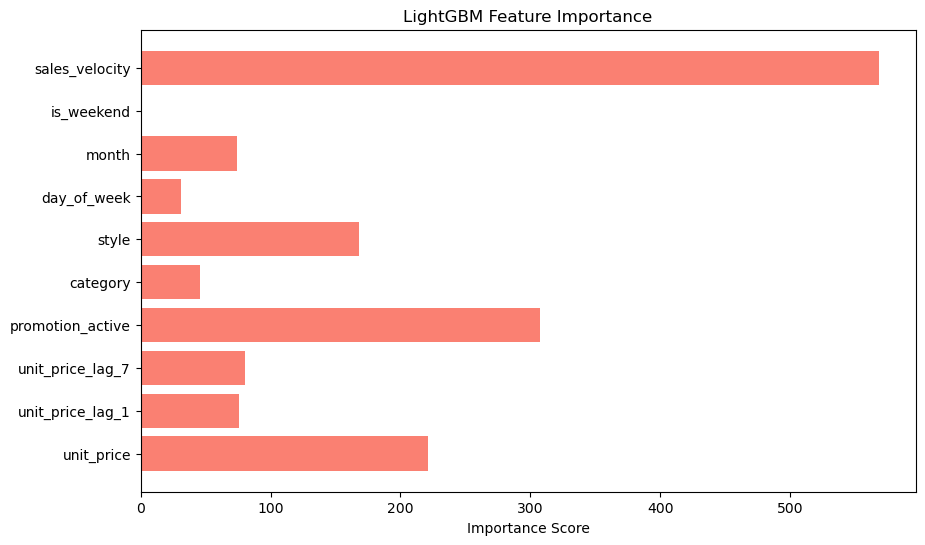

In [90]:
# For XGBoost
xgb_importance = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, xgb_importance, color='lightblue')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.show()

# For LightGBM
lgb_importance = lgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, lgb_importance, color='salmon')
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.show()

Residual Plots:

Residual Plot for XGBoost and LightGBM: Assess the residuals for both models to evaluate how well they fit the data. A well-fitted model should show random scatter of residuals.

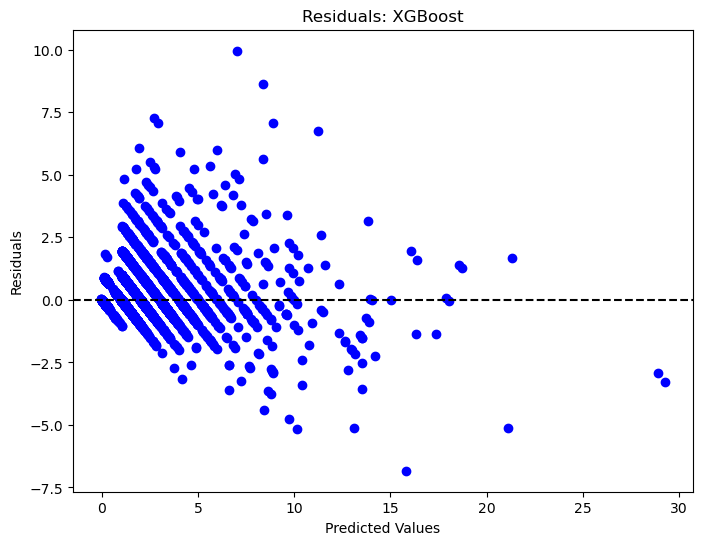

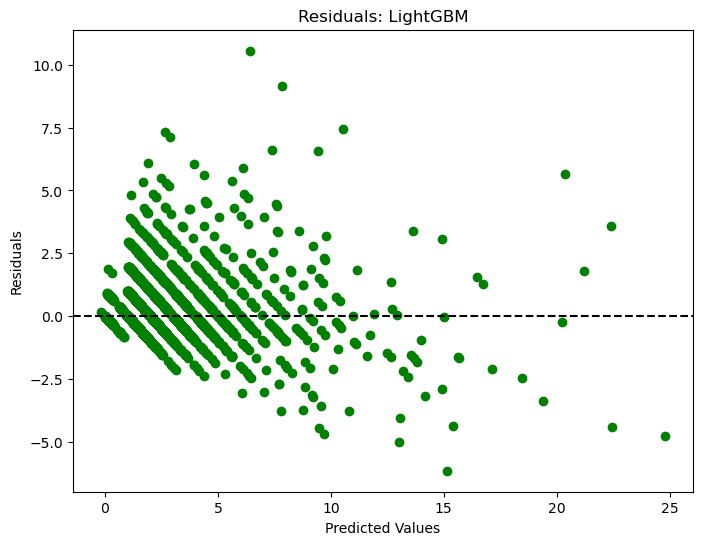

In [91]:
# Residual plot for XGBoost
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xgb, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals: XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot for LightGBM
residuals_lgb = y_test - y_pred_lgb
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lgb, residuals_lgb, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals: LightGBM')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

-----------------------------------

### 3. **Discount Effectiveness / Promotional Uplift**

- **Objective**: Evaluate whether discounts and promotions lead to actual increases in sales or if they merely cannibalize future demand.
- **Relevant Columns**:
    - `qty`: Quantity sold (before, during, and after promotions).
    - `unit_price`: Regular price and discounted price.
    - `promotion_active`, `short_promotion_ids`: Promotional activity.
    - `day_of_week`, `month`: Time-related features (for short-term vs. long-term effects).
- **Model**:
    - **Propensity Score Matching** (for comparison) or **Causal Inference Models**.
- **Why**: These methods will allow us to compare periods with and without promotions to estimate the true causal effect of discounts on sales.

### Models to Use:

1. **Propensity Score Matching (PSM)**:
    - **Objective**: To create a comparison between promoted and non-promoted periods by matching similar days or transactions that did and did not experience promotions.
    - **Why**: PSM helps control for confounding factors, making it easier to isolate the effect of promotions from other influences.
2. **Causal Inference (Difference-in-Differences or Regression Discontinuity Models)**:
    - **Objective**: To estimate the causal effect of promotions by comparing sales before, during, and after promotions.
    - **Why**: Causal inference methods allow you to measure the "true" effect of promotions by comparing sales during promotional periods with counterfactual scenarios (i.e., what would have happened without the promotion).

#### Data Preparation

In [92]:
# Make a copy for analysis
df_discount_effect = df_amazon.copy()

# Create time-based features
df_discount_effect['day_of_week'] = pd.to_datetime(df_discount_effect['date']).dt.dayofweek
df_discount_effect['month'] = pd.to_datetime(df_discount_effect['date']).dt.month

# Create a flag for post-promotion periods to measure cannibalization
df_discount_effect['is_post_promotion'] = df_discount_effect.groupby('style')['promotion_active'].shift(-7).fillna(0)

# Fill any missing values if required
df_discount_effect.fillna(method='bfill', inplace=True)

# View the first few rows
df_discount_effect.head()

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\2660197040.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_discount_effect.fillna(method='bfill', inplace=True)


index             order_id       date                        status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  fulfilment sales_channel ship_service_level    style              sku  \
0   Merchant     Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant     Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon     Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        category  ...    short_promotion_ids unit_price_lag_1  \
0            Set  ...                   None            399.0   
1          kurta  ...        APLCC Financing            399.0   
2          kurta  ...  IN Core Free Shipping            399.0   
3  Western Dress  ...                   None            399.0   
4            Top  ...                   None            399.0   

  unit_price_lag_7  day_of_week month  is_weekend cumulative_sales  \
0            399.0            5     4           1                0   
1            399.0            5     4           1                1   
2            399.0            5     4           1                1   
3            399.0            5     4           1                0   
4            399.0            5     4           1                1   

  promotion_active  sales_to_price_ratio is_post_promotion  
0                0                   0.0               1.0  
1                1                   1.0               0.0  
2                1                   1.0               1.0  
3                0                   0.0               1.0  
4                0                   1.0               0.0  

[5 rows x 35 columns]

#### Propensity Score Matching (PSM)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Define the treatment variable (promotion_active: 1 if promotion, 0 otherwise)
df_discount_effect['promotion_active'] = df_discount_effect['promotion_active'].astype(int)

# Define the variables for matching (excluding outcome variables like qty)
X_psm = df_discount_effect[['unit_price', 'day_of_week', 'month', 'is_post_promotion']]

# Define the treatment variable
treatment = df_discount_effect['promotion_active']

# Logistic regression for propensity scores
logit_model = LogisticRegression()
logit_model.fit(X_psm, treatment)
df_discount_effect['propensity_score'] = logit_model.predict_proba(X_psm)[:, 1]

# Nearest neighbor matching based on propensity scores
nbrs = NearestNeighbors(n_neighbors=1).fit(df_discount_effect[['propensity_score']])
_, indices = nbrs.kneighbors(df_discount_effect[['propensity_score']])

# Match each promoted transaction with its nearest non-promoted counterpart
matched_data = df_discount_effect.iloc[indices.flatten()]

# Compare sales quantities (qty) between matched promotion and non-promotion periods
promo_effect = matched_data.groupby('promotion_active')['qty'].mean()
print("Average Sales during Promotion:", promo_effect[1])
print("Average Sales without Promotion:", promo_effect[0])

# Calculate the uplift
uplift = promo_effect[1] - promo_effect[0]
print("Promotional Uplift:", uplift)

# Calculate MSE and MAE for Propensity Score Matching
psm_diff = promo_effect[1] - promo_effect[0]  # Sales uplift
mse_psm = (promo_effect[1] - promo_effect[0]) ** 2  # Simplified MSE using sales difference
mae_psm = abs(promo_effect[1] - promo_effect[0])  # Simplified MAE

print("Propensity Score Matching Sales Uplift:", psm_diff)
print("Propensity Score Matching MSE:", mse_psm)
print("Propensity Score Matching MAE:", mae_psm)

Average Sales during Promotion: 0.9948473282442748
Average Sales without Promotion: 0.7172527778884066
Promotional Uplift: 0.2775945503558682
Propensity Score Matching Sales Uplift: 0.2775945503558682
Propensity Score Matching MSE: 0.07705873438727666
Propensity Score Matching MAE: 0.2775945503558682


#### Causal Inference (Difference-in-Differences or Regression Discontinuity)

In [94]:
import statsmodels.api as sm

# Create a binary flag for periods during and after the promotion (1 during promotion, 0 otherwise)
df_discount_effect['treatment_period'] = df_discount_effect['promotion_active']

# Difference-in-Differences Model
df_discount_effect['post_promotion'] = df_discount_effect['is_post_promotion']

# Interaction term for DiD
df_discount_effect['interaction'] = df_discount_effect['treatment_period'] * df_discount_effect['post_promotion']

# Define the regression model: qty ~ treatment_period + post_promotion + interaction
X_did = df_discount_effect[['treatment_period', 'post_promotion', 'interaction']]
X_did = sm.add_constant(X_did)
y_did = df_discount_effect['qty']

did_model = sm.OLS(y_did, X_did).fit()

# Output the summary of the model
print(did_model.summary())

# Interpretation: The coefficient of the interaction term represents the causal effect of the promotion

# Predict on the test set (we're using the same set for demonstration)
y_pred_did = did_model.predict(X_did)

# Calculate MSE and MAE for Difference-in-Differences
mse_did = mean_squared_error(y_did, y_pred_did)
mae_did = mean_absolute_error(y_did, y_pred_did)

print("Causal Inference (Difference-in-Differences) MSE:", mse_did)
print("Causal Inference (Difference-in-Differences) MAE:", mae_did)
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    qty   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8495.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:01:38   Log-Likelihood:                -19502.
No. Observations:              128818   AIC:                         3.901e+04
Df Residuals:                  128814   BIC:                         3.905e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7875      0.002  

#### Data Preparation

In [95]:
# Convert categorical columns (if necessary)
df_discount_effect['category'] = df_discount_effect['category'].astype('category').cat.codes
df_discount_effect['style'] = df_discount_effect['style'].astype('category').cat.codes

In [96]:
# Define features and target
X = df_discount_effect[['unit_price', 'promotion_active', 'day_of_week', 'month', 'is_post_promotion', 'category', 'style']]
y = df_discount_effect['qty']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### XGBoost Model

In [97]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the XGBoost regressor
xgb_model_2 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, enable_categorical=True, random_state=42)

# Train the model
xgb_model_2.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb_2 = xgb_model_2.predict(X_test)

# Evaluate the model
mse_xgb_2 = mean_squared_error(y_test, y_pred_xgb_2)
mae_xgb_2 = mean_absolute_error(y_test, y_pred_xgb_2)
print(f"XGBoost MSE: {mse_xgb_2}")
print(f"XGBoost MAE: {mae_xgb_2}")

XGBoost MSE: 0.020194784245536803
XGBoost MAE: 0.033753823057659615


#### LightGBM Model

In [98]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the LightGBM regressor
lgb_model_2 = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
lgb_model_2.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb_2 = lgb_model_2.predict(X_test)

# Evaluate the model
mse_lgb_2 = mean_squared_error(y_test, y_pred_lgb_2)
mae_lgb_2 = mean_absolute_error(y_test, y_pred_lgb_2)
print(f"LightGBM MSE: {mse_lgb_2}")
print(f"LightGBM MAE: {mae_lgb_2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 103054, number of used features: 7
[LightGBM] [Info] Start training from score 0.904341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

#### Model Comparison

In [100]:
# XGBoost Metrics
mse_xgb_2 = mean_squared_error(y_test, y_pred_xgb_2)
mae_xgb_2 = mean_absolute_error(y_test, y_pred_xgb_2)
r2_xgb_2 = r2_score(y_test, y_pred_xgb_2)

# LightGBM Metrics
mse_lgb_2 = mean_squared_error(y_test, y_pred_lgb_2)
mae_lgb_2 = mean_absolute_error(y_test, y_pred_lgb_2)
r2_lgb_2 = r2_score(y_test, y_pred_lgb_2)

# Difference-in-Differences (Causal Inference) Metrics
mse_did = mean_squared_error(y_did, y_pred_did)
mae_did = mean_absolute_error(y_did, y_pred_did)

# Propensity Score Matching (PSM) Metrics
mse_psm = (promo_effect[1] - promo_effect[0]) ** 2  # Simplified MSE using sales difference
mae_psm = abs(promo_effect[1] - promo_effect[0])  # Simplified MAE

# Print results
print("XGBoost Performance:")
print(f" - MSE: {mse_xgb_2}")
print(f" - MAE: {mae_xgb_2}")
print(f" - R-squared: {r2_xgb_2}")

print("\nLightGBM Performance:")
print(f" - MSE: {mse_lgb_2}")
print(f" - MAE: {mae_lgb_2}")
print(f" - R-squared: {r2_lgb_2}")

print("\nCausal Inference (Difference-in-Differences) Performance:")
print(f" - MSE: {mse_did}")
print(f" - MAE: {mae_did}")

print("\nPropensity Score Matching Performance:")
print(f" - Sales Uplift: {psm_diff}")
print(f" - MSE: {mse_psm}")
print(f" - MAE: {mae_psm}")

# Compare all models
print("\nModel Comparison:")
print(f"XGBoost MSE: {mse_xgb} vs LightGBM MSE: {mse_lgb} vs DiD MSE: {mse_did} vs PSM MSE: {mse_psm}")
print(f"XGBoost MAE: {mae_xgb} vs LightGBM MAE: {mae_lgb} vs DiD MAE: {mae_did} vs PSM MAE: {mae_psm}")

XGBoost Performance:
 - MSE: 0.020194784245536803
 - MAE: 0.033753823057659615
 - R-squared: 0.7938798021901873

LightGBM Performance:
 - MSE: 0.01941646075400457
 - MAE: 0.03231708307213963
 - R-squared: 0.8018238430912483

Causal Inference (Difference-in-Differences) Performance:
 - MSE: 0.07925453722280655
 - MAE: 0.14917655484224326

Propensity Score Matching Performance:
 - Sales Uplift: 0.2775945503558682
 - MSE: 0.07705873438727666
 - MAE: 0.2775945503558682

Model Comparison:
XGBoost MSE: 0.3292723742187966 vs LightGBM MSE: 0.3410103127725141 vs DiD MSE: 0.07925453722280655 vs PSM MSE: 0.07705873438727666
XGBoost MAE: 0.2877212121157902 vs LightGBM MAE: 0.2910313416469568 vs DiD MAE: 0.14917655484224326 vs PSM MAE: 0.2775945503558682


 Model Performance Comparison:

Bar Chart for MSE and MAE: Create a bar chart to compare the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the different models used (e.g., Propensity Score Matching, Causal Inference Models). This visual representation will highlight which model provides better predictions in terms of accuracy.

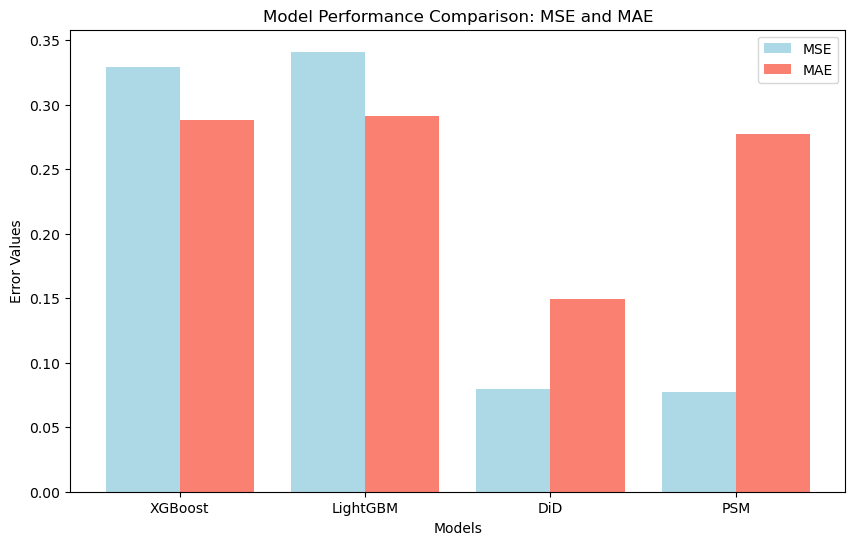

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their respective MSE and MAE values
models = ['XGBoost', 'LightGBM', 'DiD', 'PSM']
mse_values = [mse_xgb, mse_lgb, mse_did, mse_psm]
mae_values = [mae_xgb, mae_lgb, mae_did, mae_psm]

x = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(10, 6))

# Plot MSE values
plt.bar(x - 0.2, mse_values, width=0.4, label='MSE', color='lightblue', align='center')

# Plot MAE values
plt.bar(x + 0.2, mae_values, width=0.4, label='MAE', color='salmon', align='center')

# Add labels and titles
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Model Performance Comparison: MSE and MAE')

# Set x-ticks
plt.xticks(x, models)

# Add a legend
plt.legend()

# Show the plot
plt.show()



Prediction vs Actual Plot:

Scatter Plot for Actual vs Predicted Values: For both models, plot actual sales quantity against predicted sales quantity. This scatter plot will provide insights into how well each model predicts the demand based on the input features.

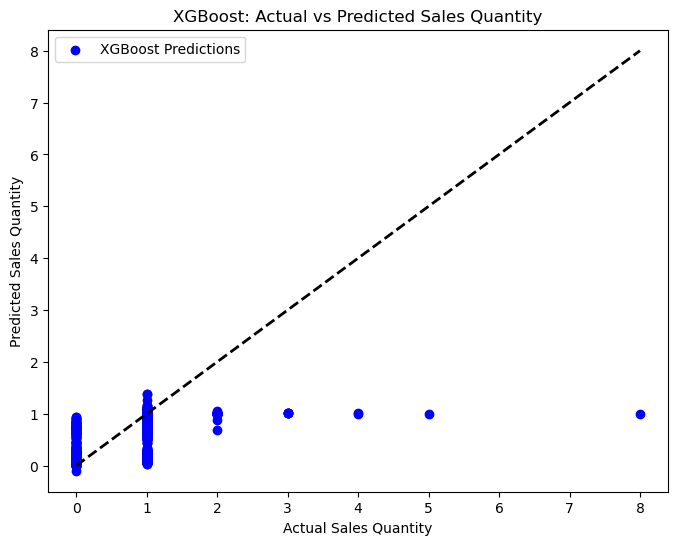

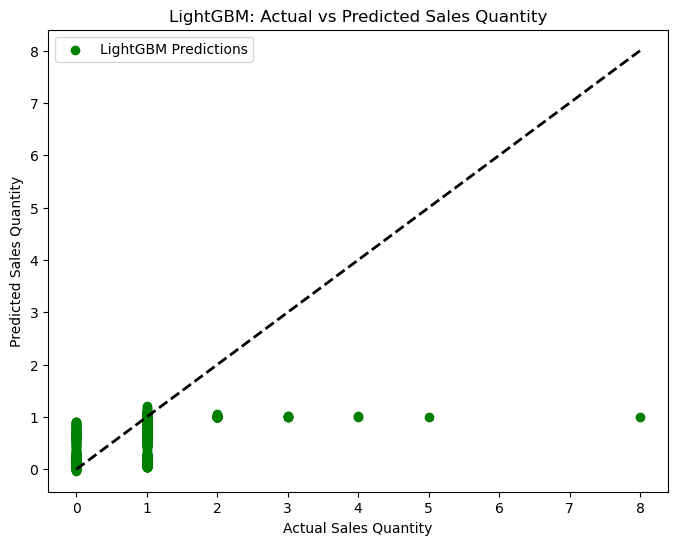

In [103]:
# For XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_2, color='blue', label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('XGBoost: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

# For LightGBM
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb_2, color='green', label='LightGBM Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('LightGBM: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

Bar Chart for Average Sales During Promotion and Without Promotion
You can compare the average sales with and without promotion using a bar chart.

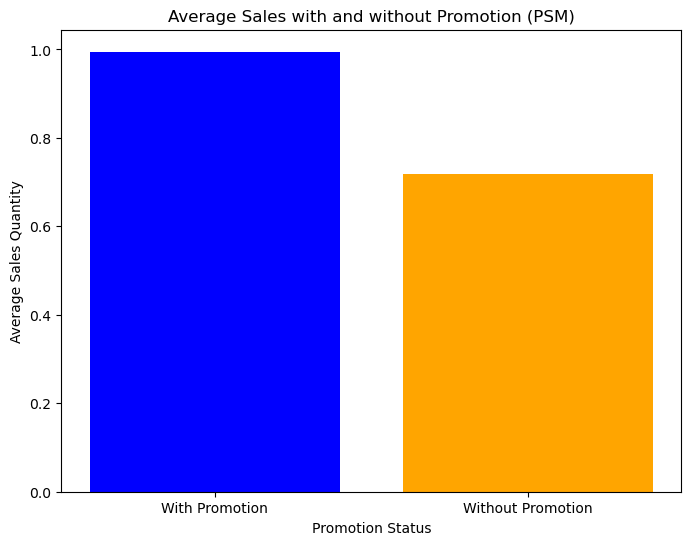

In [104]:
import matplotlib.pyplot as plt

# Values from promo_effect
promo_sales = promo_effect[1]  # Sales during promotion
non_promo_sales = promo_effect[0]  # Sales without promotion

# Create the bar chart
labels = ['With Promotion', 'Without Promotion']
sales_values = [promo_sales, non_promo_sales]

plt.figure(figsize=(8, 6))
plt.bar(labels, sales_values, color=['blue', 'orange'])

plt.xlabel('Promotion Status')
plt.ylabel('Average Sales Quantity')
plt.title('Average Sales with and without Promotion (PSM)')
plt.show()

Bar Chart for Promotional Uplift
You can create a bar chart to display the promotional uplift that you calculated from PSM.

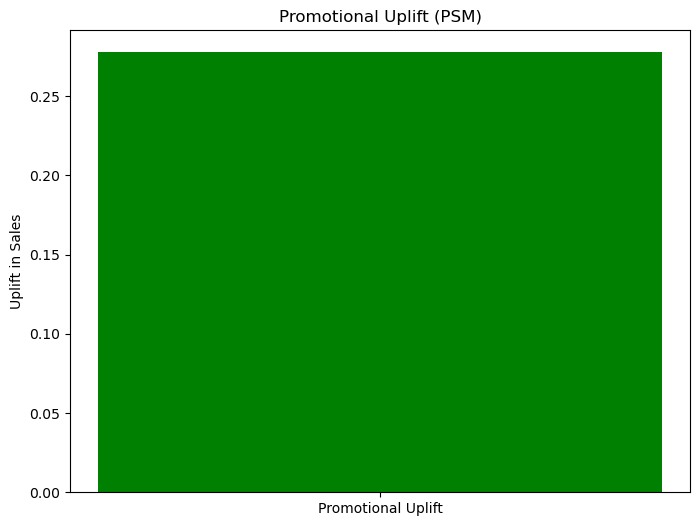

In [105]:
# Bar chart to show the promotional uplift
uplift_value = [psm_diff]  # Promotional Uplift

plt.figure(figsize=(8, 6))
plt.bar(['Promotional Uplift'], uplift_value, color='green')

plt.ylabel('Uplift in Sales')
plt.title('Promotional Uplift (PSM)')
plt.show()

visualize the estimated causal effects (coefficients from your regression) or compare the sales before and after the promotion. Below are two ways to visualize the results that make more sense for causal inference:

Visualize the Coefficients of the Causal Model
You can plot the coefficients from the Difference-in-Differences model to show the estimated effect of the promotion, post-promotion, and their interaction.

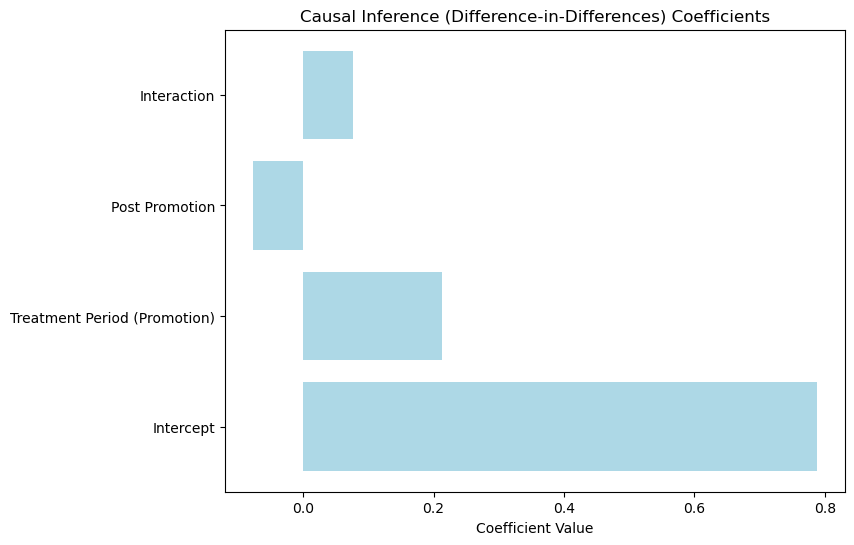

In [106]:
import matplotlib.pyplot as plt

# Extract the coefficients
coefficients = did_model.params
features = ['Intercept', 'Treatment Period (Promotion)', 'Post Promotion', 'Interaction']

# Create a bar plot for the coefficients
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Causal Inference (Difference-in-Differences) Coefficients')
plt.show()

Compare Sales Before, During, and After the Promotion
You can create a bar plot to compare average sales during different periods (pre-promotion, during promotion, and post-promotion) to visualize the sales impact over time.

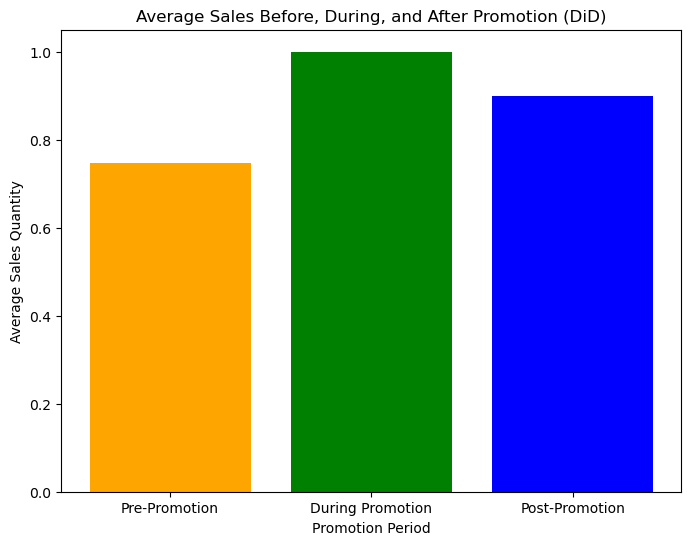

In [107]:
# Calculate average sales during each period
avg_sales_pre_promotion = df_discount_effect[df_discount_effect['treatment_period'] == 0]['qty'].mean()
avg_sales_during_promotion = df_discount_effect[df_discount_effect['treatment_period'] == 1]['qty'].mean()
avg_sales_post_promotion = df_discount_effect[df_discount_effect['post_promotion'] == 1]['qty'].mean()

# Create a bar plot to compare sales during different periods
labels = ['Pre-Promotion', 'During Promotion', 'Post-Promotion']
sales_values = [avg_sales_pre_promotion, avg_sales_during_promotion, avg_sales_post_promotion]

plt.figure(figsize=(8, 6))
plt.bar(labels, sales_values, color=['orange', 'green', 'blue'])

plt.xlabel('Promotion Period')
plt.ylabel('Average Sales Quantity')
plt.title('Average Sales Before, During, and After Promotion (DiD)')
plt.show()

Residual Plots:

Residual Plot for Each Model: Assess the residuals for both models to evaluate how well they fit the data. A well-fitted model should show random scatter of residuals.

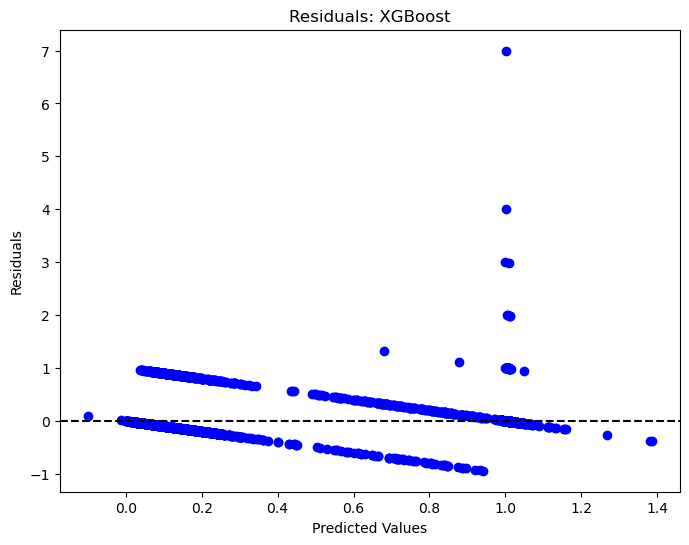

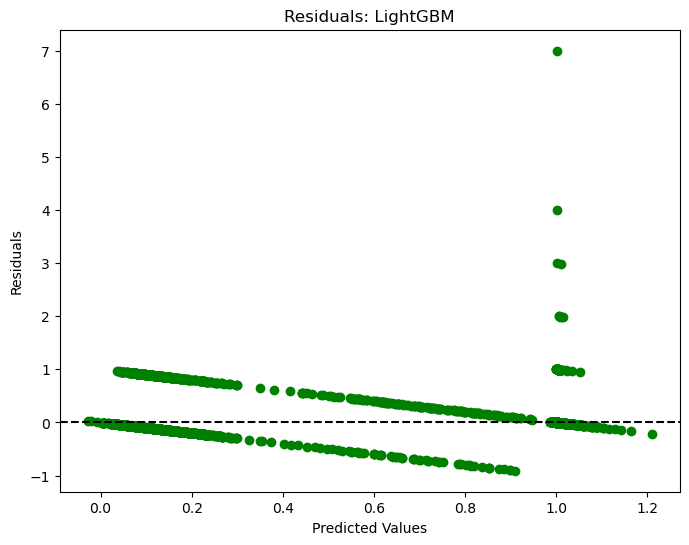

In [111]:
# Residual Plot for XGBoost
residuals_xgb = y_test - y_pred_xgb_2
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb_2, residuals_xgb, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals: XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Residual Plot for LightGBM
residuals_lgb = y_test - y_pred_lgb_2
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lgb_2, residuals_lgb, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals: LightGBM')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

-------------

### 4. **Demand Forecasting**

- **Objective**: Predict future demand for products to optimize inventory levels and inform dynamic pricing strategies.
- **Relevant Columns**:
    - `qty`: Quantity sold (target for forecasting).
    - `date`: Time feature (to structure the series).
    - `unit_price`, `promotion_active`: Price and promotions to account for their effect on demand.
    - `sales_velocity`: Sales trends over time.
    - `day_of_week`, `month`, `is_weekend`: To model seasonality and time-based patterns.
- **Model**:
    - **ARIMA**, **SARIMA**, **Prophet**, or **LSTM**.
- **Why**: Time-series models like ARIMA/SARIMA can handle seasonal demand fluctuations, while Prophet and LSTM can handle more complex non-linear patterns, including effects from promotions and price changes.

#### Data Preparation

In [112]:
# Make a copy of the original dataframe
df_demand_forecast = df_amazon_sku.copy()

# Ensure the 'date' column is in datetime format
df_demand_forecast['date'] = pd.to_datetime(df_demand_forecast['date'])

# Get the minimum and maximum date range in the dataset
min_date = df_demand_forecast['date'].min()
max_date = df_demand_forecast['date'].max()

# Create a date range and ensure every SKU has entries for every date in this range
all_skus = df_demand_forecast['sku'].unique()
date_range = pd.date_range(start=min_date, end=max_date)

# Create a new DataFrame with all combinations of SKUs and dates
full_index = pd.MultiIndex.from_product([all_skus, date_range], names=['sku', 'date'])

# Reindex the original DataFrame with the new full index to fill missing dates
df_demand_forecast = df_demand_forecast.set_index(['sku', 'date']).reindex(full_index).reset_index()

# Handle missing values
df_demand_forecast['qty'].fillna(0, inplace=True)  # Fill missing 'qty' values with 0

# Fill non-numeric columns with placeholders or forward-fill method for the most recent known value
df_demand_forecast['amount'].fillna(0, inplace=True)  # Fill 'amount' with 0
df_demand_forecast['unit_price'].fillna(method='ffill', inplace=True)  # Forward-fill unit price
df_demand_forecast['status'].fillna('Unknown', inplace=True)  # Replace missing status with 'Unknown'
df_demand_forecast['fulfilment'].fillna('Unknown', inplace=True)
df_demand_forecast['sales_channel'].fillna('Unknown', inplace=True)
df_demand_forecast['ship_service_level'].fillna('Unknown', inplace=True)
df_demand_forecast['style'].fillna('Unknown', inplace=True)
df_demand_forecast['ship_state'].fillna('Unknown', inplace=True)
df_demand_forecast['ship_region'].fillna('Unknown', inplace=True)  # This is the additional column you requested
df_demand_forecast['ship_country'].fillna('Unknown', inplace=True)
df_demand_forecast['b2b'].fillna(False, inplace=True)  # Replace missing B2B with False
df_demand_forecast['fulfilled_by'].fillna('Unknown', inplace=True)
df_demand_forecast['short_promotion_ids'].fillna('Unknown', inplace=True)
df_demand_forecast['promotion_active'].fillna(0, inplace=True)  # Fill missing promotions with 0

# Create time-based features for seasonality analysis
df_demand_forecast['day_of_week'] = df_demand_forecast['date'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
df_demand_forecast['month'] = df_demand_forecast['date'].dt.month  # Extract month
df_demand_forecast['is_weekend'] = df_demand_forecast['day_of_week'].isin([5, 6]).astype(int)  # Create a weekend flag

# Sort the data by SKU and date
df_demand_forecast = df_demand_forecast.sort_values(by=['sku', 'date']).reset_index(drop=True)

# Ensure all missing values are handled before modeling
df_demand_forecast.info()  # Check if there are any missing values left

# Final dataset preview
df_demand_forecast.head()

C:\Users\Clara\AppData\Local\Temp\ipykernel_15696\1425435633.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_demand_forecast['unit_price'].fillna(method='ffill', inplace=True)  # Forward-fill unit price


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653835 entries, 0 to 653834
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   sku                  653835 non-null  object        
 1   date                 653835 non-null  datetime64[ns]
 2   qty                  653835 non-null  float64       
 3   amount               653835 non-null  float64       
 4   unit_price           653828 non-null  float64       
 5   style                653835 non-null  object        
 6   status               653835 non-null  object        
 7   fulfilment           653835 non-null  object        
 8   sales_channel        653835 non-null  object        
 9   ship_service_level   653835 non-null  object        
 10  category             82557 non-null   object        
 11  size                 82557 non-null   object        
 12  currency             82557 non-null   object        
 13  ship_state    

sku       date  qty  amount  unit_price    style   status  \
0  AN201-RED-M 2022-03-31  0.0     0.0         NaN  Unknown  Unknown   
1  AN201-RED-M 2022-04-01  0.0     0.0         NaN  Unknown  Unknown   
2  AN201-RED-M 2022-04-02  0.0     0.0         NaN  Unknown  Unknown   
3  AN201-RED-M 2022-04-03  0.0     0.0         NaN  Unknown  Unknown   
4  AN201-RED-M 2022-04-04  0.0     0.0         NaN  Unknown  Unknown   

  fulfilment sales_channel ship_service_level  ... ship_state ship_region  \
0    Unknown       Unknown            Unknown  ...    Unknown     Unknown   
1    Unknown       Unknown            Unknown  ...    Unknown     Unknown   
2    Unknown       Unknown            Unknown  ...    Unknown     Unknown   
3    Unknown       Unknown            Unknown  ...    Unknown     Unknown   
4    Unknown       Unknown            Unknown  ...    Unknown     Unknown   

  ship_country    b2b fulfilled_by short_promotion_ids  promotion_active  \
0      Unknown  False      Unknown             Unknown               0.0   
1      Unknown  False      Unknown             Unknown               0.0   
2      Unknown  False      Unknown             Unknown               0.0   
3      Unknown  False      Unknown             Unknown               0.0   
4      Unknown  False      Unknown             Unknown               0.0   

  day_of_week month  is_weekend  
0           3     3           0  
1           4     4           0  
2           5     4           1  
3           6     4           1  
4           0     4           0  

[5 rows x 23 columns]

In [113]:
# Check shape
df_demand_forecast.shape

(653835, 23)

In [114]:
# Group by 'sku' and sum the 'qty' column to get the total sales for each SKU
sku_sales = df_amazon.groupby('sku')['qty'].sum().reset_index()

# Sort the results in descending order to find the SKUs with the most sales
sku_sales = sku_sales.sort_values(by='qty', ascending=False)

# Display the top SKUs
print(sku_sales.head(10))

                  sku  qty
4538     JNE3797-KR-L  661
4539     JNE3797-KR-M  560
4540     JNE3797-KR-S  503
2737     JNE3405-KR-L  480
1342      J0230-SKD-M  468
1343      J0230-SKD-S  421
4541    JNE3797-KR-XL  415
2739     JNE3405-KR-S  399
4542    JNE3797-KR-XS  386
6295  SET268-KR-NP-XL  371


#### SARIMA Model

In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Select a specific SKU to forecast for (or loop over multiple SKUs)
sku_df = df_demand_forecast[df_demand_forecast['sku'] == 'JNE3797-KR-L']

# Define the target and the exogenous variables (unit_price and promotion_active)
y = sku_df['qty']
X = sku_df[['unit_price', 'promotion_active']]

# Fit SARIMA model (seasonal ARIMA) - adjust (p, d, q, P, D, Q, s) based on ACF/PACF plots
sarima_model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), trend='c')
sarima_result = sarima_model.fit()

# Forecast for the next 30 days
forecast_sarima = sarima_result.get_forecast(steps=30, exog=X.iloc[-30:])
forecast_sarima_df = forecast_sarima.conf_int()
forecast_sarima_df['forecast'] = forecast_sarima.predicted_mean

# View the forecasted values
forecast_sarima_df.head()

C:\Users\Clara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Clara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Clara\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Clara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Clara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available

lower qty  upper qty   forecast
91  -0.809350   3.127734   1.159192
92   2.827797   7.137095   4.982446
93   9.770092  14.497520  12.133806
94  13.903973  19.009057  16.456515
95  23.364384  28.821572  26.092978

#### Prophet Model

In [116]:
!pip install prophet


In [117]:
from prophet import Prophet

# Prepare the data for Prophet, keeping date as 'ds' and quantity as 'y'
prophet_df = sku_df[['date', 'qty', 'unit_price', 'promotion_active']]
prophet_df.columns = ['ds', 'y', 'unit_price', 'promotion_active']  # ds and y are mandatory for Prophet

# Initialize the Prophet model and add regressors
prophet_model = Prophet()
prophet_model.add_regressor('unit_price')
prophet_model.add_regressor('promotion_active')

# Fit the model
prophet_model.fit(prophet_df)

# Create a future dataframe for the next 30 days
future = prophet_model.make_future_dataframe(periods=30)

# Ensure that unit_price and promotion_active match the size of 'future'
# Limit the future dataframe to 30 days if necessary, so it matches the number of predictions
future = future.iloc[-30:]  # Truncate to the last 30 rows

# Assign the correct number of values for 'unit_price' and 'promotion_active'
future['unit_price'] = sku_df['unit_price'].iloc[-30:].values
future['promotion_active'] = sku_df['promotion_active'].iloc[-30:].values

# Forecast
forecast_prophet = prophet_model.predict(future)

# View the forecasted values
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

22:17:06 - cmdstanpy - INFO - Chain [1] start processing
22:17:07 - cmdstanpy - INFO - Chain [1] done processing


ds       yhat  yhat_lower  yhat_upper
0  2022-06-30   1.577667    0.577913    2.658748
1  2022-07-01   2.737942    1.665678    3.800190
2  2022-07-02  12.160516   11.060792   13.156932
3  2022-07-03  14.227709   13.222971   15.239896
4  2022-07-04  24.969710   23.888116   26.018708
5  2022-07-05  17.462628   16.417857   18.498563
6  2022-07-06  23.148624   22.190411   24.218180
7  2022-07-07  14.658220   13.631605   15.747724
8  2022-07-08  23.186769   22.170917   24.312496
9  2022-07-09  26.258399   25.246093   27.319642
10 2022-07-10  13.357492   12.411876   14.315824
11 2022-07-11   1.651690    0.648454    2.665208
12 2022-07-12  17.638910   16.571127   18.617857
13 2022-07-13  11.523476   10.536469   12.567008
14 2022-07-14  11.590310   10.520508   12.679693
15 2022-07-15   2.920341    1.882164    4.015329
16 2022-07-16   6.129411    5.052274    7.074174
17 2022-07-17   3.910059    2.931919    4.957200
18 2022-07-18   3.901087    2.838506    4.957792
19 2022-07-19   5.984632    4.897460    7.068259
20 2022-07-20   8.491042    7.365859    9.538681
21 2022-07-21   4.261473    3.253673    5.308342
22 2022-07-22   6.405124    5.343626    7.442631
23 2022-07-23   8.406389    7.326251    9.411606
24 2022-07-24  23.316764   22.221664   24.357281
25 2022-07-25  16.933904   15.901749   17.997406
26 2022-07-26  31.872266   30.866712   32.860308
27 2022-07-27   5.400104    4.360172    6.450225
28 2022-07-28  10.880670    9.873330   11.855536
29 2022-07-29   8.675043    7.662420    9.741230

#### LSTM Model

In [118]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sku_df[['qty', 'unit_price', 'promotion_active']])

# Prepare the data for LSTM (input features and target)
X_lstm = []
y_lstm = []

# Define the window size (e.g., use the last 7 days to predict the next day)
window_size = 7

for i in range(window_size, len(scaled_data)):
    X_lstm.append(scaled_data[i-window_size:i, 1:])  # Use unit_price, promotion_active as features
    y_lstm.append(scaled_data[i, 0])  # Target: qty

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape for LSTM (samples, time steps, features)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 2))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 2)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

# Make predictions
predicted_qty = lstm_model.predict(X_lstm[-30:])

# Inverse the scaling
predicted_qty = scaler.inverse_transform(np.concatenate((predicted_qty, scaled_data[-30:, 1:]), axis=1))[:, 0]

# View the predicted values
predicted_qty




Epoch 1/10

3/3 [==============================] - 3s 8ms/step - loss: 0.0882
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.0565
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0551
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.0450
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0456
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0461
Epoch 9/10
3/3 [==============================] - 0s 8ms/step - loss: 0.0460
Epoch 10/10
1/1 [==============================] - 1s 653ms/step


array([ 5.39738339,  5.082205  ,  5.03226808,  5.36333165,  5.93234655,
        6.71631846,  7.49462309,  8.56090313,  9.47779393, 10.20189625,
       10.76312715, 10.94800699, 10.26572168, 10.01068038,  9.4652921 ,
        9.22743499,  8.34132761,  7.40808856,  6.97098535,  6.89681435,
        6.26116014,  6.07790256,  5.86082476,  6.1687187 ,  6.16768008,
        6.72092736,  7.43999013,  8.51463073,  8.87214494,  9.26280552])

#### Model Comparison

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE and MAE for SARIMA
mse_sarima = mean_squared_error(y[-30:], forecast_sarima_df['forecast'])
mae_sarima = mean_absolute_error(y[-30:], forecast_sarima_df['forecast'])

# MSE and MAE for Prophet
mse_prophet = mean_squared_error(prophet_df['y'][-30:], forecast_prophet['yhat'][-30:])
mae_prophet = mean_absolute_error(prophet_df['y'][-30:], forecast_prophet['yhat'][-30:])

# MSE and MAE for LSTM
mse_lstm = mean_squared_error(y[-30:], predicted_qty)
mae_lstm = mean_absolute_error(y[-30:], predicted_qty)

print(f"SARIMA MSE: {mse_sarima}, MAE: {mae_sarima}")
print(f"Prophet MSE: {mse_prophet}, MAE: {mae_prophet}")
print(f"LSTM MSE: {mse_lstm}, MAE: {mae_lstm}")

SARIMA MSE: 5.349205212688246, MAE: 1.9410173749214397
Prophet MSE: 2.012298612797244, MAE: 1.3031294012969683
LSTM MSE: 88.91376017945754, MAE: 6.736494892835617


In [120]:
# Calculate residuals for LSTM
residuals_lstm = y_test[-30:] - predicted_qty  # 'y_test' are the actual values, 'predicted_qty' are LSTM's predicted values
from sklearn.metrics import r2_score

# Calculate R² for LSTM
r2_lstm = r2_score(y_test[-30:], predicted_qty)  # y_test are actual values, predicted_qty are the LSTM's predicted values

Model Performance Comparison (MSE & MAE)
Let's create a bar chart comparing the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the SARIMA, Prophet, and LSTM models.

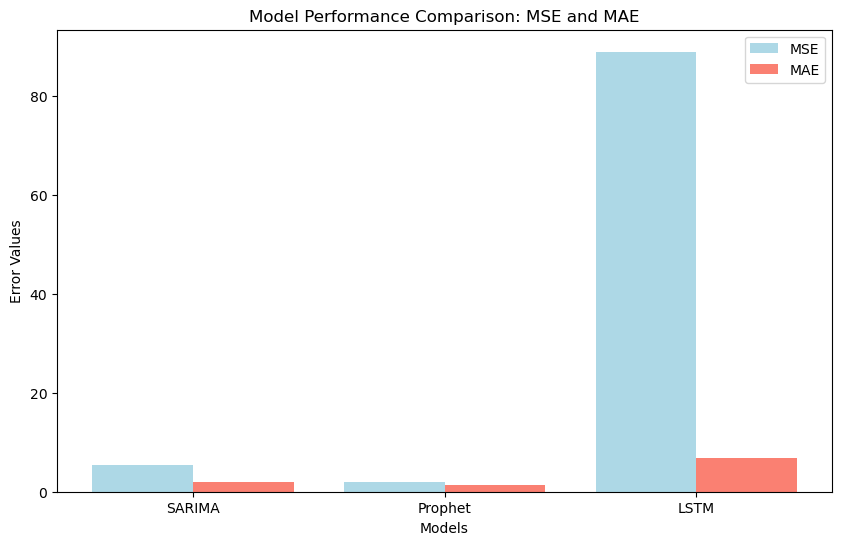

In [121]:
import matplotlib.pyplot as plt

# Model names and their respective MSE and MAE values
models = ['SARIMA', 'Prophet', 'LSTM']
mse_values = [mse_sarima, mse_prophet, mse_lstm]  # Replace with actual values
mae_values = [mae_sarima, mae_prophet, mae_lstm]  # Replace with actual values

x = range(len(models))

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, width=0.4, label='MSE', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], mae_values, width=0.4, label='MAE', color='salmon', align='center')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Model Performance Comparison: MSE and MAE')
plt.xticks([p + 0.2 for p in x], models)
plt.legend()
plt.show()

Prediction vs. Actual Values
Let's visualize how well the models predict actual sales quantity. We can create scatter plots for actual vs predicted values for each model (SARIMA, Prophet, LSTM).

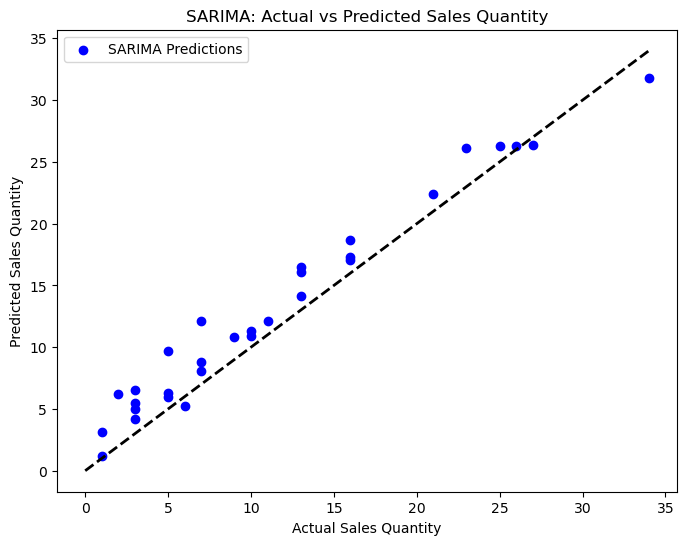

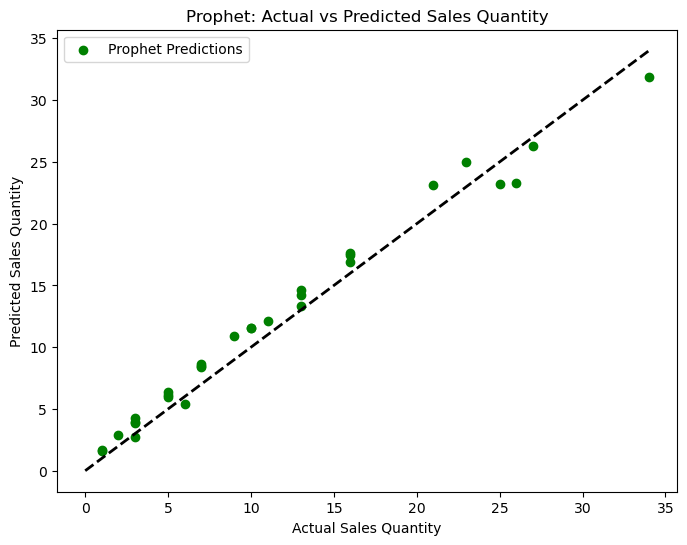

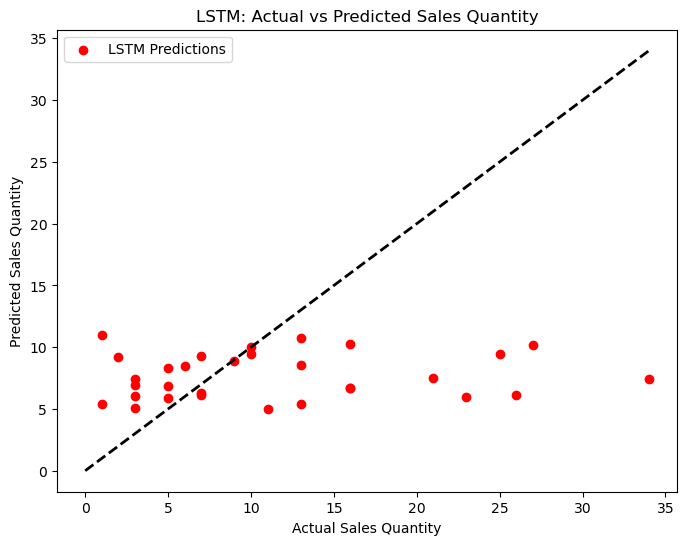

In [122]:
# For SARIMA
plt.figure(figsize=(8, 6))
plt.scatter(y[-30:], forecast_sarima_df['forecast'], color='blue', label='SARIMA Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('SARIMA: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

# For Prophet
plt.figure(figsize=(8, 6))
plt.scatter(y[-30:], forecast_prophet['yhat'], color='green', label='Prophet Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('Prophet: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

# For LSTM
plt.figure(figsize=(8, 6))
plt.scatter(y[-30:], predicted_qty, color='red', label='LSTM Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('LSTM: Actual vs Predicted Sales Quantity')
plt.legend()
plt.show()

Residual Plots
Residual plots help in assessing how well the model fits the data. For a well-fitted model, residuals should scatter randomly around zero.

In [123]:
y_actual = y[-30:]  # The actual values for the last 30 days
y_predicted = forecast_sarima_df['forecast'].values  # The predicted values

# Check if both arrays are the same length
print(len(y_actual), len(y_predicted))

# Compute residuals (actual - predicted)
residuals_sarima = y_actual - y_predicted

30 30


In [124]:
# Make sure using the correct portion of actual y for the last 30 days:
residuals_prophet = y.iloc[-30:] - forecast_prophet['yhat'].iloc[:30]

Forecasted vs Actual Demand over Time
You can visualize how the forecasted demand aligns with actual demand over the 30-day forecast horizon.

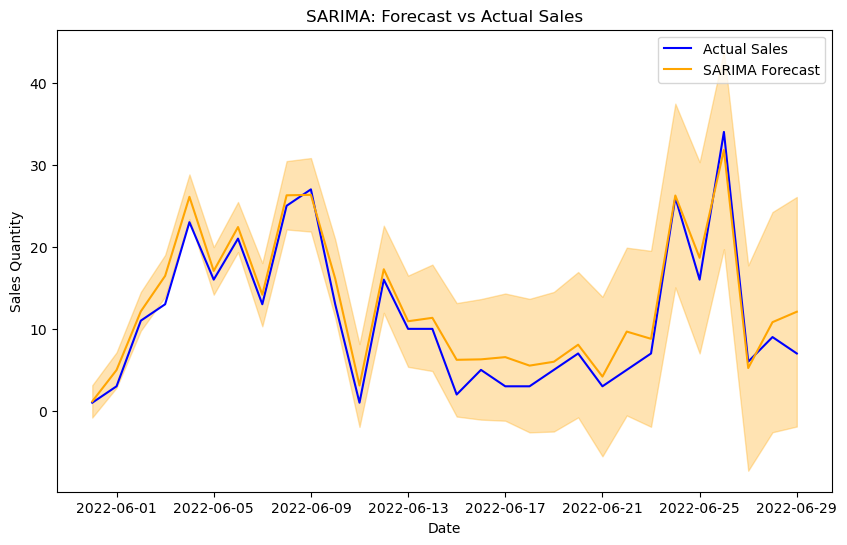

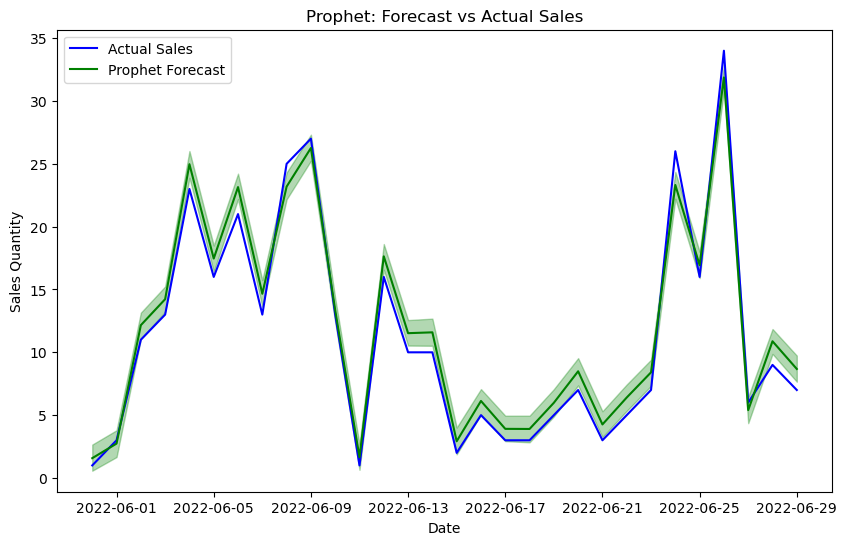

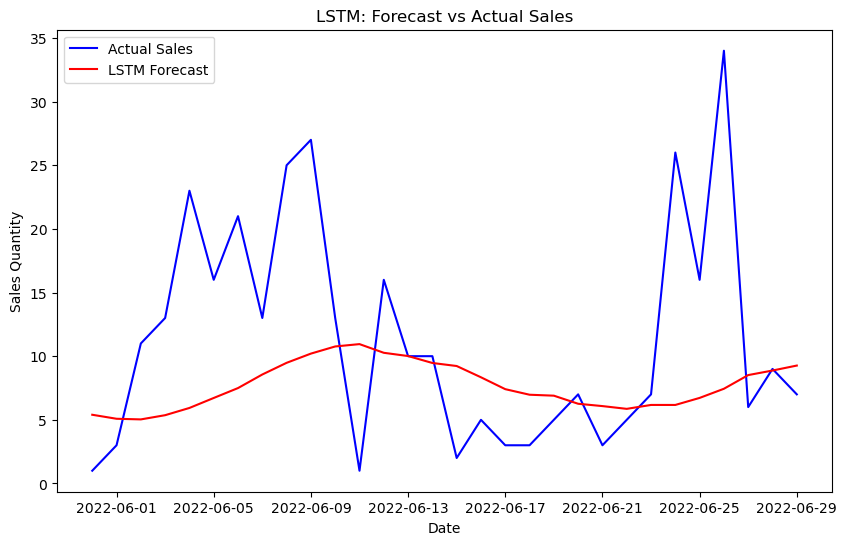

In [125]:
# SARIMA Forecast vs Actual
plt.figure(figsize=(10, 6))
plt.plot(sku_df['date'][-30:], y[-30:], color='blue', label='Actual Sales')
plt.plot(sku_df['date'][-30:], forecast_sarima_df['forecast'], color='orange', label='SARIMA Forecast')
plt.fill_between(sku_df['date'][-30:], forecast_sarima_df['lower qty'], forecast_sarima_df['upper qty'], color='orange', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('SARIMA: Forecast vs Actual Sales')
plt.legend()
plt.show()

# Prophet Forecast vs Actual
plt.figure(figsize=(10, 6))
plt.plot(sku_df['date'][-30:], y[-30:], color='blue', label='Actual Sales')
plt.plot(sku_df['date'][-30:], forecast_prophet['yhat'], color='green', label='Prophet Forecast')
plt.fill_between(sku_df['date'][-30:], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='green', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Prophet: Forecast vs Actual Sales')
plt.legend()
plt.show()

# LSTM Forecast vs Actual
plt.figure(figsize=(10, 6))
plt.plot(sku_df['date'][-30:], y[-30:], color='blue', label='Actual Sales')
plt.plot(sku_df['date'][-30:], predicted_qty, color='red', label='LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('LSTM: Forecast vs Actual Sales')
plt.legend()
plt.show()

-----

### 7. **Combining the Models:**
Once the models are tested for each individual pricing strategy, we can:

Use stacking or blending to combine model outputs and predictions.
Aggregate the most important features from all models (e.g., price elasticity, promotion effectiveness, demand forecasting) into a larger model for overall price optimization.

In [132]:
# Ensure that the function compare_pricing_strategies is defined before calling it.
def compare_pricing_strategies(models_metrics, strategy_name):
    # Print a header for the strategy
    print(f"Pricing Strategy: {strategy_name}\n")
    
    # Print a table-like structure for the metrics
    print(f"{'Model':<30} {'MSE':<10} {'MAE':<10} {'R²':<10}")
    print('-' * 60)
    
    for model in models_metrics:
        model_name, mse, mae, r2 = model
        # Handle None values for R²
        r2_str = f"{r2:<10.4f}" if r2 is not None else "N/A"
        print(f"{model_name:<30} {mse:<10.4f} {mae:<10.4f} {r2_str}")

In [133]:
models_metrics_price_elasticity = [
    ['Linear Regression', mse_linear, mae_linear, r2_linear],
    ['Log-Log Regression', mse_log_log, mae_log_log, r2_log_log],
    ['Lasso', mse_lasso, mae_lasso, r2_lasso],
    ['Ridge', mse_ridge, mae_ridge, r2_ridge]
]
compare_pricing_strategies(models_metrics_price_elasticity, "Price Elasticity of Demand")

Pricing Strategy: Price Elasticity of Demand

Model                          MSE        MAE        R²        
------------------------------------------------------------
Linear Regression              0.4868     0.4628     0.7141    
Log-Log Regression             0.0360     0.1383     0.6329    
Lasso                          0.4974     0.4447     0.7078    
Ridge                          0.4868     0.4628     0.7141    


In [134]:
models_metrics_sales_volume = [
    ['XGBoost', mse_xgb, mae_xgb, r2_xgb],
    ['LightGBM', mse_lgb, mae_lgb, r2_lgb]
]
compare_pricing_strategies(models_metrics_sales_volume, "Sales Volume / Units Sold Prediction")

Pricing Strategy: Sales Volume / Units Sold Prediction

Model                          MSE        MAE        R²        
------------------------------------------------------------
XGBoost                        0.3293     0.2877     0.8110    
LightGBM                       0.3410     0.2910     0.8043    


In [135]:
models_metrics_discount_effectiveness = [
    ['XGBoost', mse_xgb, mae_xgb, r2_xgb],
    ['LightGBM', mse_lgb, mae_lgb, r2_lgb],
    ['Propensity Score Matching', mse_psm, mae_psm, None],
    ['Difference in Differences (DID)', mse_did, mae_did, None]
]
compare_pricing_strategies(models_metrics_discount_effectiveness, "Discount Effectiveness / Promotional Uplift")


Pricing Strategy: Discount Effectiveness / Promotional Uplift

Model                          MSE        MAE        R²        
------------------------------------------------------------
XGBoost                        0.3293     0.2877     0.8110    
LightGBM                       0.3410     0.2910     0.8043    
Propensity Score Matching      0.0771     0.2776     N/A
Difference in Differences (DID) 0.0793     0.1492     N/A


In [136]:
models_metrics_demand_forecasting = [
    ['SARIMA', mse_sarima, mae_sarima, None],
    ['Prophet', mse_prophet, mae_prophet, None],
    ['LSTM', mse_lstm, mae_lstm, None]
]
compare_pricing_strategies(models_metrics_demand_forecasting, "Demand Forecasting")

Pricing Strategy: Demand Forecasting

Model                          MSE        MAE        R²        
------------------------------------------------------------
SARIMA                         5.3492     1.9410     N/A
Prophet                        2.0123     1.3031     N/A
LSTM                           88.9138    6.7365     N/A


### **1. Accuracy Metrics Comparison**

You'll focus on **MSE**, **MAE**, **R²**, and possibly **RMSE** across all models. You can visualize this using a **bar chart** or **heatmap** to compare the performance metrics.

**Visualization Idea:**

- A grouped bar chart for each metric (MSE, MAE, R²) comparing all models.

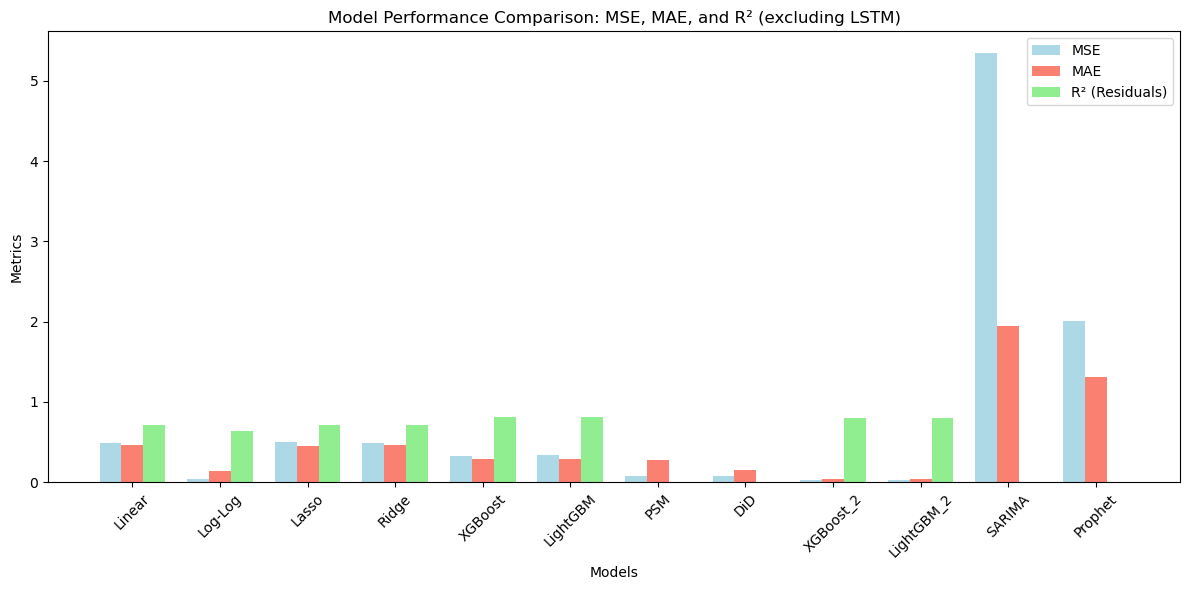

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Models that have MSE, MAE, and R² (excluding LSTM)
models = ['Linear', 'Log-Log', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM', 'PSM', 'DiD', 'XGBoost_2', 'LightGBM_2', 'SARIMA', 'Prophet']

# Example values (replace these with your actual metrics)
mse_values = [mse_linear, mse_log_log, mse_lasso, mse_ridge, mse_xgb, mse_lgb, mse_psm, mse_did, mse_xgb_2, mse_lgb_2, mse_sarima, mse_prophet]
mae_values = [mae_linear, mae_log_log, mae_lasso, mae_ridge, mae_xgb, mae_lgb, mae_psm, mae_did, mae_xgb_2, mae_lgb_2, mae_sarima, mae_prophet]
r2_values = [r2_linear, r2_log_log, r2_lasso, r2_ridge, r2_xgb, r2_lgb, None, None, r2_xgb_2, r2_lgb_2, None, None]  # None for models without R²

# Replace None with 0 in R² values for models that don't have it
r2_values = [r2 if r2 is not None else 0 for r2 in r2_values]

# Set up the bar positions and width
x = np.arange(len(models))
bar_width = 0.25

# Plot MSE, MAE, and R² values
plt.figure(figsize=(12, 6))
plt.bar(x - 0.25, mse_values, bar_width, label='MSE', color='lightblue')
plt.bar(x, mae_values, bar_width, label='MAE', color='salmon')
plt.bar(x + 0.25, r2_values, bar_width, label='R² (Residuals)', color='lightgreen')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Comparison: MSE, MAE, and R² (excluding LSTM)')
plt.xticks(x, models, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



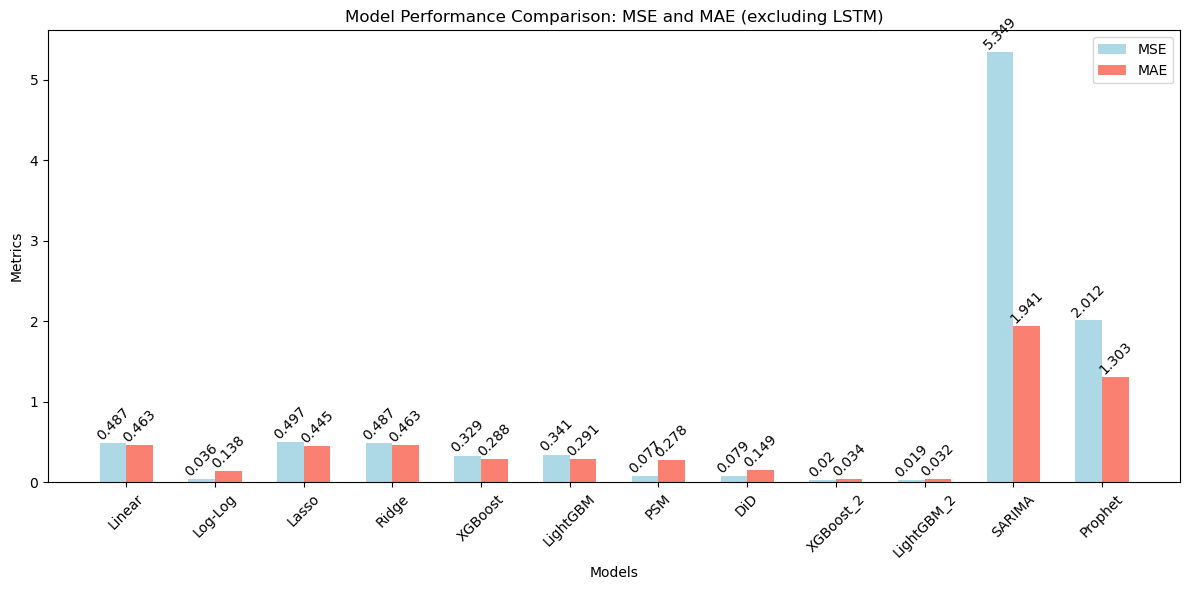

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Models that have MSE and MAE (excluding LSTM)
models = ['Linear', 'Log-Log', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM', 'PSM', 'DiD', 'XGBoost_2', 'LightGBM_2', 'SARIMA', 'Prophet']

# Example values (replace these with your actual metrics)
mse_values = [mse_linear, mse_log_log, mse_lasso, mse_ridge, mse_xgb, mse_lgb, mse_psm, mse_did, mse_xgb_2, mse_lgb_2, mse_sarima, mse_prophet]
mae_values = [mae_linear, mae_log_log, mae_lasso, mae_ridge, mae_xgb, mae_lgb, mae_psm, mae_did, mae_xgb_2, mae_lgb_2, mae_sarima, mae_prophet]

# Set up the bar positions and width
x = np.arange(len(models))
bar_width = 0.3

# Plot MSE and MAE values
plt.figure(figsize=(12, 6))
bars_mse = plt.bar(x - 0.15, mse_values, bar_width, label='MSE', color='lightblue')
bars_mae = plt.bar(x + 0.15, mae_values, bar_width, label='MAE', color='salmon')

# Add values on top of MSE and MAE bars and rotate the labels
for bar in bars_mse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', rotation=45)

for bar in bars_mae:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', rotation=45)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Comparison: MSE and MAE (excluding LSTM)')
plt.xticks(x, models, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


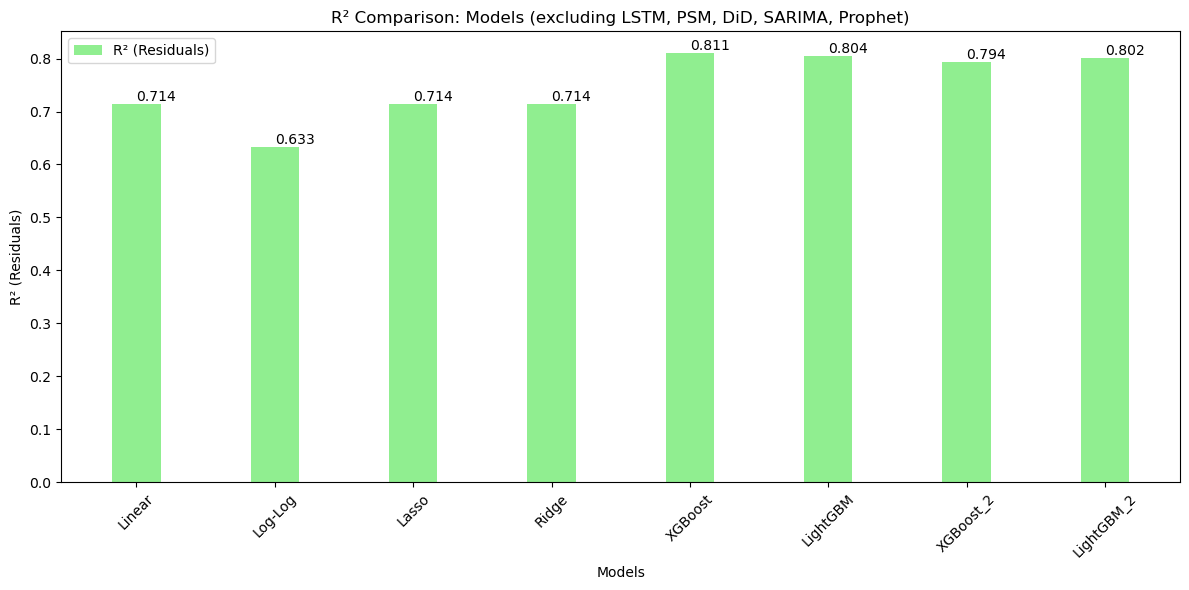

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Models that have R² values (excluding LSTM, PSM, DiD, SARIMA, and Prophet)
models_with_r2 = ['Linear', 'Log-Log', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM', 'XGBoost_2', 'LightGBM_2']

# Example R² values (replace these with your actual R² metrics)
r2_values = [r2_linear, r2_log_log, r2_lasso_best, r2_ridge_best, r2_xgb, r2_lgb, r2_xgb_2, r2_lgb_2]

# Set up the bar positions and width
x = np.arange(len(models_with_r2))
bar_width = 0.35

# Plot R² values
plt.figure(figsize=(12, 6))
bars = plt.bar(x, r2_values, bar_width, label='R² (Residuals)', color='lightgreen')

# Add values on top of R² bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R² (Residuals)')
plt.title('R² Comparison: Models (excluding LSTM, PSM, DiD, SARIMA, Prophet)')
plt.xticks(x, models_with_r2, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### 1. **MSE (Mean Squared Error)**:

- Measures the average squared differences between actual and predicted values.
- **Lower MSE** is better, as it indicates predictions are closer to the real values.
- It penalizes larger errors more due to squaring.

### 2. **MAE (Mean Absolute Error)**:

- Measures the average absolute difference between actual and predicted values.
- **Lower MAE** is better. It’s more interpretable than MSE and treats all errors equally.

### 3. **R² (R-squared)**:

- Measures the proportion of the variance in the target variable explained by the model.
- **Higher R²** (closer to 1) is better. It shows how well the model explains the variability.

### Summary:

- **Lower MSE and MAE** = Better performance.
- **Higher R²** = Better explanatory power.

### **3. Suitability for Real-Time Applications**

Since this is more qualitative, you could create a **table** or **radar chart** for real-time suitability across models. For example, **reinforcement learning** models or simpler **regression models** might be better suited for real-time pricing applications.

**Visualization Idea:**
Create a table where you score each model on a scale of 1-5 for criteria like **speed**, **ease of integration**, and **scalability**. If you'd like to turn this into a visual chart, a **radar chart** might work well.

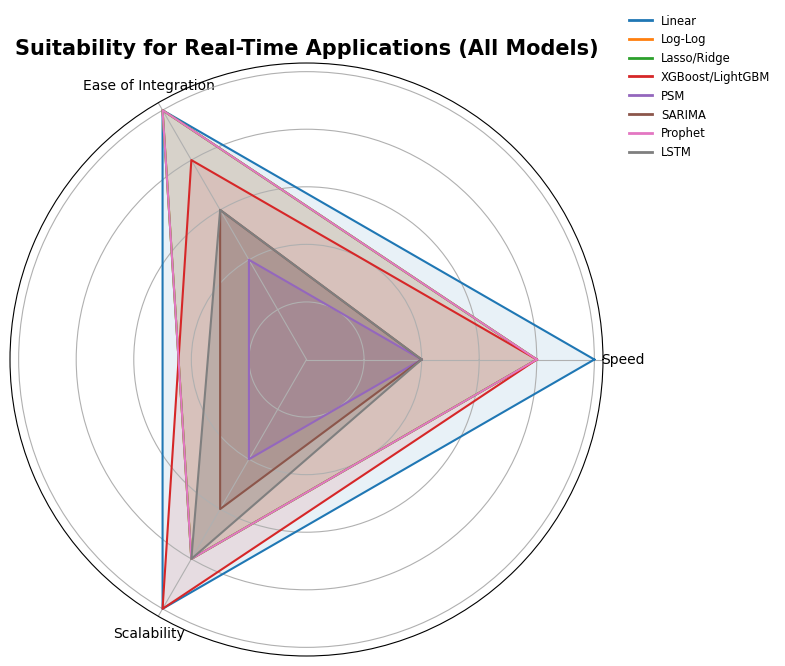

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Labels representing the criteria
labels = ['Speed', 'Ease of Integration', 'Scalability']

# All models being compared
models = ['Linear', 'Log-Log', 'Lasso/Ridge', 'XGBoost/LightGBM', 'PSM', 'SARIMA', 'Prophet', 'LSTM']

# Example data: scores between 1-5 for each model on each criterion (Speed, Ease of Integration, Scalability)
scores = {
    'Linear': [5, 5, 5],
    'Log-Log': [4, 5, 4],
    'Lasso/Ridge': [4, 5, 4],
    'XGBoost/LightGBM': [4, 4, 5],
    'PSM': [2, 2, 2],
    'SARIMA': [2, 3, 3],
    'Prophet': [4, 5, 4],
    'LSTM': [2, 3, 4]
}

# Calculate the angles for each axis of the radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop for the radar chart

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model's performance across the 3 criteria (adjust fill intensity for PSM, SARIMA, and LSTM)
for model in models:
    data = scores[model] + scores[model][:1]  # Add the first value to the end to close the radar chart
    
    # Make PSM, SARIMA, and LSTM darker
    if model in ['PSM', 'SARIMA', 'LSTM']:
        ax.fill(angles, data, alpha=0.3)  # Darker fill for these models
    else:
        ax.fill(angles, data, alpha=0.1)  # Keep others light
    
    ax.plot(angles, data, label=model)  # Plot the line for each model

# Remove y-axis labels and set x-axis labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add title and legend (move it further right)
plt.title("Suitability for Real-Time Applications (All Models)", size=15, weight='bold')

# Create custom legend with only the line markers, not the filled areas
legend_labels = [plt.Line2D([0], [0], color=ax.lines[i].get_color(), lw=2) for i in range(len(models))]
plt.legend(legend_labels, models, loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize='small', frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


Reasons for scores:
- Linear/Log-Log/Lasso/Ridge: These are relatively simple models with fast computations and easy integration, but they might lack scalability for large datasets and complex problems.
- XGBoost/LightGBM: These are more complex but highly optimized algorithms, especially LightGBM, which is faster for larger datasets. They scale well but can take longer to tune.
- PSM (Propensity Score Matching): This method is quite specific, slower to compute, and harder to scale due to its pairwise matching. Not as well-suited for large-scale real-time applications.
- DiD (Difference-in-Differences): This method is statistical and works better for causal inference than real-time applications. It’s not designed for speed or scalability.
- SARIMA: Seasonal ARIMA is a good model for time-series data with seasonality, but it is relatively slow and not easily scalable. It’s also more challenging to integrate in real-time systems.
- Prophet: Prophet is designed for easier integration and works well with time-series data, but it's still slower than models like LightGBM or Linear Regression. Its scalability is decent.
- LSTM: LSTMs are complex deep learning models and can be quite slow to train and difficult to integrate into real-time systems. They scale well but are slower.
- Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique that is an extension of linear regression. It’s fast to train and deploy in real-time applications, although the additional regularization increases computational complexity slightly compared to standard linear regression.
- Ridge (Tikhonov Regularization) is similar to Lasso but uses a different regularization term. It has similar speed and ease of integration as Lasso, making it good for real-time applications but still more complex than standard linear regression.
- Log-Log (logarithmic transformation models) is still a linear regression model but uses transformed data. It maintains the speed and scalability of Linear Regression, but depending on the transformations, it can be slightly more difficult to implement and tune in real-time applications.

### **4. Complexity vs Performance**

You’ll evaluate **model complexity** (training time, resource intensity) vs. **performance** (accuracy metrics). For this, you can use a **scatter plot** where one axis represents **model complexity** and the other represents **accuracy** (e.g., MSE or R²).

**Visualization Idea:**

- A scatter plot where **x-axis** is model complexity (e.g., number of parameters or time taken to train) and the **y-axis** is an accuracy metric like MSE or R².

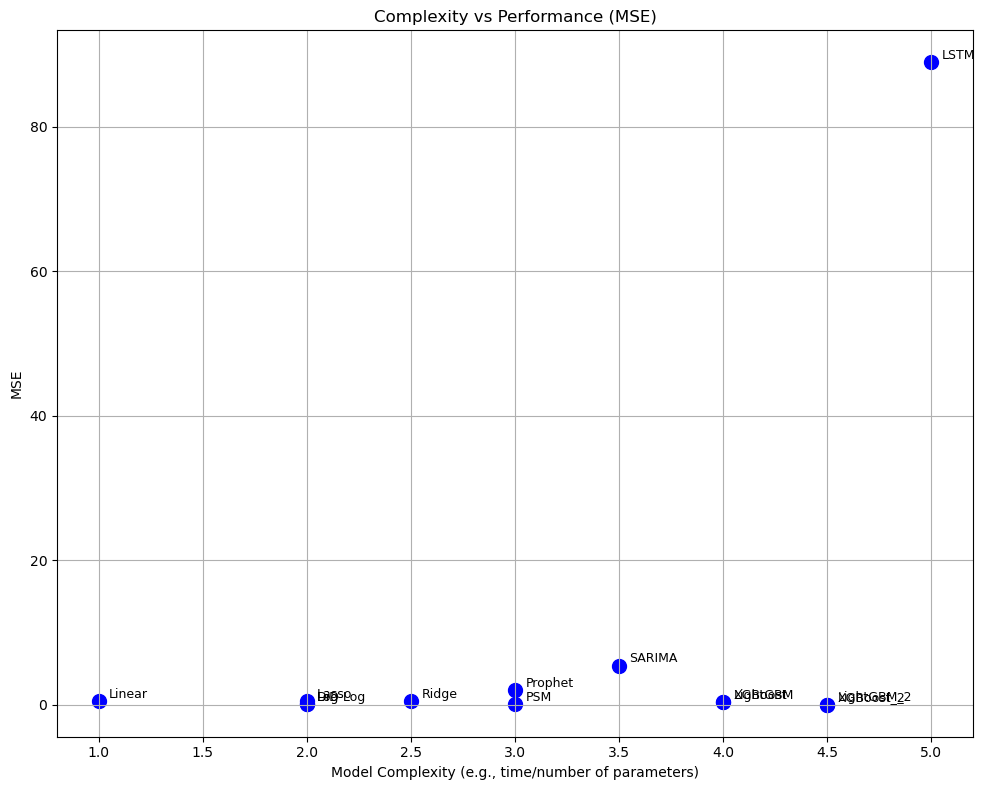

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Realistic model complexities (on a scale from 1 to 5 where 1 is simple and 5 is complex)
complexity = [1, 2, 2, 2.5, 4, 4, 3, 2, 4.5, 4.5, 3.5, 3, 5]  # Adjusted values based on real-life knowledge
mse_values = [mse_linear, mse_log_log, mse_lasso, mse_ridge, mse_xgb, mse_lgb, mse_psm, mse_did, mse_xgb_2, mse_lgb_2, mse_sarima, mse_prophet, mse_lstm]

# Model names
models = ['Linear', 'Log-Log', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM', 'PSM', 'DiD', 'XGBoost_2', 'LightGBM_2', 'SARIMA', 'Prophet', 'LSTM']

plt.figure(figsize=(10, 8))
plt.scatter(complexity, mse_values, color='blue', s=100)  # Increase the size of the dots for visibility

# Add jitter to labels to avoid overlap
for i, model in enumerate(models):
    plt.text(complexity[i] + 0.05, mse_values[i] + 0.5, model, fontsize=9)  # Slightly offset labels

plt.xlabel('Model Complexity (e.g., time/number of parameters)')
plt.ylabel('MSE')
plt.title('Complexity vs Performance (MSE)')

plt.grid(True)  # Add a grid to improve readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()



### Justification of Complexity Values:

- **1** for **Linear**: Very low complexity due to its simplicity.
- **2** for **Log-Log, Lasso, Ridge**: These are slightly more complex than linear models due to the transformations and regularization.
- **4** for **XGBoost/LightGBM**: Ensemble methods involving tree-based models are typically resource-intensive and take more time.
- **3** for **PSM and SARIMA**: Moderate complexity—SARIMA is heavier on computation due to time series decomposition, and PSM involves neighbor matching.
- **4.5** for **XGBoost_2/LightGBM_2**: Assuming these are even more complex models than their simpler versions.
- **5** for **LSTM**: Deep learning model, high complexity due to long training times and high resource demands.
- **3** for **Prophet**: Moderate complexity due to its ability to handle seasonality and trends while remaining computationally feasible.

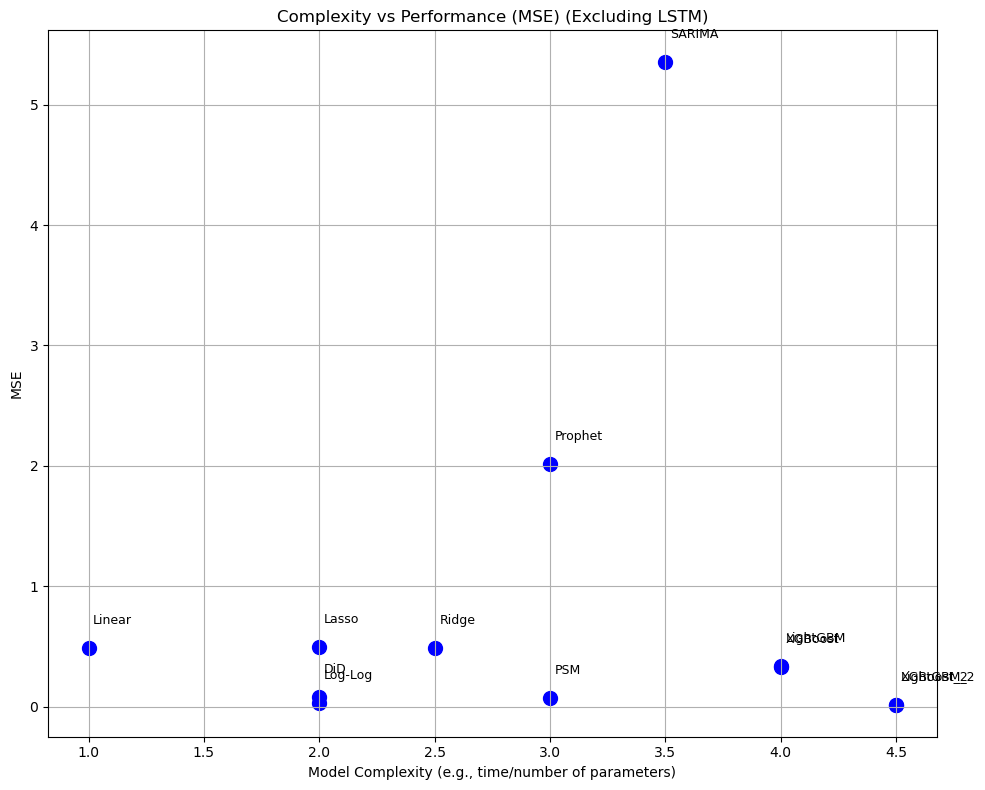

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Realistic model complexities (on a scale from 1 to 5 where 1 is simple and 5 is complex)
# LSTM has been removed
complexity = [1, 2, 2, 2.5, 4, 4, 3, 2, 4.5, 4.5, 3.5, 3]  # Adjusted values based on real-life knowledge, excluding LSTM
mse_values = [mse_linear, mse_log_log, mse_lasso, mse_ridge, mse_xgb, mse_lgb, mse_psm, mse_did, mse_xgb_2, mse_lgb_2, mse_sarima, mse_prophet]  # Excluding LSTM

# Model names excluding LSTM
models = ['Linear', 'Log-Log', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM', 'PSM', 'DiD', 'XGBoost_2', 'LightGBM_2', 'SARIMA', 'Prophet']

plt.figure(figsize=(10, 8))
plt.scatter(complexity, mse_values, color='blue', s=100)  # Increase the size of the dots for visibility

# Add jitter to labels to avoid overlap, bringing labels closer to dots
for i, model in enumerate(models):
    plt.text(complexity[i] + 0.02, mse_values[i] + 0.2, model, fontsize=9)  # Slightly closer offset

plt.xlabel('Model Complexity (e.g., time/number of parameters)')
plt.ylabel('MSE')
plt.title('Complexity vs Performance (MSE) (Excluding LSTM)')

plt.grid(True)  # Add a grid to improve readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

